In [182]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [183]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [184]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(265703, 12)


In [185]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(258562, 12)


dataset size:  (258562, 12)
presentation size:  x= 1920 pixels y= 1080  pixels
presentation size:  x= 1920 pixels y= 1080  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  200 observers and  36  stimuli.


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  36.89  +/-  9.95
Mean fixation duration:  383.9  +/-  68.2 msec
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

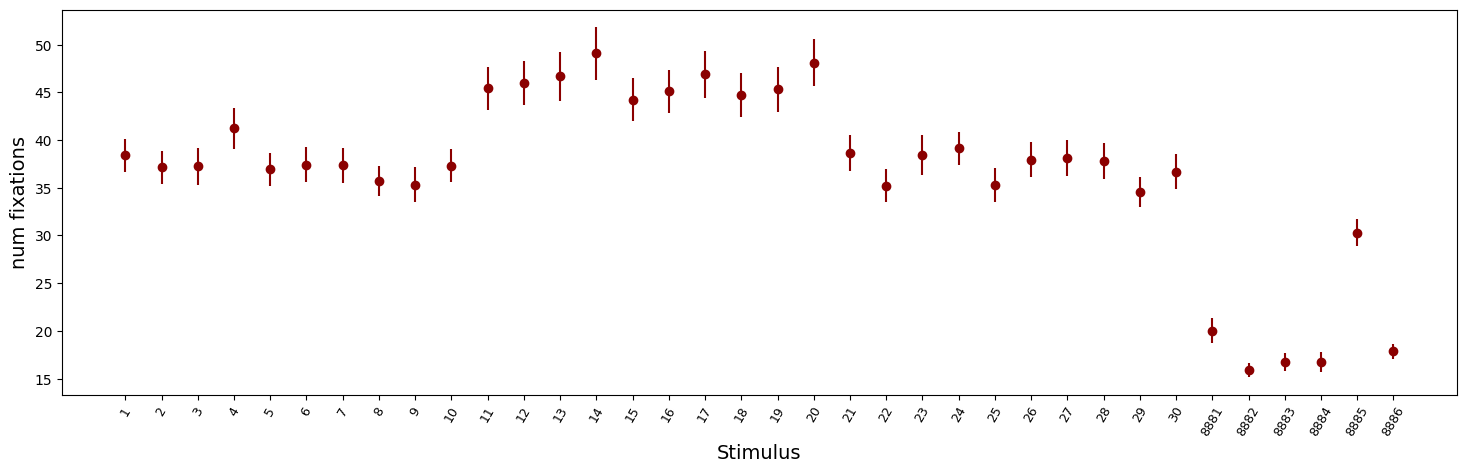

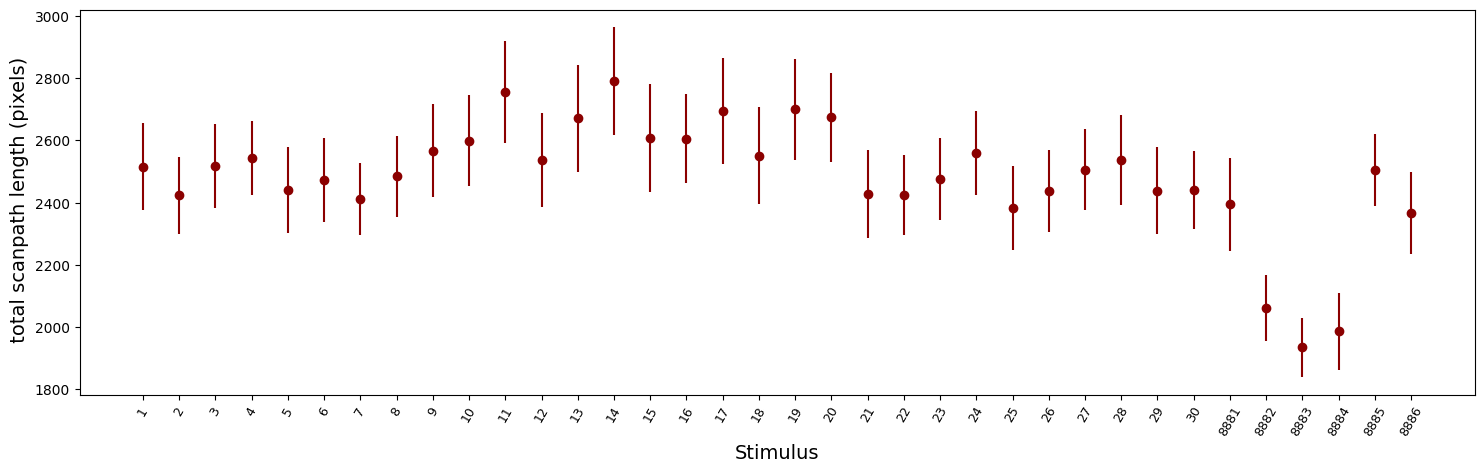

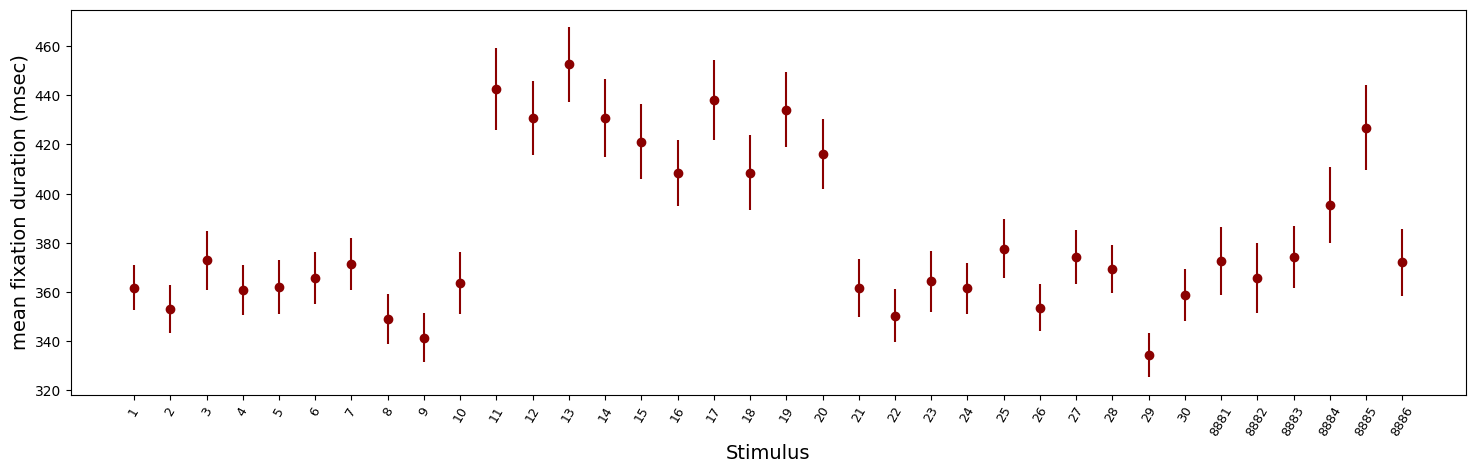

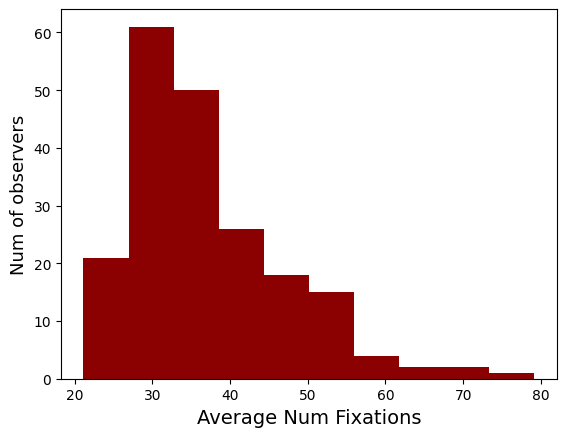

In [186]:

#sizeX,sizeY=1024, 768 
sizeX,sizeY=1920, 1080


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1, duration=1)

---

In [187]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[0:117,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[x] = +1
            set_subj.add(x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

10 Stimuli with complete data: [0, 3, 4, 5, 7, 15, 18, 28, 31, 32]
26 Stimuli with Missing data: {1: 1, 2: 1, 6: 1, 8: 1, 9: 1, 10: 3, 11: 3, 12: 2, 13: 3, 14: 1, 16: 2, 17: 1, 19: 2, 20: 1, 21: 1, 22: 1, 23: 1, 24: 2, 25: 1, 26: 2, 27: 1, 29: 1, 30: 1, 33: 1, 34: 2, 35: 3}
Max subject that have not seen the stimulus: 3
29 Subjects with missing data: {115: 1, 43: 1, 53: 1, 10: 1, 15: 1, 17: 1, 91: 1, 94: 1, 116: 1, 32: 1, 83: 1, 20: 1, 41: 1, 96: 1, 55: 1, 44: 1, 82: 1, 14: 1, 2: 1, 66: 1, 73: 1, 58: 1, 25: 1, 99: 1, 64: 1, 8: 1, 27: 1, 76: 1, 80: 1}


Here we check for the Munich subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Over 36 stimuli 26 have at least one subject that have not seen them.

Over 117 subject only 20 have not seen at least one stimuli (actually every of these subjects have got a proble with one stimulus).

We can consider to remove this 20 subject from the dataset (that correspond to around 17% of the total), or consider to use only the 10 stimui that have full data for every subject, or every time that we randomly select a combination of stimulus/subject check if the subject has seen the stimulus and if not substitute it with another one.

---

In [188]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [189]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0
WhichCN = WhichCN.astype(int)
WhichCN

array([1, 4, 4, 3, 3, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 4,
       3, 1, 1, 1, 4, 1, 4, 4, 3, 4, 0, 1, 1, 4, 4, 2, 1, 1, 2, 1, 4, 1,
       2, 3, 1, 2, 4, 1, 4, 3, 2, 2, 2, 1, 4, 1, 1, 1, 2, 3, 4, 4, 1, 2,
       4, 2, 1, 2, 1, 1, 1, 1, 3, 3, 2, 4, 2, 4, 1, 4, 2, 1, 2, 3, 3, 2,
       4, 1, 1, 3, 3, 1, 0, 1, 4, 4, 2, 0, 4, 4, 4, 3, 4, 2, 2, 1, 4, 4,
       4, 4, 4, 4, 3, 1, 1, 3, 4, 2, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 1, 2,
       1, 3, 1, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 3, 2, 4, 1, 1, 0, 4, 1, 4,
       1, 4, 4, 4, 4, 3, 1, 1, 4, 3, 3, 3, 1, 2, 4, 2, 3, 1, 4, 4, 3, 3,
       3, 2, 4, 4, 4, 4, 1, 3, 0, 0, 3, 2, 4, 4, 4, 4, 4, 1, 1, 3, 1, 4,
       4, 0])

In [190]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC

array([0, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3,
       2, 0, 0, 0, 3, 0, 3, 3, 2, 3, 4, 0, 0, 3, 3, 1, 0, 0, 1, 0, 3, 0,
       1, 2, 0, 1, 3, 0, 3, 2, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 1,
       3, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 0, 1, 2, 2, 1,
       3, 0, 0, 2, 2, 0, 4, 0, 3, 3, 1, 4, 3, 3, 3, 2, 3, 1, 1, 0, 3, 3,
       3, 3, 3, 3, 2, 0, 0, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 0, 1,
       0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 0, 0, 4, 3, 0, 3,
       0, 3, 3, 3, 3, 2, 0, 0, 3, 2, 2, 2, 0, 1, 3, 1, 2, 0, 3, 3, 2, 2,
       2, 1, 3, 3, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3,
       3, 4])

In [ ]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(self.Conds):
        if np.isnan(c):
            continue
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()
    
    for gr1 in range(len(self.Conds)):
        if np.isnan(self.Conds[gr1]):
            continue
        for gr2 in range(len(self.Conds)):
            if np.isnan(self.Conds[gr2]):
                continue
            if gr1 < gr2:
                print()
                t,p=stats.ttest_ind(Entrs[gr1],Entrs[gr2])
                print(' ')
                print('Overall group differences: ',self.Conds[gr1],'vs',self.Conds[gr2] )
                print('Entropy t=',np.round(t,4),', p=',np.round(p,4))
                #if pglib:
                 #   pg.ttest(Fixies[0],Fixies[1],paired=False)
                #else:
                t,p=stats.ttest_ind(Fixies[gr1],Fixies[gr2])
                print('Num Fix t=',np.round(t,4),', p= ',np.round(p,4))
                t,p=stats.ttest_ind(ScanpLs[gr1],ScanpLs[gr2])
                
            
                print('Scanpath lengths t=',np.round(t,4),', p=',np.round(p,4))
                t,p=stats.ttest_ind(SaccAmpls[gr1],SaccAmpls[gr2])
            
                print('Saccade amplitudes t=',np.round(t,4),', p=',np.round(p,4))
                print(' ')

    
    return 

!runnning between group comparison
Calculating entropy
resolution x = 1280  y = 960
0 1 4.35 maximum entropy 6.16
resolution x = 1280  y = 960
1 2 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
2 3 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
3 4 4.4 maximum entropy 6.16
resolution x = 1280  y = 960
4 5 4.42 maximum entropy 6.16
resolution x = 1280  y = 960
5 6 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
6 7 4.36 maximum entropy 6.16
resolution x = 1280  y = 960
7 8 4.34 maximum entropy 6.16
resolution x = 1280  y = 960
8 9 4.42 maximum entropy 6.16
resolution x = 1280  y = 960
9 10 4.31 maximum entropy 6.16
resolution x = 1280  y = 960
10 11 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
11 12 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
12 13 4.33 maximum entropy 6.16
resolution x = 1280  y = 960
13 14 4.31 maximum entropy 6.16
resolution x = 1280  y = 960
14 15 4.29 maximum entropy 6.16
resolution x = 1280  y = 960
15 16 4.37 maximum entr

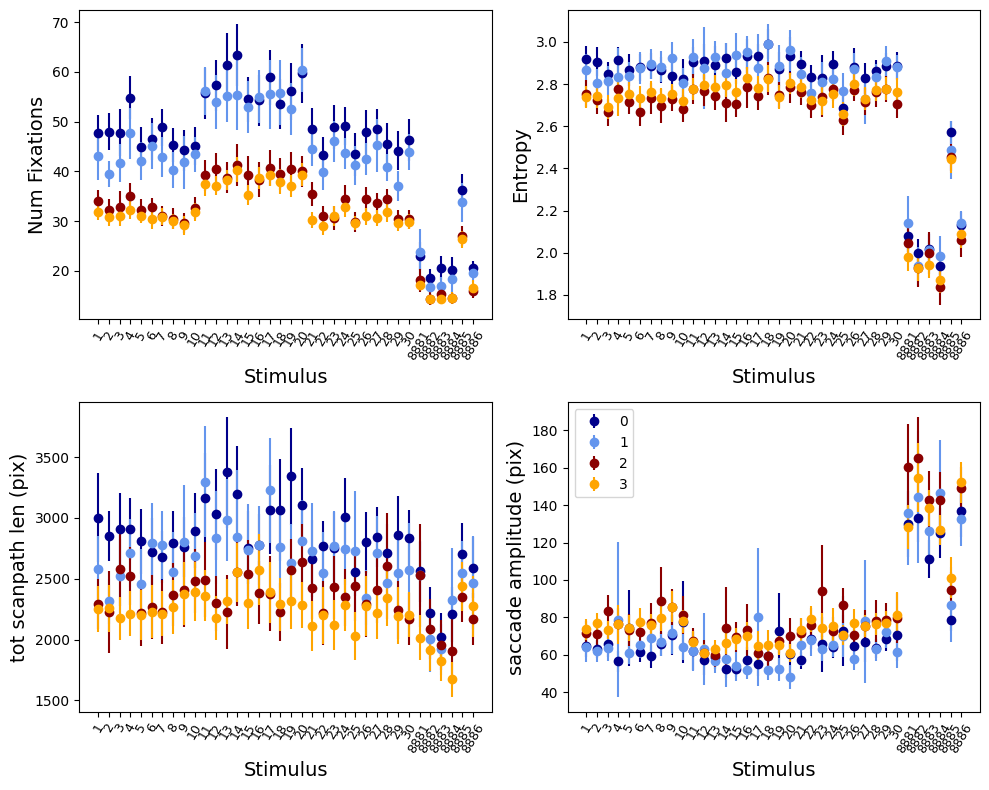

In [24]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1','2','3'])

In [191]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [192]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [193]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [29]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(class_labels):
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()

    return 

!runnning between group comparison
0 0 num participants:  119
0 0 Num fix=  31.52 +/- 6.06
0 0 max num fix=  68.45
0 0 min num fix=  21.14
0 0 Entropy=  2.63 +/- 0.17
0 0 tot scanpath len =  2300.54 +/- 531.55 pix
0 0 saccade amplitude =  84.34 +/- 20.42 pix

1 1 num participants:  81
1 1 Num fix=  44.77 +/- 9.27
1 1 max num fix=  79.17
1 1 min num fix=  30.09
1 1 Entropy=  2.74 +/- 0.17
1 1 tot scanpath len =  2748.51 +/- 508.78 pix
1 1 saccade amplitude =  73.46 +/- 15.18 pix



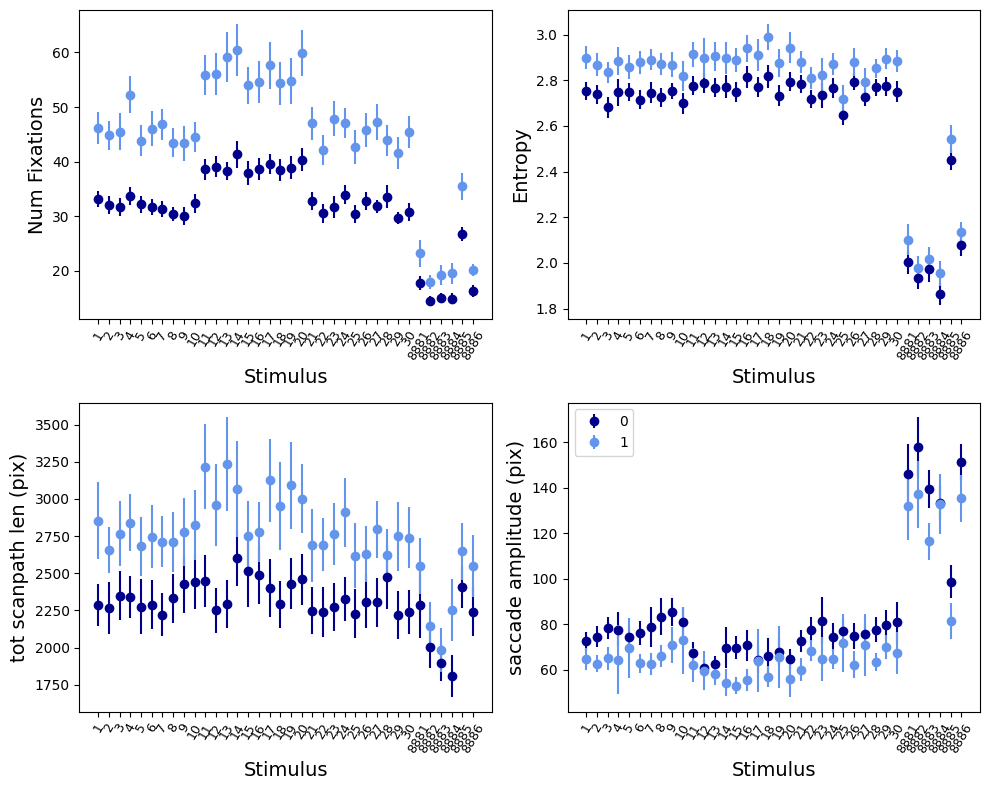

In [30]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1'])

In [31]:
Idx=np.nonzero(WhichC==1)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
#remove nan values
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[ 17.  53.  72.  48.  42.  93.  51.  62.  48.  56.  59.  70.  49.  73.
  69.  50.  53.  54.  42.  57.  nan  54.  66.  52.  34.  47.  78. 107.
  50.  54.  41.  49.  29.  49.  52.  82.  62.  61.  58.  98.  85.  67.
  71.  49.  nan  39.  49.  70.  68. 102.  69.  40.  44.  53.  58.  67.
  64. 104.  57.  96.  65.  76.  65.  64.  69.  39.   9.  nan  77.  nan
  43.  76.  58.  84.  46.  60.  61.  74.  41.  49.  65.]
max num fix=  107.0
min num fix=  9.0
average num fix=  59.922077922077925


In [32]:
Idx=np.nonzero(WhichC==0)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
# remove 1 max and 1 min value
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[43. 45. 32. 46. 30. 56. 27. 32. 53. 40. 33. 49. 54. 41. 47. 33. 73. 25.
 29. 45. 99. 31. 48. 28. 43. 50. 25. 48. 50. 32. 38. 31. 51. 28. 27. 29.
 35. 38. 32. 50. 35. 45. 45. 30. 48. 37. 54. 52. 42. 42. 51. 42. 33. 40.
 38. 38. 42. 37. 32. 27. 42. 40. 40. 28. 37. 26. nan 44. 51. 39. 45. 46.
 34. 34. 38. 49. 52. 57. 40. 33. 36. 42. 58. 46. 30. 32. 37. 51. 41. 31.
 77. 46. 38. 36. 33. 48. 43. 50. 42. 24. 28. nan 20. 29. 24. 35. 30. 38.
 56. 39. 38. 34. 35. 39. 47. 30. 44. 39. 45.]
max num fix=  99.0
min num fix=  20.0
average num fix=  40.35897435897436


In [14]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1)

In [12]:
def angles_entropy(angles, bins):
    hist, _ = np.histogram(angles, bins=bins)
    hist = hist / hist.sum()
    return -np.sum(hist * np.log2(hist))

In [67]:
Saccades = Saccades[0:117, :]
WhichC_Munich = WhichC[0:117]

Group 0
Angle Entropy: 7.114319960071477
---------------------------------------------------------
Group 1
Angle Entropy: 7.396763654882683
---------------------------------------------------------
 
t-test between groups 0 and 1
t: -1.559467845302823, p: 0.11888775137063351
 


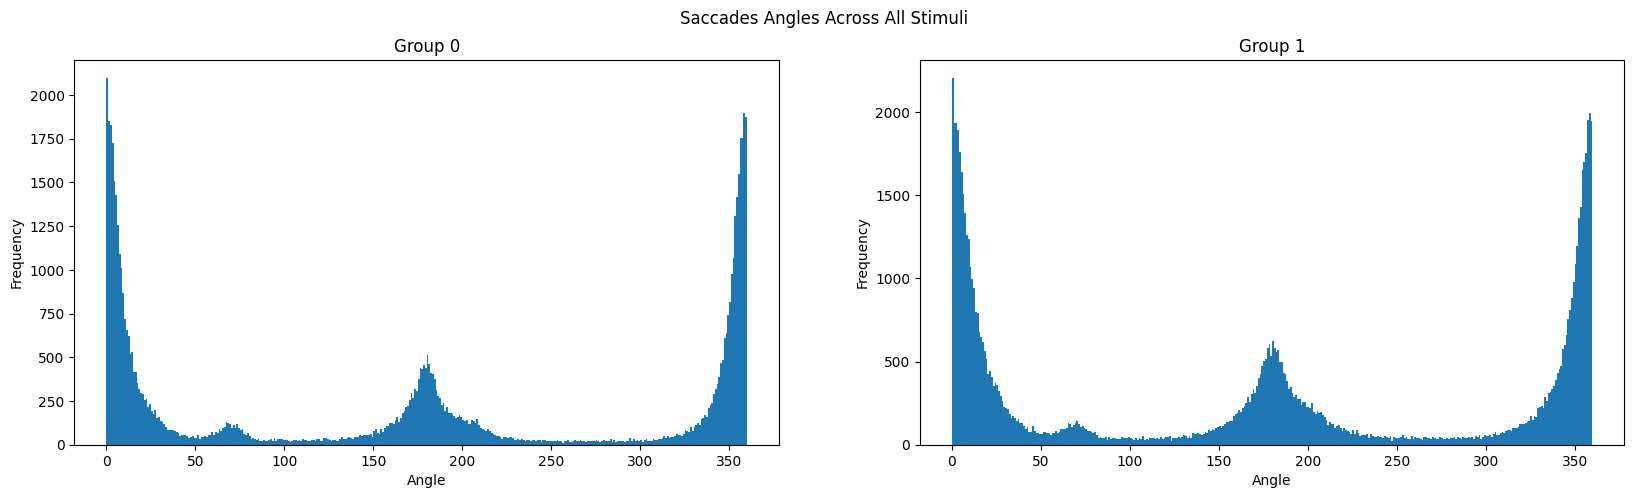

In [52]:
from scipy.stats import ttest_ind
# Initialize variables to store aggregated data
aggregated_angles = {group: [] for group in np.unique(WhichC_Munich)}

# Iterate over all stimuli
for stim in range(DyslexiaDat.np):
    groups = np.unique(WhichC_Munich)
    group_saccades = []
    
    # Collect saccades for each group
    for group in groups:
        group_saccades.append(Saccades[WhichC_Munich == group, stim, :, :])
    
    # Aggregate angles for each group
    for j, group in enumerate(group_saccades):
        for subj in group:
            for h in range(subj.shape[0]):
                for v in range(subj.shape[1]):
                    for val in subj[h, v]:
                        aggregated_angles[groups[j]].append(val)

# Plot the aggregated results
fig, ax = plt.subplots(1, len(aggregated_angles), figsize=(20, 5))
fig.suptitle('Saccades Angles Across All Stimuli')

for i, (group, angles) in enumerate(aggregated_angles.items()):
    ax[i].hist(angles, bins=360)
    ax[i].set_title(f'Group {group}')
    ax[i].set_xlabel('Angle')
    ax[i].set_ylabel('Frequency')
    print(f'Group {group}')
    print(f'Angle Entropy: {angles_entropy(angles, 360)}')
    print(f'---------------------------------------------------------')

# Perform t-test between groups
group_keys = list(aggregated_angles.keys())
t, p = ttest_ind(aggregated_angles[group_keys[0]], aggregated_angles[group_keys[1]])
print(' ')
print(f't-test between groups {group_keys[0]} and {group_keys[1]}')
print(f't: {t}, p: {p}')
print(' ')

plt.show()


In [194]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

In [42]:
# SimVals[subjects][group]
def calculate_accuracy(SimVals, WhichCN, Idx):
    correct_labels = 0

    for i, subj in enumerate(Idx):
        # Calculate the mean for each group for the current subject
        predicted_group = 0
        min_mean = np.inf
        for j in range(np.unique(WhichCN).size):
            if len(SimVals[i][j]) > 0:
                mean = np.mean(SimVals[i][j])
            else:
                continue
            if mean <= min_mean:
                min_mean = mean
                predicted_group = j
        
        # Check if the predicted group matches the true group
        if predicted_group == WhichCN[subj]:
            correct_labels += 1
    
    # Calculate accuracy
    accuracy = correct_labels / len(Idx)
    print(f'Accuracy: {accuracy * 100:.2f}%')

In [43]:
stimn = 28

In [44]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=0, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

In [45]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 50.43%


In [47]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:657: RuntimeWarning: Mean of empty slice
  SimVals[s1_idx][group].append(np.nanmean(tot_val))


In [48]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 51.28%


---

In [49]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=1, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [50]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 70.09%


In [51]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [52]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 57.26%


---

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

We start from the Similarity features of a single stimulus

Now we proceed to test the same model but over multiple stimuli

In [195]:
list(set_subj)

[2,
 8,
 10,
 14,
 15,
 17,
 20,
 25,
 27,
 32,
 41,
 43,
 44,
 53,
 55,
 58,
 64,
 66,
 73,
 76,
 80,
 82,
 83,
 91,
 94,
 96,
 99,
 115,
 116]

In [982]:
#stimuli = [3, 13, 25, 34]
stimuli = [3, 13]

In [168]:
def vectorize(SimAndFeatureVals , vec):
    _, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(SimsVals), 4))
    for subj in range(len(SimsVals)):
        vector_roi[subj][0] = SimsVals[subj][0][0][0]
        vector_roi[subj][1] = SimsVals[subj][0][0][1]
        vector_roi[subj][2] = SimsVals[subj][0][0][2]
        vector_roi[subj][3] = SimsVals[subj][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [ ]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(8, 2)
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.softmax(x)
        return x
    
accuracy = []
conf_matrix = np.zeros((2, 2))

subj = list(set(MunichSubs_Idx) - set_subj)

tot_subj = len(subj)
labels = np.array([WhichCN[sub] for sub in subj])

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    best_loss = np.inf
    test_subj = [subj[i] for i in test_index]
    train_subj = [subj[i] for i in train_index]

    remove_subj = np.append(test_index, np.array(GrazSubs_Idx))

    # Train set
    vector_roi = np.array([])
    for stim in stimuli:
        with io.capture_output() as _:
            #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', nosubj=list(test_subj))
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', match=True, nosubj=list(remove_subj)) # 81.47% +- 11.22
        vector_roi = vectorize(SimAndFeatureVals, vec=vector_roi)
    
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)

    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Train set
    X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

    # Test set
    vector_roi = np.array([])
    for stim in stimuli:
        with io.capture_output() as _:
            #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180')
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', match=True, nosubj=GrazSubs_Idx) 
        vector_roi = vectorize(SimAndFeatureVals, vec=vector_roi)

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    
    labels_test = np.array([WhichCN[sub] for sub in test_subj])

    # Test set
    X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

    # Initialize the model, loss function, and optimizer
    model = NN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=10)

    # Train the model
    model.train()
    for epoch in range(20):  # number of epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        # print loss every 5 epochs
        if epoch % 5 == 0:
            print(f'Epoch {epoch} loss: {loss.item()}')

        if loss < best_loss:
            # save checkpoint
            checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
            best_loss = loss

    # Load the best model
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
        accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
        conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')

Using device: cuda
Epoch 0 loss: 0.6723659038543701
Epoch 5 loss: 0.5143190622329712
Epoch 10 loss: 0.5008633136749268
Epoch 15 loss: 0.494373619556427
Epoch 0 loss: 0.6599166393280029
Epoch 5 loss: 0.5108235478401184
Epoch 10 loss: 0.49130988121032715
Epoch 15 loss: 0.48304182291030884
Epoch 0 loss: 0.661562442779541
Epoch 5 loss: 0.5036697387695312
Epoch 10 loss: 0.4697260856628418
Epoch 15 loss: 0.45373252034187317
Epoch 0 loss: 0.7307984232902527
Epoch 5 loss: 0.6570238471031189
Epoch 10 loss: 0.572294294834137
Epoch 15 loss: 0.525486946105957
Epoch 0 loss: 0.725956380367279
Epoch 5 loss: 0.5986025929450989
Epoch 10 loss: 0.5328891277313232
Epoch 15 loss: 0.5114946961402893
Average accuracy: 0.8147368421052631
Standard deviation: 0.11222504102826165
Total confusion matrix:
[[43.  9.]
 [ 9. 36.]]
False positives: 9.0
False negatives: 9.0


We can notice an important improvment in the perfromance

Now we extract more features and we test this global feature in coparison with the similarity features and with the combined features (similarity + global features)

In [196]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [197]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': regressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [198]:
stimuli = list(range(0, 30))

In [199]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\nickp\AppData\Local\Temp\ipykernel_19888\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide


Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [200]:
SaccadeObj = DyslexiaDat.GetSaccades()

In [201]:
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [202]:
Saccade.shape

(200, 36, 1, 1)

In [203]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='peak180', match=False, Thr=0)

In [204]:
SimMatrix.shape

(200, 200, 36, 1, 1)

In [205]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [206]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  'mean_fixation_duration': np.nanmean(duration),


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [207]:
Features.shape

(200, 30, 1, 1)

In [208]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(MunichSubs_Idx) - set_subj)

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(5):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(GrazSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=False, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=False, SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [209]:
print(len(training_Vals)) # 5 folds
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 79 train subjects so 79 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

5
30
79
9


In [210]:
training_Vals[0][5][9][0][0][4] # mean saccade similarity group 0 subject with index 10 in the training list for stimulus 5 of the first fold

0.4013647136812011

---

In [211]:
def calculate_hedges_g(group1, group2):
    """
    Calculate Hedges' g effect size between two groups
    
    Parameters:
    group1, group2: arrays of observations
    
    Returns:
    hedges_g: effect size (group1_mean - group2_mean) / pooled_sd
    ci_lower, ci_upper: 95% confidence interval
    """
    n1, n2 = len(group1), len(group2)
    m1, m2 = np.mean(group1), np.mean(group2)
    s1, s2 = np.std(group1, ddof=1), np.std(group2, ddof=1)

    # Pooled standard deviation
    pooled_sd = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
    
    # Cohen's d
    cohens_d = (m1 - m2) / pooled_sd
    
    # Correction factor for Hedges' g
    correction_factor = 1 - (3 / (4*(n1+n2-2) - 1))
    hedges_g = cohens_d * correction_factor
    
    # Standard error for Hedges' g
    se = np.sqrt((n1+n2)/(n1*n2) + hedges_g**2/(2*(n1+n2-2)))
    
    # 95% confidence interval
    ci_lower = hedges_g - 1.96 * se
    ci_upper = hedges_g + 1.96 * se
    
    return hedges_g, ci_lower, ci_upper

def create_forest_plot(effect_sizes_data, title="Eye Movement Effect Sizes"):
    """
    Create a forest plot for effect sizes
    
    Parameters:
    effect_sizes_data: dict with keys as feature names and values as (hedges_g, ci_lower, ci_upper)
    """
    
    # Prepare data for plotting
    features = list(effect_sizes_data.keys())
    hedges_g = [effect_sizes_data[feat][0] for feat in features]
    ci_lower = [effect_sizes_data[feat][1] for feat in features]
    ci_upper = [effect_sizes_data[feat][2] for feat in features]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create y-axis positions
    y_pos = np.arange(len(features))
    
    # Plot confidence intervals as horizontal lines
    for i, (lower, upper) in enumerate(zip(ci_lower, ci_upper)):
        ax.plot([lower, upper], [i, i], 'k-', linewidth=1.5)
    
    # Plot effect sizes as red dots
    ax.scatter(hedges_g, y_pos, color='red', s=60, zorder=5)
    
    # Add vertical reference lines
    ax.axvline(x=0, color='black', linestyle='--', alpha=0.7, linewidth=1)
    
    # Customize the plot
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    ax.set_xlabel("Hedges' g (with 95% CI)", fontsize=12)
    ax.set_ylabel("Eye Movement Metric", fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Add labels for interpretation
    ax.text(ax.get_xlim()[0], -0.8, "Dyslexia > Control", ha='left', fontsize=10)
    ax.text(ax.get_xlim()[1], -0.8, "Dyslexia < Control", ha='right', fontsize=10)
    
    # Add arrow
    arrow_y = -0.6
    ax.annotate('', xy=(ax.get_xlim()[1]-0.1, arrow_y), xytext=(ax.get_xlim()[0]+0.1, arrow_y),
                arrowprops=dict(arrowstyle='<->', color='black', lw=1))
    
    plt.tight_layout()
    return fig, ax

def analyze_eyetracking_data(GlobalFeature_array, dyslexia_labels):
    """
    Analyze eye-tracking data and calculate effect sizes
    
    Parameters:
    GlobalFeature_array: list with dict with feature names as keys, shape (n_stimuli, n_subjects)
    dyslexia_labels: array of labels (0 for control, 1 for dyslexia) of length n_subjects
    
    Returns:
    effect_sizes_data: dict with effect sizes and confidence intervals
    """
    
    # Map your features to more readable names (optional)
    feature_names_mapping = {
        'number_fixation': 'Number Fixations',
        'fixation_entropy': 'Fixation Entropy',
        'mean_fixation_duration': 'Fixation Duration (Mean)',
        'std_fixation_duration': 'Fixation Duration (Std)',
        'total_reading_duration': 'Total Reading Duration',
        'mean_saccade_amplitude': 'Saccade Amplitude (Mean)',
        'std_saccade_amplitude': 'Saccade Amplitude (Std)',
        'regression': 'Number Regressions',
        'progression/regression': 'Progression/Regression Ratio',
    }
    
    effect_sizes_data = {}

    feature_keys = None
    for stim in range(GlobalFeature_array.shape[0]):
        for subj in range(GlobalFeature_array.shape[1]):
            if GlobalFeature_array[stim, subj] is not None:
                feature_keys = list(GlobalFeature_array[stim, subj].keys())
                break
        if feature_keys is not None:
            break

    for feature_key in feature_keys:
        # Extract feature values for all subjects and stimuli
        feature_matrix = np.zeros((GlobalFeature_array.shape[0], GlobalFeature_array.shape[1]))
        feature_matrix[:] = np.nan  # Initialize with NaN
        
        for stim in range(GlobalFeature_array.shape[0]):
            for subj in range(GlobalFeature_array.shape[1]):
                if GlobalFeature_array[stim, subj] is not None and feature_key in GlobalFeature_array[stim, subj]:
                    feature_matrix[stim, subj] = GlobalFeature_array[stim, subj][feature_key]
        
        # Average across stimuli for each subject (ignoring NaN values)
        subject_averages = np.nanmean(feature_matrix, axis=0)
        
        # Remove subjects with all NaN values
        valid_subjects = ~np.isnan(subject_averages)
        subject_averages = subject_averages[valid_subjects]
        valid_labels = dyslexia_labels[valid_subjects]
        
        # Separate by group
        control_group = subject_averages[valid_labels == 0]
        dyslexia_group = subject_averages[valid_labels == 1]
        
        # Calculate effect size (dyslexia - control)
        hedges_g, ci_lower, ci_upper = calculate_hedges_g(control_group, dyslexia_group)

        # Use mapped name if available
        display_name = feature_names_mapping.get(feature_key, feature_key)
        effect_sizes_data[display_name] = (hedges_g, ci_lower, ci_upper)
    
    return effect_sizes_data

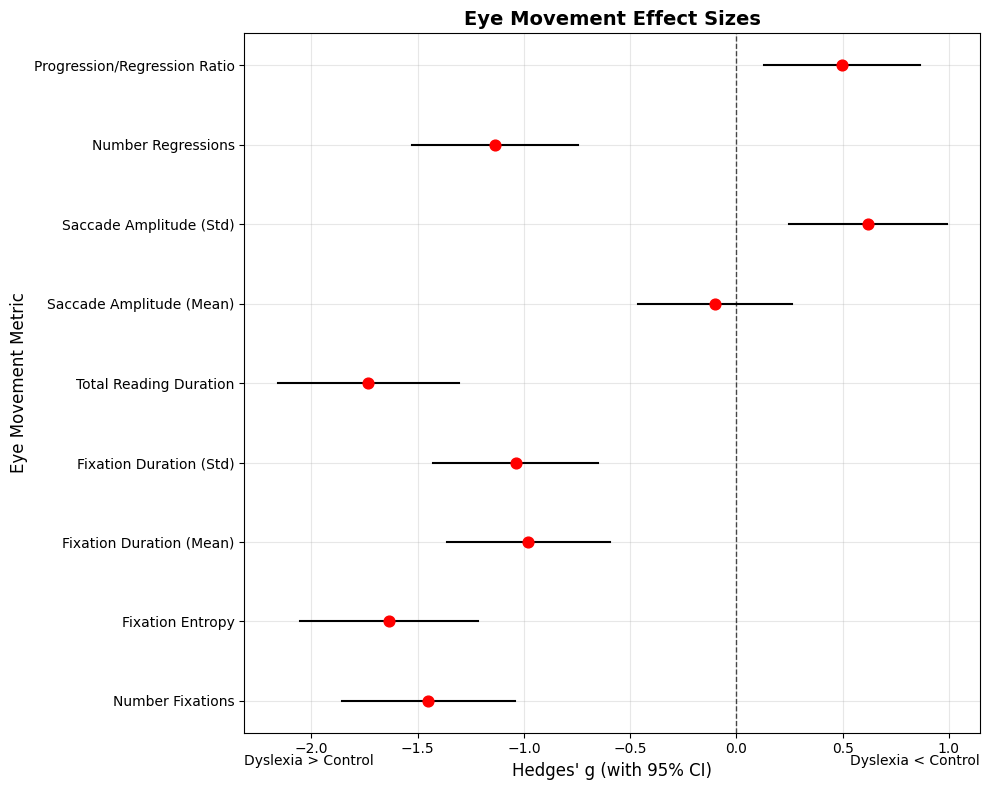

In [1051]:
np.random.seed(42)

subj = list(range(0, 117))

labels = np.array([WhichCN[sub] for sub in subj])

# take global feature for all stimuli and all subjects in subj
global_f = np.zeros((len(stimuli), len(subj)), dtype=object)
for stim in range(len(stimuli)):
    for s_idx,s in enumerate(subj):
        global_f[stim, s_idx] = GlobalFeature_array[stim][s]

effect_sizes_data = analyze_eyetracking_data(global_f, labels)
fig, ax = create_forest_plot(effect_sizes_data, title="Eye Movement Effect Sizes")
plt.show()

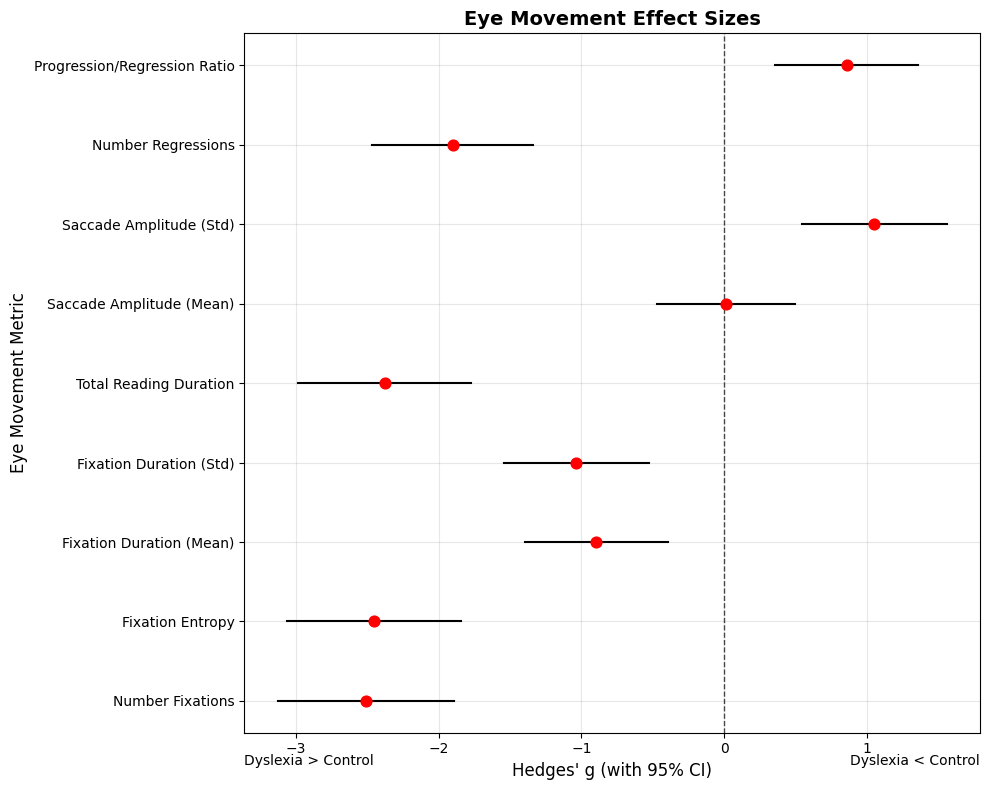

In [1052]:
np.random.seed(42)

subj = list(range(117, 200))

labels = np.array([WhichCN[sub] for sub in subj])

# take global feature for all stimuli and all subjects in subj
global_f = np.zeros((len(stimuli), len(subj)), dtype=object)
for stim in range(len(stimuli)):
    for s_idx,s in enumerate(subj):
        global_f[stim, s_idx] = GlobalFeature_array[stim][s]

effect_sizes_data = analyze_eyetracking_data(global_f, labels)
fig, ax = create_forest_plot(effect_sizes_data, title="Eye Movement Effect Sizes")
plt.show()

---

In [212]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [213]:
def train_test_pipeline(stimuli, momentum = 0.8):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(5):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)
            
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

#### Original Feature

In [214]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 7))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [215]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(210, 110)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(110, 55)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(55, 27) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(27, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7131434679031372
Epoch 5 loss: 0.46065467596054077
Epoch 10 loss: 0.36916571855545044
Epoch 15 loss: 0.32560616731643677
Epoch 0 loss: 0.730433464050293
Epoch 5 loss: 0.41138124465942383
Epoch 10 loss: 0.36096668243408203
Epoch 15 loss: 0.3252411484718323
Epoch 0 loss: 0.7201610803604126
Epoch 5 loss: 0.40791571140289307
Epoch 10 loss: 0.34249377250671387
Epoch 15 loss: 0.31567689776420593
Epoch 0 loss: 0.7518149018287659
Epoch 5 loss: 0.4379742443561554
Epoch 10 loss: 0.3533565104007721
Epoch 15 loss: 0.3426833152770996
Epoch 0 loss: 0.7302140593528748
Epoch 5 loss: 0.3983314335346222
Epoch 10 loss: 0.35612747073173523
Epoch 15 loss: 0.3278665840625763
Average accuracy: 0.888888888888889
Standard deviation: 0.09938079899999065
Total confusion matrix:
[[24.  1.]
 [ 4. 16.]]
False positives: 1.0
False negatives: 4.0


In [217]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7131434679031372
Epoch 5 loss: 0.49717408418655396
Epoch 10 loss: 0.4048148989677429
Epoch 15 loss: 0.3396638333797455
Epoch 0 loss: 0.730433464050293
Epoch 5 loss: 0.42747849225997925
Epoch 10 loss: 0.3816452622413635
Epoch 15 loss: 0.35036352276802063
Epoch 0 loss: 0.7201610803604126
Epoch 5 loss: 0.43325772881507874
Epoch 10 loss: 0.38290390372276306
Epoch 15 loss: 0.33269160985946655
Epoch 0 loss: 0.7518149018287659
Epoch 5 loss: 0.4404798150062561
Epoch 10 loss: 0.379679411649704
Epoch 15 loss: 0.3539485037326813
Epoch 0 loss: 0.7302140593528748
Epoch 5 loss: 0.4227532148361206
Epoch 10 loss: 0.4134810268878937
Epoch 15 loss: 0.35005947947502136
Average accuracy: 0.9111111111111111
Standard deviation: 0.10886621079036346
Total confusion matrix:
[[24.  1.]
 [ 3. 17.]]
False positives: 1.0
False negatives: 3.0


Approximation Error: -0.0008547236793674529 (< 0.05 is good)

FEATURE ANALYSIS


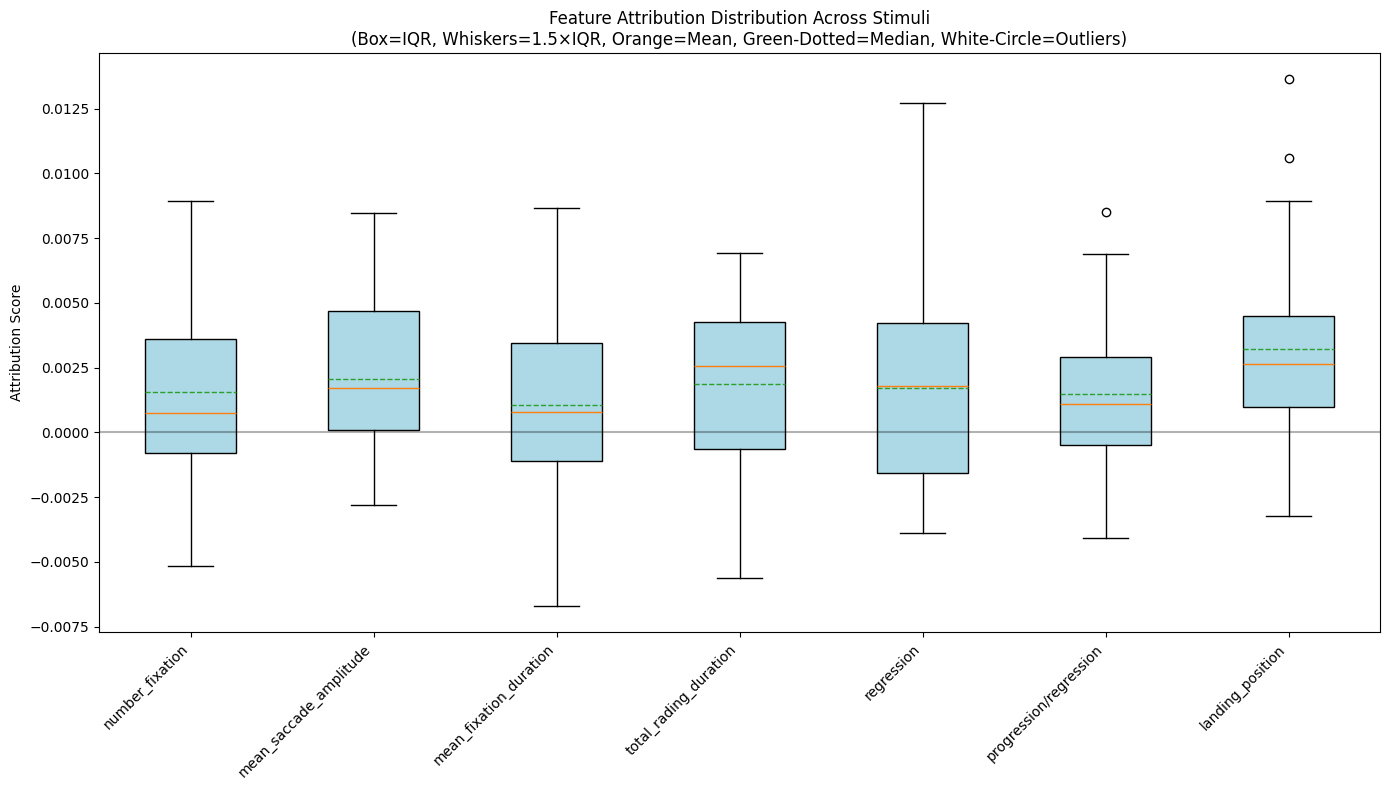


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0016, Std= 0.0038, Min=-0.0052, Max= 0.0089
mean_saccade_amplitude        : Mean= 0.0021, Std= 0.0032, Min=-0.0028, Max= 0.0085
mean_fixation_duration        : Mean= 0.0011, Std= 0.0030, Min=-0.0067, Max= 0.0087
total_rading_duration         : Mean= 0.0019, Std= 0.0034, Min=-0.0056, Max= 0.0069
regression                    : Mean= 0.0017, Std= 0.0040, Min=-0.0039, Max= 0.0127
progression/regression        : Mean= 0.0015, Std= 0.0031, Min=-0.0041, Max= 0.0085
landing_position              : Mean= 0.0032, Std= 0.0036, Min=-0.0032, Max= 0.0136


In [220]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_rading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original + Additional Feature

In [221]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_fixation_duration']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [222]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.8145200610160828
Epoch 5 loss: 0.39772137999534607
Epoch 10 loss: 0.3326546251773834
Epoch 15 loss: 0.31511735916137695
Epoch 0 loss: 0.7879138588905334
Epoch 5 loss: 0.4174639880657196
Epoch 10 loss: 0.35833704471588135
Epoch 15 loss: 0.34053364396095276
Epoch 0 loss: 0.7497554421424866
Epoch 5 loss: 0.3906533122062683
Epoch 10 loss: 0.3300391435623169
Epoch 15 loss: 0.31506916880607605
Epoch 0 loss: 0.6106556057929993
Epoch 5 loss: 0.36538004875183105
Epoch 10 loss: 0.3414096236228943
Epoch 15 loss: 0.3149273097515106
Epoch 0 loss: 0.6994131803512573
Epoch 5 loss: 0.39808928966522217
Epoch 10 loss: 0.3430861830711365
Epoch 15 loss: 0.3325907588005066
Average accuracy: 0.9333333333333333
Standard deviation: 0.0888888888888889
Total confusion matrix:
[[24.  1.]
 [ 2. 18.]]
False positives: 1.0
False negatives: 2.0


In [223]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.8145200610160828
Epoch 5 loss: 0.41577380895614624
Epoch 10 loss: 0.35764434933662415
Epoch 15 loss: 0.3297743797302246
Epoch 0 loss: 0.7879138588905334
Epoch 5 loss: 0.4408523440361023
Epoch 10 loss: 0.36985817551612854
Epoch 15 loss: 0.3442733585834503
Epoch 0 loss: 0.7497554421424866
Epoch 5 loss: 0.41311022639274597
Epoch 10 loss: 0.35110241174697876
Epoch 15 loss: 0.33226439356803894
Epoch 0 loss: 0.6106556057929993
Epoch 5 loss: 0.3904111981391907
Epoch 10 loss: 0.3671056628227234
Epoch 15 loss: 0.3277963101863861
Epoch 0 loss: 0.6994131803512573
Epoch 5 loss: 0.4096097946166992
Epoch 10 loss: 0.3572644889354706
Epoch 15 loss: 0.34760162234306335
Average accuracy: 0.9555555555555555
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[24.  1.]
 [ 1. 19.]]
False positives: 1.0
False negatives: 1.0


Approximation Error: -0.0002947118482552469 (< 0.05 is good)

FEATURE ANALYSIS


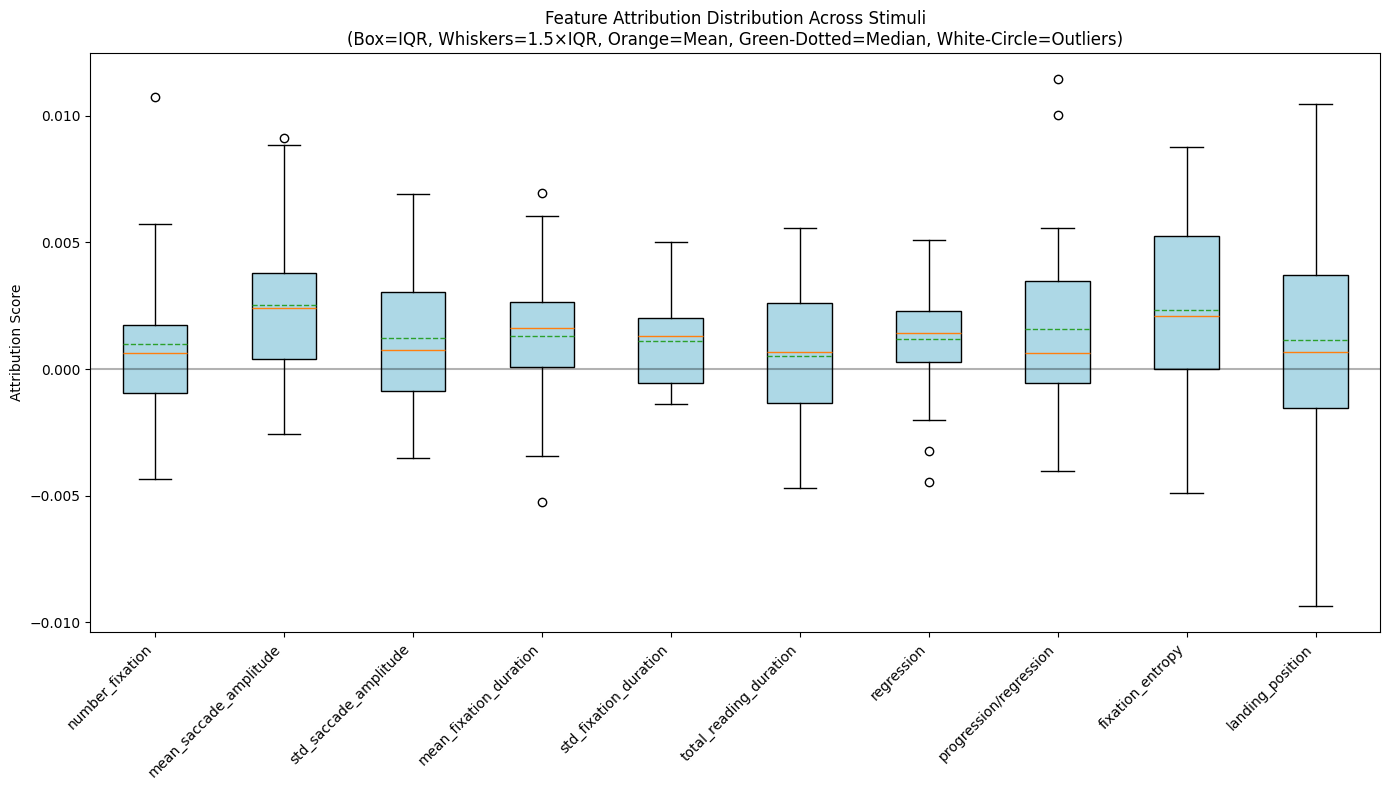


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0010, Std= 0.0031, Min=-0.0043, Max= 0.0107
mean_saccade_amplitude        : Mean= 0.0025, Std= 0.0030, Min=-0.0026, Max= 0.0091
std_saccade_amplitude         : Mean= 0.0012, Std= 0.0028, Min=-0.0035, Max= 0.0069
mean_fixation_duration        : Mean= 0.0013, Std= 0.0025, Min=-0.0052, Max= 0.0069
std_fixation_duration         : Mean= 0.0011, Std= 0.0017, Min=-0.0014, Max= 0.0050
total_reading_duration        : Mean= 0.0005, Std= 0.0028, Min=-0.0047, Max= 0.0056
regression                    : Mean= 0.0012, Std= 0.0020, Min=-0.0045, Max= 0.0051
progression/regression        : Mean= 0.0016, Std= 0.0035, Min=-0.0040, Max= 0.0114
fixation_entropy              : Mean= 0.0023, Std= 0.0035, Min=-0.0049, Max= 0.0088
landing_position              : Mean= 0.0011, Std= 0.0047, Min=-0.0094, Max= 0.0105


In [225]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    
    "fixation_entropy",
    "landing_position"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [258]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7193767428398132
Epoch 5 loss: 0.395651251077652
Epoch 10 loss: 0.36209824681282043
Epoch 15 loss: 0.351932168006897
Epoch 0 loss: 0.7288626432418823
Epoch 5 loss: 0.40978506207466125
Epoch 10 loss: 0.3626638948917389
Epoch 15 loss: 0.3413775861263275
Epoch 0 loss: 0.7291392683982849
Epoch 5 loss: 0.42967459559440613
Epoch 10 loss: 0.35829803347587585
Epoch 15 loss: 0.3397844433784485
Epoch 0 loss: 0.7385002970695496
Epoch 5 loss: 0.4178014397621155
Epoch 10 loss: 0.3656521439552307
Epoch 15 loss: 0.3553074598312378
Epoch 0 loss: 0.7300528883934021
Epoch 5 loss: 0.4116401672363281
Epoch 10 loss: 0.35942351818084717
Epoch 15 loss: 0.339083194732666
Average accuracy: 0.9333333333333333
Standard deviation: 0.0888888888888889
Total confusion matrix:
[[24.  1.]
 [ 2. 18.]]
False positives: 1.0
False negatives: 2.0


In [227]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 4))
    for s, _ in enumerate(subj):
        vector_roi[s][0] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][1] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][2] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [228]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(120, 60)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(60, 30) 
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.softmax(self.fc3(x)) 
        return x

_ = train_test_pipeline(stimuli)
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7607314586639404
Epoch 5 loss: 0.5780645608901978
Epoch 10 loss: 0.537301242351532
Epoch 15 loss: 0.4763453006744385
Epoch 0 loss: 0.7093905806541443
Epoch 5 loss: 0.5495133996009827
Epoch 10 loss: 0.48588088154792786
Epoch 15 loss: 0.44560807943344116
Epoch 0 loss: 0.8028771877288818
Epoch 5 loss: 0.6171410083770752
Epoch 10 loss: 0.5037908554077148
Epoch 15 loss: 0.4605426490306854
Epoch 0 loss: 0.7427940964698792
Epoch 5 loss: 0.5788161754608154
Epoch 10 loss: 0.495238333940506
Epoch 15 loss: 0.4300079941749573
Epoch 0 loss: 0.7514197826385498
Epoch 5 loss: 0.5924115180969238
Epoch 10 loss: 0.5781790614128113
Epoch 15 loss: 0.464698851108551
Average accuracy: 0.5555555555555556
Standard deviation: 0.21081851067789195
Total confusion matrix:
[[14. 11.]
 [ 9. 11.]]
False positives: 11.0
False negatives: 9.0
Using device: cuda
Epoch 0 loss: 0.7607314586639404
Epoch 5 loss: 0.5971359610557556
Epoch 10 loss: 0.573067843914032
Epoch 15 loss: 0.5327860116

In [229]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [230]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(330, 165)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(165, 83)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(83, 42) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7333075404167175
Epoch 5 loss: 0.3846561014652252
Epoch 10 loss: 0.34760621190071106
Epoch 15 loss: 0.3278003931045532
Epoch 0 loss: 0.6888101696968079
Epoch 5 loss: 0.39520126581192017
Epoch 10 loss: 0.34560084342956543
Epoch 15 loss: 0.3359094262123108
Epoch 0 loss: 0.7280277013778687
Epoch 5 loss: 0.38581952452659607
Epoch 10 loss: 0.3346747159957886
Epoch 15 loss: 0.3198213577270508
Epoch 0 loss: 0.7270470857620239
Epoch 5 loss: 0.4278768301010132
Epoch 10 loss: 0.3412078320980072
Epoch 15 loss: 0.31937524676322937
Epoch 0 loss: 0.6781678795814514
Epoch 5 loss: 0.4095029830932617
Epoch 10 loss: 0.3448854684829712
Epoch 15 loss: 0.3162221908569336
Average accuracy: 0.9333333333333332
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[24.  1.]
 [ 2. 18.]]
False positives: 1.0
False negatives: 2.0


In [231]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7333075404167175
Epoch 5 loss: 0.4022577106952667
Epoch 10 loss: 0.37155959010124207
Epoch 15 loss: 0.34669753909111023
Epoch 0 loss: 0.6888101696968079
Epoch 5 loss: 0.42158976197242737
Epoch 10 loss: 0.3604877293109894
Epoch 15 loss: 0.3538043200969696
Epoch 0 loss: 0.7280277013778687
Epoch 5 loss: 0.41217416524887085
Epoch 10 loss: 0.35087984800338745
Epoch 15 loss: 0.3307814300060272
Epoch 0 loss: 0.7270470857620239
Epoch 5 loss: 0.4579123556613922
Epoch 10 loss: 0.3699813485145569
Epoch 15 loss: 0.35042259097099304
Epoch 0 loss: 0.6781678795814514
Epoch 5 loss: 0.4420141279697418
Epoch 10 loss: 0.37575575709342957
Epoch 15 loss: 0.3279801309108734
Average accuracy: 0.9333333333333332
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[24.  1.]
 [ 2. 18.]]
False positives: 1.0
False negatives: 2.0


Approximation Error: -9.505749039817601e-05 (< 0.05 is good)

FEATURE ANALYSIS


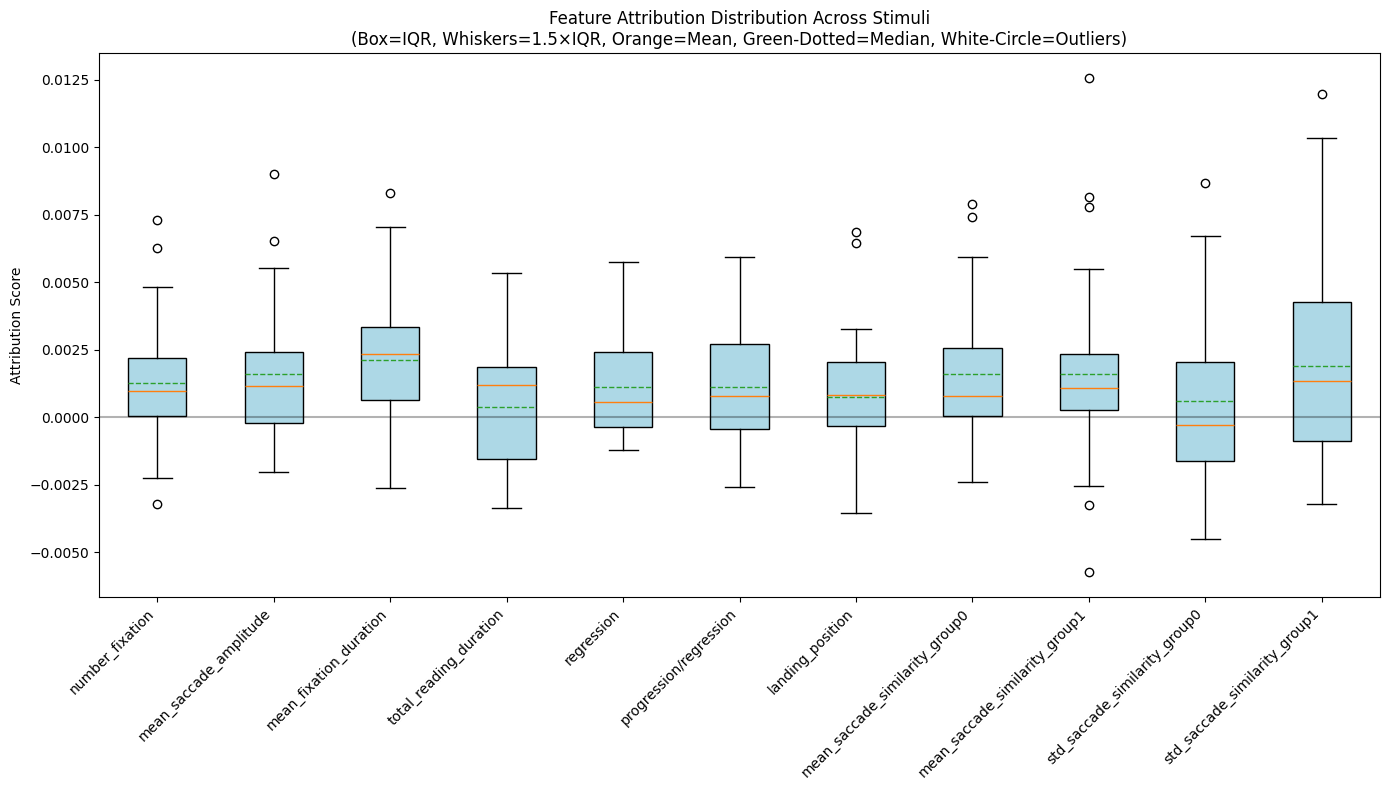


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0013, Std= 0.0023, Min=-0.0032, Max= 0.0073
mean_saccade_amplitude        : Mean= 0.0016, Std= 0.0026, Min=-0.0020, Max= 0.0090
mean_fixation_duration        : Mean= 0.0021, Std= 0.0026, Min=-0.0026, Max= 0.0083
total_reading_duration        : Mean= 0.0004, Std= 0.0023, Min=-0.0034, Max= 0.0053
regression                    : Mean= 0.0011, Std= 0.0019, Min=-0.0012, Max= 0.0058
progression/regression        : Mean= 0.0011, Std= 0.0022, Min=-0.0026, Max= 0.0059
landing_position              : Mean= 0.0007, Std= 0.0023, Min=-0.0035, Max= 0.0069
mean_saccade_similarity_group0: Mean= 0.0016, Std= 0.0026, Min=-0.0024, Max= 0.0079
mean_saccade_similarity_group1: Mean= 0.0016, Std= 0.0034, Min=-0.0057, Max= 0.0126
std_saccade_similarity_group0 : Mean= 0.0006, Std= 0.0031, Min=-0.0045, Max= 0.0087
std_saccade_similarity_group1 : Mean= 0.0019, Std= 0.0039, Min=-0.003

In [233]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [234]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [235]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 32) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7709717750549316
Epoch 5 loss: 0.42956551909446716
Epoch 10 loss: 0.3441886007785797
Epoch 15 loss: 0.33476722240448
Epoch 0 loss: 0.7672361731529236
Epoch 5 loss: 0.4465297758579254
Epoch 10 loss: 0.36395302414894104
Epoch 15 loss: 0.34563910961151123
Epoch 0 loss: 0.7246748805046082
Epoch 5 loss: 0.41628921031951904
Epoch 10 loss: 0.3322959244251251
Epoch 15 loss: 0.3156268894672394
Epoch 0 loss: 0.693192183971405
Epoch 5 loss: 0.42792847752571106
Epoch 10 loss: 0.34030625224113464
Epoch 15 loss: 0.33080577850341797
Epoch 0 loss: 0.6943543553352356
Epoch 5 loss: 0.38907599449157715
Epoch 10 loss: 0.3416684865951538
Epoch 15 loss: 0.32079795002937317
Average accuracy: 0.9111111111111111
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[24.  1.]
 [ 3. 17.]]
False positives: 1.0
False negatives: 3.0


In [236]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7709717750549316
Epoch 5 loss: 0.4484226405620575
Epoch 10 loss: 0.37095728516578674
Epoch 15 loss: 0.3666737377643585
Epoch 0 loss: 0.7672361731529236
Epoch 5 loss: 0.4625251889228821
Epoch 10 loss: 0.39913997054100037
Epoch 15 loss: 0.36961427330970764
Epoch 0 loss: 0.7246748805046082
Epoch 5 loss: 0.447123259305954
Epoch 10 loss: 0.35866010189056396
Epoch 15 loss: 0.33338019251823425
Epoch 0 loss: 0.693192183971405
Epoch 5 loss: 0.45560869574546814
Epoch 10 loss: 0.3762001097202301
Epoch 15 loss: 0.3458142876625061
Epoch 0 loss: 0.6943543553352356
Epoch 5 loss: 0.40391677618026733
Epoch 10 loss: 0.3422677516937256
Epoch 15 loss: 0.3403512239456177
Average accuracy: 0.9333333333333332
Standard deviation: 0.08888888888888889
Total confusion matrix:
[[24.  1.]
 [ 2. 18.]]
False positives: 1.0
False negatives: 2.0


Approximation Error: -0.00044918988714925945 (< 0.05 is good)

FEATURE ANALYSIS


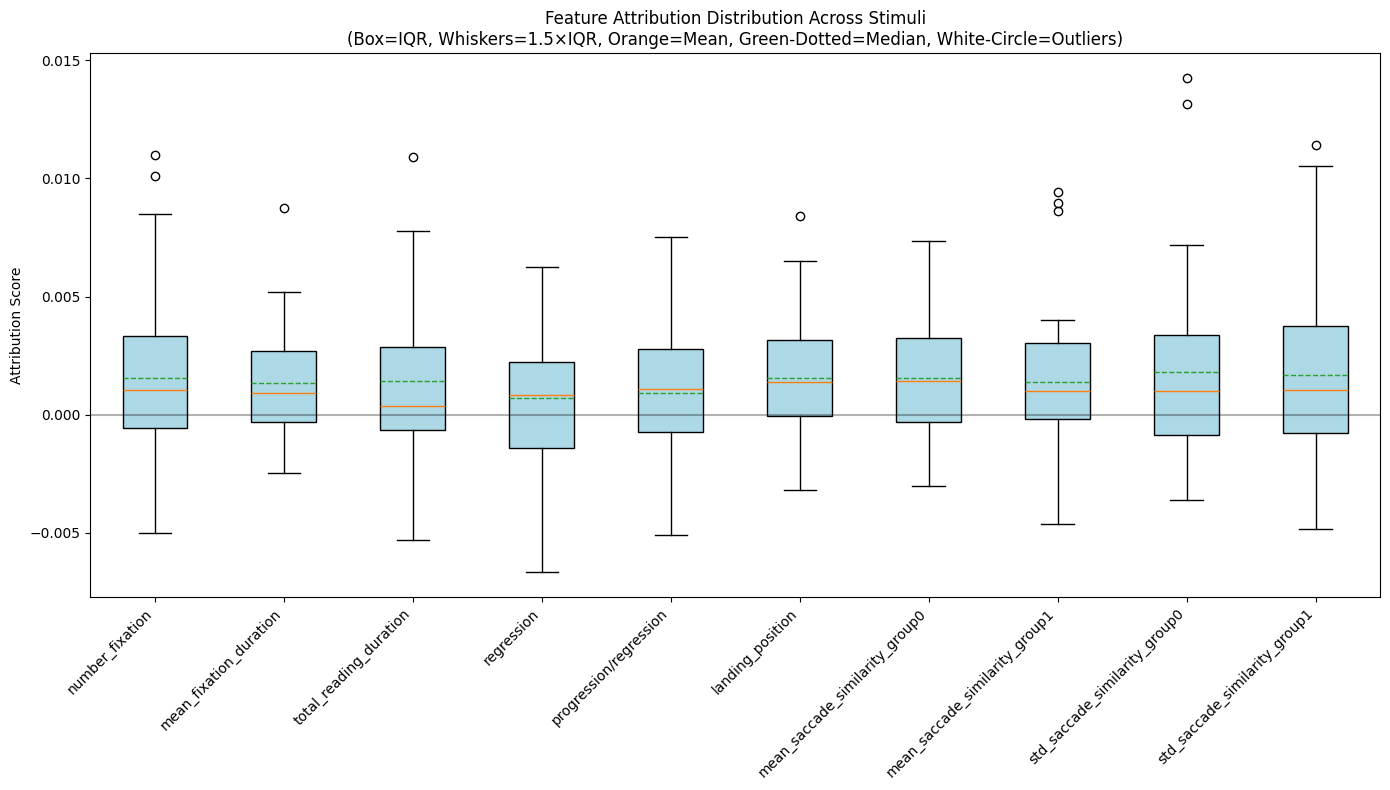


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0015, Std= 0.0039, Min=-0.0050, Max= 0.0110
mean_fixation_duration        : Mean= 0.0013, Std= 0.0024, Min=-0.0025, Max= 0.0088
total_reading_duration        : Mean= 0.0014, Std= 0.0034, Min=-0.0053, Max= 0.0109
regression                    : Mean= 0.0007, Std= 0.0030, Min=-0.0067, Max= 0.0062
progression/regression        : Mean= 0.0009, Std= 0.0029, Min=-0.0051, Max= 0.0075
landing_position              : Mean= 0.0016, Std= 0.0027, Min=-0.0032, Max= 0.0084
mean_saccade_similarity_group0: Mean= 0.0015, Std= 0.0025, Min=-0.0030, Max= 0.0073
mean_saccade_similarity_group1: Mean= 0.0014, Std= 0.0034, Min=-0.0046, Max= 0.0094
std_saccade_similarity_group0 : Mean= 0.0018, Std= 0.0041, Min=-0.0036, Max= 0.0143
std_saccade_similarity_group1 : Mean= 0.0017, Std= 0.0040, Min=-0.0049, Max= 0.0114


In [239]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [240]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 9))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [241]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(270, 130)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(130, 65)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(65, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7811082005500793
Epoch 5 loss: 0.4292677342891693
Epoch 10 loss: 0.3578600585460663
Epoch 15 loss: 0.316257506608963
Epoch 0 loss: 0.7180222272872925
Epoch 5 loss: 0.4234282970428467
Epoch 10 loss: 0.3573550581932068
Epoch 15 loss: 0.3290976881980896
Epoch 0 loss: 0.7346906065940857
Epoch 5 loss: 0.41616111993789673
Epoch 10 loss: 0.34040144085884094
Epoch 15 loss: 0.3283040523529053
Epoch 0 loss: 0.767507791519165
Epoch 5 loss: 0.41668063402175903
Epoch 10 loss: 0.34277263283729553
Epoch 15 loss: 0.32673779129981995
Epoch 0 loss: 0.7670065760612488
Epoch 5 loss: 0.4461640417575836
Epoch 10 loss: 0.3381431996822357
Epoch 15 loss: 0.31746986508369446
Average accuracy: 0.9111111111111111
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[24.  1.]
 [ 3. 17.]]
False positives: 1.0
False negatives: 3.0


In [242]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7811082005500793
Epoch 5 loss: 0.46233031153678894
Epoch 10 loss: 0.3864838182926178
Epoch 15 loss: 0.3503028154373169
Epoch 0 loss: 0.7180222272872925
Epoch 5 loss: 0.4575839340686798
Epoch 10 loss: 0.3886796832084656
Epoch 15 loss: 0.35144853591918945
Epoch 0 loss: 0.7346906065940857
Epoch 5 loss: 0.4390677809715271
Epoch 10 loss: 0.36418282985687256
Epoch 15 loss: 0.3382406234741211
Epoch 0 loss: 0.767507791519165
Epoch 5 loss: 0.45411333441734314
Epoch 10 loss: 0.38028785586357117
Epoch 15 loss: 0.35045018792152405
Epoch 0 loss: 0.7670065760612488
Epoch 5 loss: 0.46988949179649353
Epoch 10 loss: 0.3652830719947815
Epoch 15 loss: 0.3421621322631836
Average accuracy: 0.888888888888889
Standard deviation: 0.07027283689263066
Total confusion matrix:
[[23.  2.]
 [ 3. 17.]]
False positives: 2.0
False negatives: 3.0


Approximation Error: -0.00043075019493699074 (< 0.05 is good)

FEATURE ANALYSIS


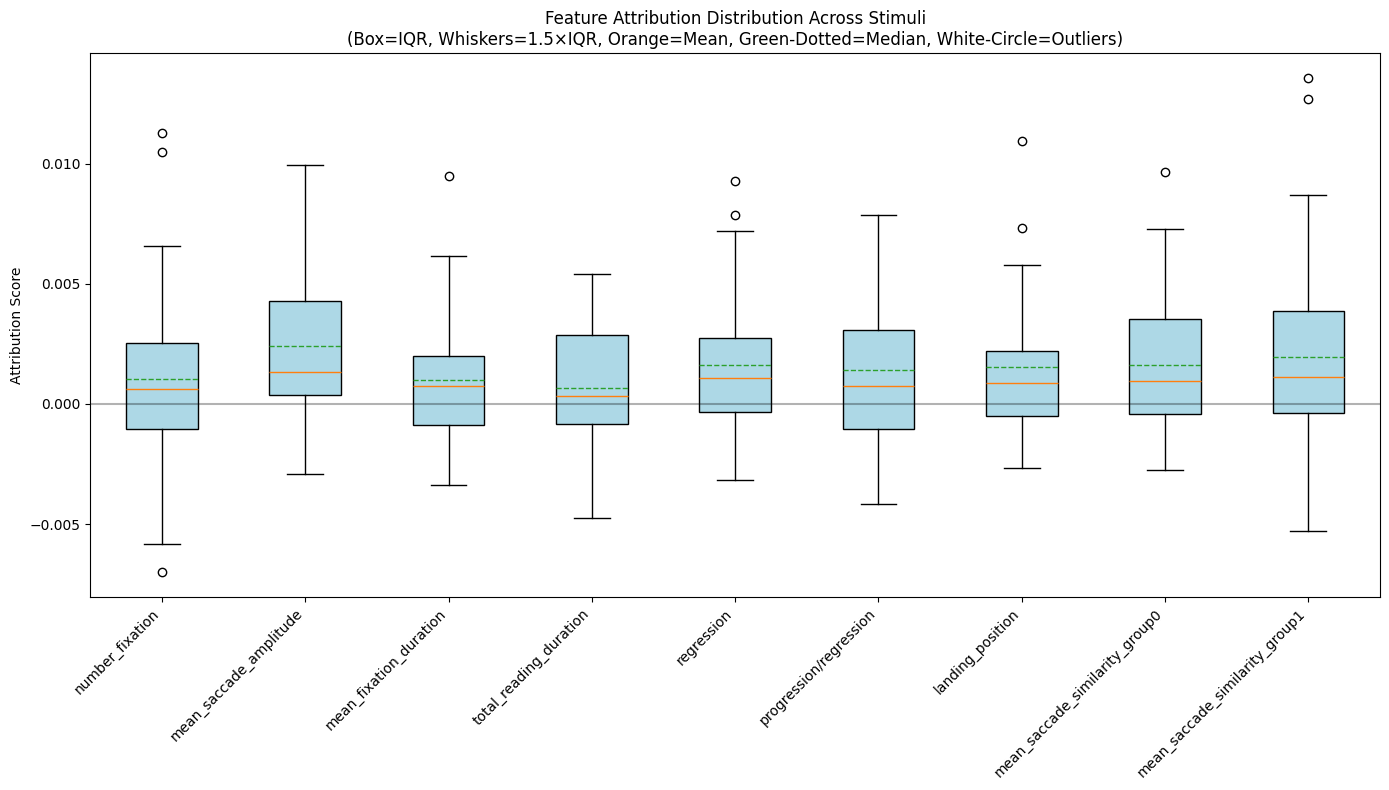


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0010, Std= 0.0040, Min=-0.0070, Max= 0.0113
mean_saccade_amplitude        : Mean= 0.0024, Std= 0.0032, Min=-0.0029, Max= 0.0099
mean_fixation_duration        : Mean= 0.0010, Std= 0.0027, Min=-0.0034, Max= 0.0095
total_reading_duration        : Mean= 0.0007, Std= 0.0027, Min=-0.0047, Max= 0.0054
regression                    : Mean= 0.0016, Std= 0.0029, Min=-0.0032, Max= 0.0093
progression/regression        : Mean= 0.0014, Std= 0.0034, Min=-0.0041, Max= 0.0079
landing_position              : Mean= 0.0015, Std= 0.0031, Min=-0.0026, Max= 0.0110
mean_saccade_similarity_group0: Mean= 0.0016, Std= 0.0029, Min=-0.0027, Max= 0.0096
mean_saccade_similarity_group1: Mean= 0.0020, Std= 0.0044, Min=-0.0053, Max= 0.0136


In [244]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [245]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [246]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7655031681060791
Epoch 5 loss: 0.4156697392463684
Epoch 10 loss: 0.3539597690105438
Epoch 15 loss: 0.3315791189670563
Epoch 0 loss: 0.6986517310142517
Epoch 5 loss: 0.41935575008392334
Epoch 10 loss: 0.33865252137184143
Epoch 15 loss: 0.3364714980125427
Epoch 0 loss: 0.728092610836029
Epoch 5 loss: 0.4135240614414215
Epoch 10 loss: 0.3400239646434784
Epoch 15 loss: 0.3275201916694641
Epoch 0 loss: 0.6874378323554993
Epoch 5 loss: 0.425958514213562
Epoch 10 loss: 0.33745619654655457
Epoch 15 loss: 0.3328445255756378
Epoch 0 loss: 0.7035000324249268
Epoch 5 loss: 0.4090522527694702
Epoch 10 loss: 0.3779604732990265
Epoch 15 loss: 0.3278244733810425
Average accuracy: 0.9333333333333332
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[24.  1.]
 [ 2. 18.]]
False positives: 1.0
False negatives: 2.0


In [247]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7655031681060791
Epoch 5 loss: 0.4485258162021637
Epoch 10 loss: 0.3819703757762909
Epoch 15 loss: 0.34960880875587463
Epoch 0 loss: 0.6986517310142517
Epoch 5 loss: 0.44536682963371277
Epoch 10 loss: 0.3647415041923523
Epoch 15 loss: 0.35646307468414307
Epoch 0 loss: 0.728092610836029
Epoch 5 loss: 0.4397525489330292
Epoch 10 loss: 0.3705555200576782
Epoch 15 loss: 0.3455387353897095
Epoch 0 loss: 0.6874378323554993
Epoch 5 loss: 0.4603375196456909
Epoch 10 loss: 0.36460837721824646
Epoch 15 loss: 0.3655896484851837
Epoch 0 loss: 0.7035000324249268
Epoch 5 loss: 0.4344152510166168
Epoch 10 loss: 0.4129831790924072
Epoch 15 loss: 0.3421404957771301
Average accuracy: 0.9333333333333332
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[24.  1.]
 [ 2. 18.]]
False positives: 1.0
False negatives: 2.0


Approximation Error: -0.0009901252342388034 (< 0.05 is good)

FEATURE ANALYSIS


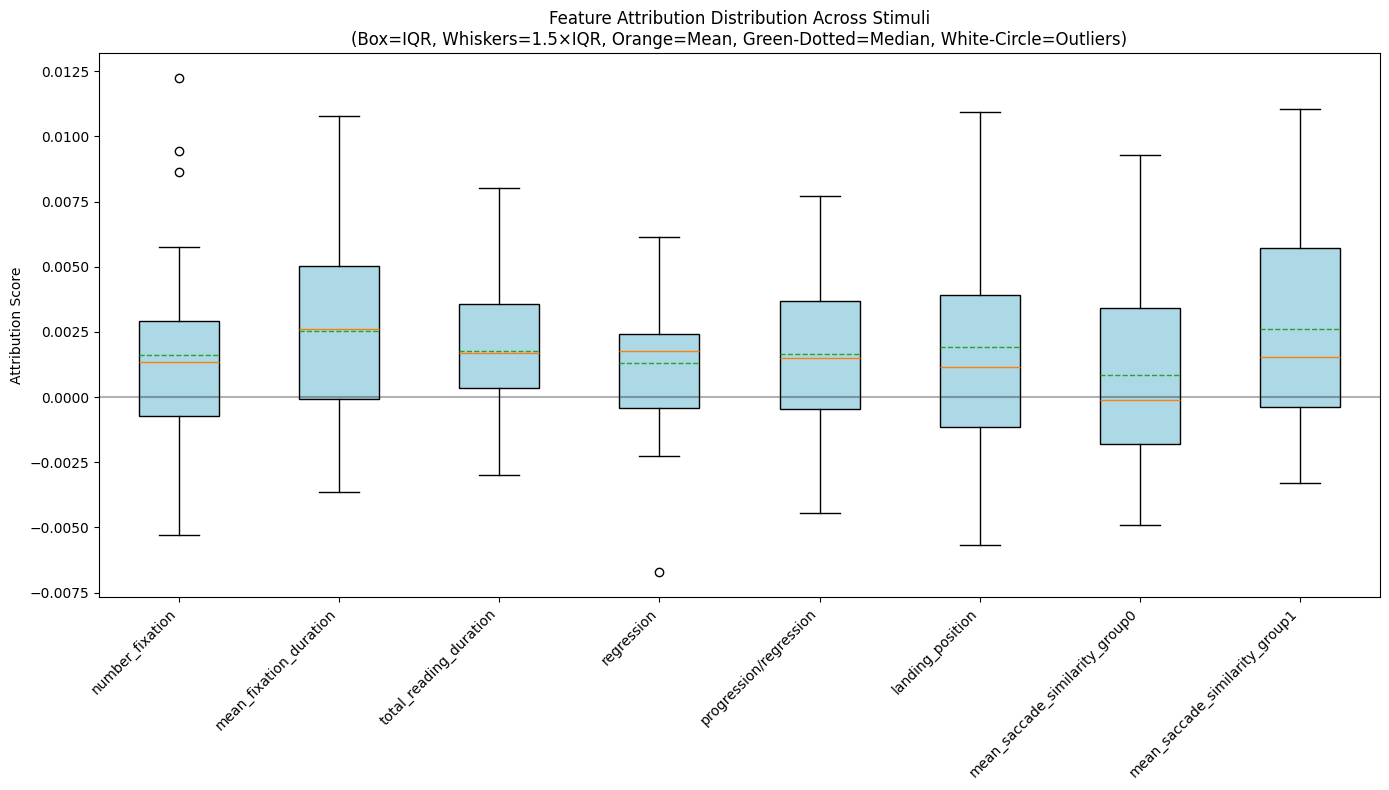


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0016, Std= 0.0039, Min=-0.0053, Max= 0.0122
mean_fixation_duration        : Mean= 0.0025, Std= 0.0039, Min=-0.0036, Max= 0.0108
total_reading_duration        : Mean= 0.0018, Std= 0.0025, Min=-0.0030, Max= 0.0080
regression                    : Mean= 0.0013, Std= 0.0026, Min=-0.0067, Max= 0.0061
progression/regression        : Mean= 0.0017, Std= 0.0030, Min=-0.0045, Max= 0.0077
landing_position              : Mean= 0.0019, Std= 0.0040, Min=-0.0057, Max= 0.0109
mean_saccade_similarity_group0: Mean= 0.0009, Std= 0.0038, Min=-0.0049, Max= 0.0093
mean_saccade_similarity_group1: Mean= 0.0026, Std= 0.0040, Min=-0.0033, Max= 0.0111


In [ ]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### All

In [250]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 14))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_fixation_duration']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][11] = SimAndFeatureVals[s][0][0][5]
        vector_roi[s][12] = SimAndFeatureVals[s][0][0][6]
        vector_roi[s][13] = SimAndFeatureVals[s][0][0][7]
        
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [251]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(420, 210)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(210, 105)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(105, 53) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(53, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7467820644378662
Epoch 5 loss: 0.40122076869010925
Epoch 10 loss: 0.34548383951187134
Epoch 15 loss: 0.3291369676589966
Epoch 0 loss: 0.7453165054321289
Epoch 5 loss: 0.39418309926986694
Epoch 10 loss: 0.3332156240940094
Epoch 15 loss: 0.3164861798286438
Epoch 0 loss: 0.7587034702301025
Epoch 5 loss: 0.40570271015167236
Epoch 10 loss: 0.3388051390647888
Epoch 15 loss: 0.3155056834220886
Epoch 0 loss: 0.6699893474578857
Epoch 5 loss: 0.3840314745903015
Epoch 10 loss: 0.34784501791000366
Epoch 15 loss: 0.3409339189529419
Epoch 0 loss: 0.6653671860694885
Epoch 5 loss: 0.36893826723098755
Epoch 10 loss: 0.3289092779159546
Epoch 15 loss: 0.326124370098114
Average accuracy: 0.9111111111111111
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[24.  1.]
 [ 3. 17.]]
False positives: 1.0
False negatives: 3.0


In [252]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7467820644378662
Epoch 5 loss: 0.4312913119792938
Epoch 10 loss: 0.37062570452690125
Epoch 15 loss: 0.34585273265838623
Epoch 0 loss: 0.7453165054321289
Epoch 5 loss: 0.4195850193500519
Epoch 10 loss: 0.3500541150569916
Epoch 15 loss: 0.33792468905448914
Epoch 0 loss: 0.7587034702301025
Epoch 5 loss: 0.42343536019325256
Epoch 10 loss: 0.36155056953430176
Epoch 15 loss: 0.3327248990535736
Epoch 0 loss: 0.6699893474578857
Epoch 5 loss: 0.41582363843917847
Epoch 10 loss: 0.37227901816368103
Epoch 15 loss: 0.34329167008399963
Epoch 0 loss: 0.6653671860694885
Epoch 5 loss: 0.3874913156032562
Epoch 10 loss: 0.346452534198761
Epoch 15 loss: 0.3313738703727722
Average accuracy: 0.8666666666666666
Standard deviation: 0.04444444444444442
Total confusion matrix:
[[24.  1.]
 [ 5. 15.]]
False positives: 1.0
False negatives: 5.0


Approximation Error: 0.00012920399603899568 (< 0.05 is good)

FEATURE ANALYSIS


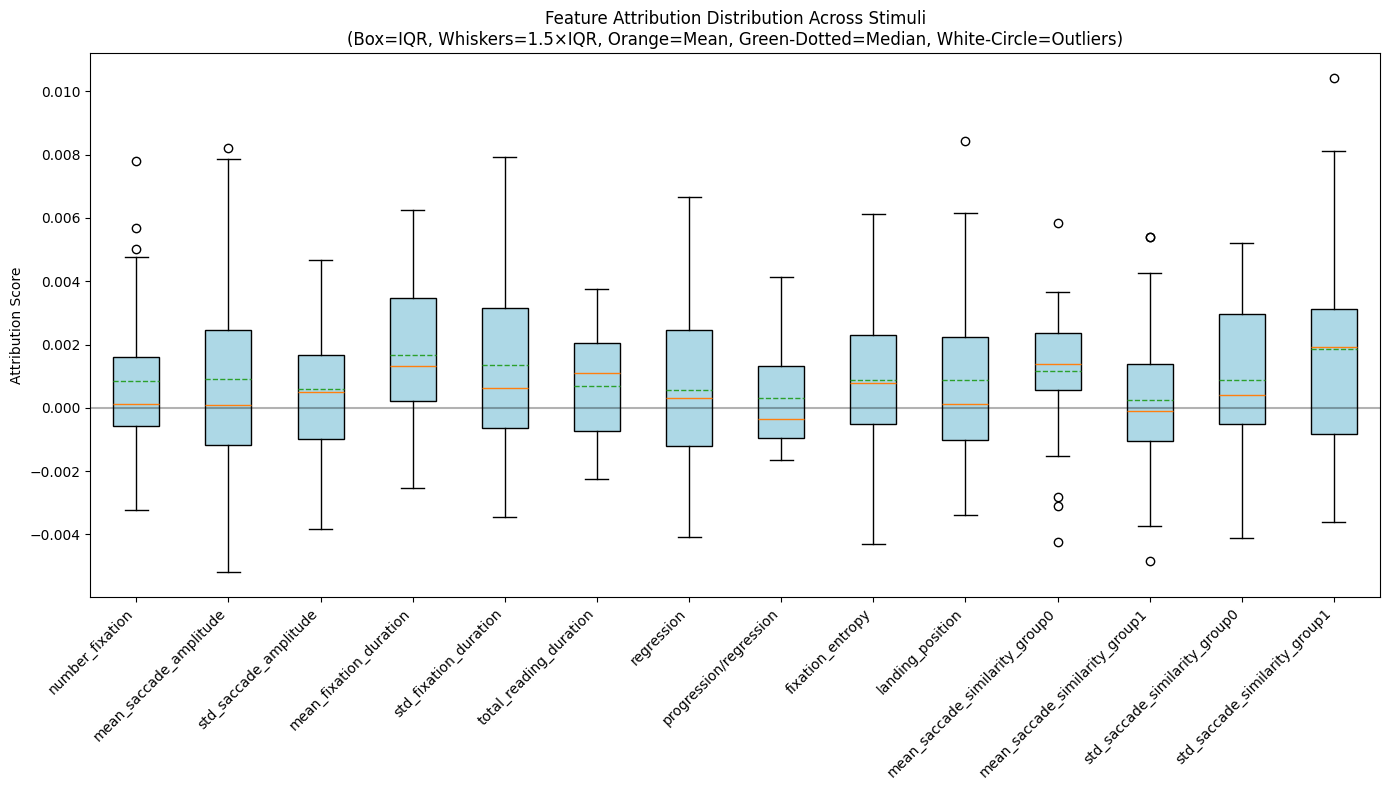


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0008, Std= 0.0025, Min=-0.0032, Max= 0.0078
mean_saccade_amplitude        : Mean= 0.0009, Std= 0.0033, Min=-0.0052, Max= 0.0082
std_saccade_amplitude         : Mean= 0.0006, Std= 0.0021, Min=-0.0038, Max= 0.0047
mean_fixation_duration        : Mean= 0.0017, Std= 0.0022, Min=-0.0025, Max= 0.0063
std_fixation_duration         : Mean= 0.0013, Std= 0.0030, Min=-0.0035, Max= 0.0079
total_reading_duration        : Mean= 0.0007, Std= 0.0018, Min=-0.0022, Max= 0.0038
regression                    : Mean= 0.0006, Std= 0.0025, Min=-0.0041, Max= 0.0067
progression/regression        : Mean= 0.0003, Std= 0.0017, Min=-0.0017, Max= 0.0041
fixation_entropy              : Mean= 0.0009, Std= 0.0026, Min=-0.0043, Max= 0.0061
landing_position              : Mean= 0.0009, Std= 0.0027, Min=-0.0034, Max= 0.0084
mean_saccade_similarity_group0: Mean= 0.0012, Std= 0.0021, Min=-0.004

In [254]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original (without mean saccade amplitude)

In [1068]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 6))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [1069]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(180, 90)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(90, 45)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(45, 23) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(23, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7596023678779602
Epoch 5 loss: 0.47615939378738403
Epoch 10 loss: 0.3787342607975006
Epoch 15 loss: 0.33598917722702026
Epoch 0 loss: 0.772102415561676
Epoch 5 loss: 0.43309035897254944
Epoch 10 loss: 0.3611220121383667
Epoch 15 loss: 0.33703893423080444
Epoch 0 loss: 0.75862056016922
Epoch 5 loss: 0.436658650636673
Epoch 10 loss: 0.33359673619270325
Epoch 15 loss: 0.3382125198841095
Epoch 0 loss: 0.7100989818572998
Epoch 5 loss: 0.4350093901157379
Epoch 10 loss: 0.35600557923316956
Epoch 15 loss: 0.3605787754058838
Epoch 0 loss: 0.754875123500824
Epoch 5 loss: 0.4621613919734955
Epoch 10 loss: 0.3670932352542877
Epoch 15 loss: 0.34435421228408813
Average accuracy: 0.888888888888889
Standard deviation: 0.09938079899999065
Total confusion matrix:
[[24.  1.]
 [ 4. 16.]]
False positives: 1.0
False negatives: 4.0


In [ ]:
_ = train_test_pipeline(stimuli, 0.5)

In [ ]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "regression",
    "progression/regression",
    "landing_position"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Now we try to dont consider features that use time information

In [1090]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 6))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][4] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0: 
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [1091]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(180, 90)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(90, 45)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(45, 23) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(23, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7672882080078125
Epoch 5 loss: 0.4955839216709137
Epoch 10 loss: 0.41096925735473633
Epoch 15 loss: 0.35934096574783325
Epoch 0 loss: 0.7397991418838501
Epoch 5 loss: 0.48850584030151367
Epoch 10 loss: 0.40648186206817627
Epoch 15 loss: 0.37811216711997986
Epoch 0 loss: 0.7052374482154846
Epoch 5 loss: 0.5146445035934448
Epoch 10 loss: 0.3927384316921234
Epoch 15 loss: 0.3676753640174866
Epoch 0 loss: 0.6794531345367432
Epoch 5 loss: 0.523749828338623
Epoch 10 loss: 0.4140181839466095
Epoch 15 loss: 0.3802996575832367
Epoch 0 loss: 0.7132989764213562
Epoch 5 loss: 0.537826418876648
Epoch 10 loss: 0.41507455706596375
Epoch 15 loss: 0.36636918783187866
Average accuracy: 0.8666666666666668
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[23.  2.]
 [ 4. 16.]]
False positives: 2.0
False negatives: 4.0


In [1092]:
feature_names = [
    "number_fixation",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]

Approximation Error: 0.0007226612651720643 (< 0.05 is good)

FEATURE ANALYSIS


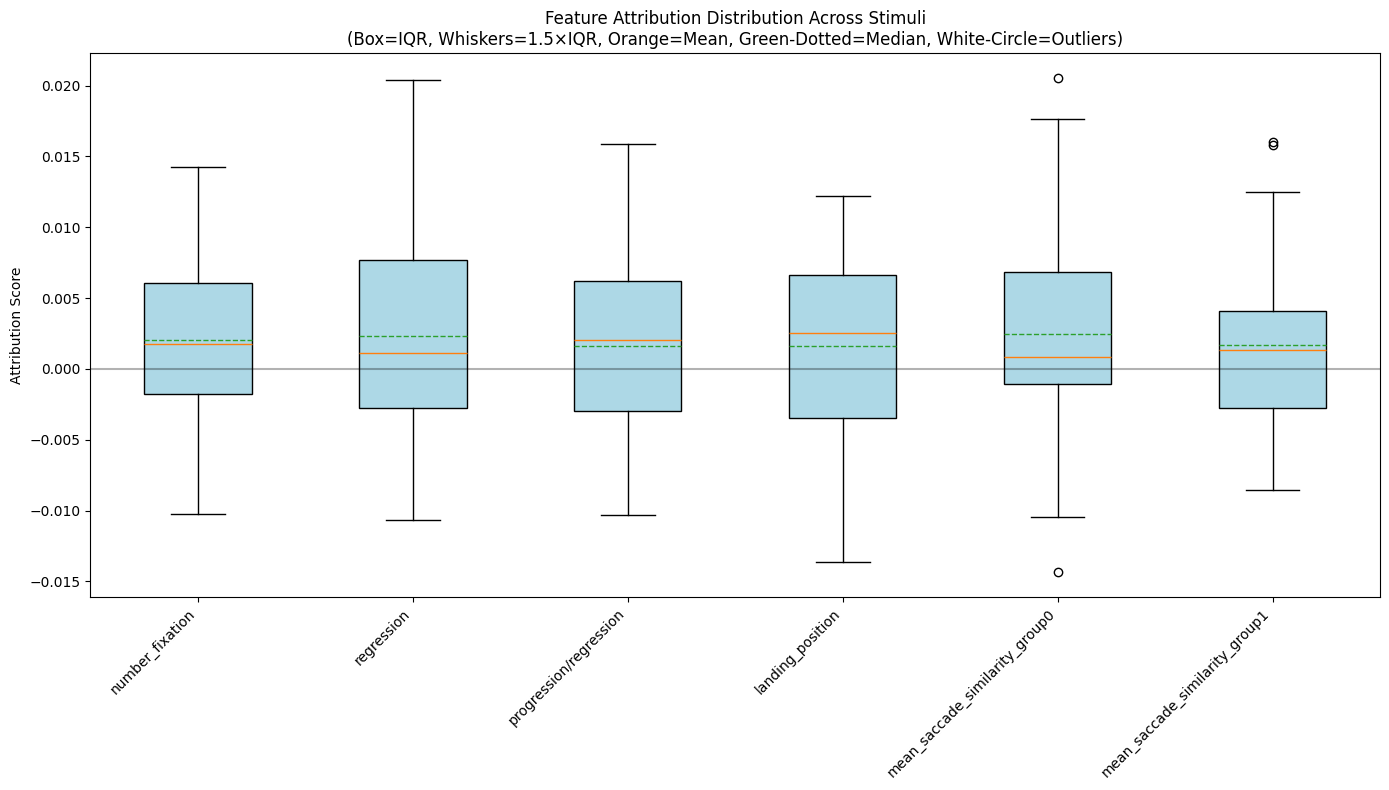


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0020, Std= 0.0060, Min=-0.0103, Max= 0.0143
regression                    : Mean= 0.0023, Std= 0.0066, Min=-0.0106, Max= 0.0204
progression/regression        : Mean= 0.0016, Std= 0.0063, Min=-0.0103, Max= 0.0159
landing_position              : Mean= 0.0016, Std= 0.0065, Min=-0.0136, Max= 0.0122
mean_saccade_similarity_group0: Mean= 0.0024, Std= 0.0074, Min=-0.0144, Max= 0.0205
mean_saccade_similarity_group1: Mean= 0.0017, Std= 0.0064, Min=-0.0085, Max= 0.0160


In [1093]:
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [1094]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 4))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [1095]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(120, 60)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(60, 30) 
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.softmax(self.fc3(x)) 
        return x
    

results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.796052098274231
Epoch 5 loss: 0.46191009879112244
Epoch 10 loss: 0.39694494009017944
Epoch 15 loss: 0.3815282881259918
Epoch 0 loss: 0.7446155548095703
Epoch 5 loss: 0.4514506757259369
Epoch 10 loss: 0.3984941840171814
Epoch 15 loss: 0.3762269914150238
Epoch 0 loss: 0.7682733535766602
Epoch 5 loss: 0.4766480624675751
Epoch 10 loss: 0.4150795340538025
Epoch 15 loss: 0.3574000895023346
Epoch 0 loss: 0.7365850210189819
Epoch 5 loss: 0.45080801844596863
Epoch 10 loss: 0.3961237668991089
Epoch 15 loss: 0.3642353117465973
Epoch 0 loss: 0.7448078393936157
Epoch 5 loss: 0.48189398646354675
Epoch 10 loss: 0.42055365443229675
Epoch 15 loss: 0.3800243139266968
Average accuracy: 0.8666666666666666
Standard deviation: 0.0831479419283098
Total confusion matrix:
[[22.  3.]
 [ 3. 17.]]
False positives: 3.0
False negatives: 3.0


Removing some features (that we already tested in the ETDD70 dataset) we can see that the performance is still good, with a lower average accuracy and a lower standard deviation.

---

## CNN 

We proceed to transform the fixation in a continuous signal and calculate the magnitude of the signal in the time domain that it will be used as input for a convolutional neural network.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct
from scipy.fft import fft

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [9]:
FixData['Group'].unique()

array([ 4.,  1.,  3.,  2., nan])

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct, idct
from scipy.fft import fft

In [ ]:
def get_data(stim, split_size, batch_size, random_state, verbose=False):
    # Splitting by participants
    # Remove subjects that start with P
    FixData2 = FixData[~FixData['subject'].str.startswith('P')]
    map_subj = [DyslexiaDat.subjects[sub] for sub in set_subj]
    FixData2 = FixData2[~FixData2['subject'].isin(map_subj)]
    Data=FixData2[FixData2['stimulus']==stim]
    subj = Data['subject'].unique()
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state)
    train_data = Data[Data['subject'].isin(train_participants)]
    test_data = Data[Data['subject'].isin(test_participants)]
    train_labels = train_data.groupby('subject')['Group'].first().values
    test_labels = test_data.groupby('subject')['Group'].first().values

    # change train labels
    train_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in train_labels])
    test_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in test_labels])

    # Pad the data to the same length (number of rows for subject)
    max_length_train = max(len(train_data[(train_data['subject'] == subj) & 
                                    ((train_data['Group'] == 1.0) | (train_data['Group'] == 2.0))]) 
                     for subj in train_participants)
    max_length_test = max(len(test_data[(test_data['subject'] == subj) &
                                    ((test_data['Group'] == 1.0) | (test_data['Group'] == 2.0))])
                        for subj in test_participants)
    pad = max(max_length_train, max_length_test)

    if verbose:
        print(f"Train participants: {len(train_participants)}")
        print(f"Test participants: {len(test_participants)}")
        print(f"Pad size: {pad}")

    # "Eye tracking based dyslexia detection using a holistic approach"
    # Step 1: Perform DCT Type III (and interpoalte Step 2)
    def perform_dct_interpolate(data, pad_size):
        # sqrt(2/pad_size) * cn * cos((pi * ((2*k + 1) * n)) / (2 * pad_size)) k = 0, 1, ..., pad_size - 1 n = 0, 1, ..., pad_size - 1
        dct_result = np.zeros((pad_size, data.shape[1]))
        for axis in range(data.shape[1]):
            c = dct(data[:, axis], type=3, norm='ortho')
            dct_result[:, axis] = np.pad(c, (0, pad_size-len(c)))
        return dct_result
        
    # Step 3: Perform IDCT Type III
    def perform_idct(coeffs):
        idct_result = np.zeros_like(coeffs)
        for axis in range(coeffs.shape[1]):
            idct_result[:, axis] = idct(coeffs[:, axis], type=3, norm='ortho')
        return idct_result

    # Step 4: Energy correction based on number of zeros
    def correct_energy(data, original_length):
        # Calculate the ratio of the original length to the padded length
        ratio = original_length / data.shape[0]
        return data * ratio

    # Step 5: Perform Discrete Fourier Transform (DFT)
    def perfrom_dft(data):
        return fft(data, axis=0) / data.shape[0]

    # Step 6: Magnitude calculation
    def calculate_magnitude(data):
        return np.abs(data)

    def data_output(data, pad_size):
        dct_result = perform_dct_interpolate(data, pad_size)
        idct_result = perform_idct(dct_result)
        corrected_data = correct_energy(idct_result, len(data))
        dft_result = perfrom_dft(corrected_data)
        magnitude = calculate_magnitude(dft_result)
        #for the final data we can return just N/2 as the data is symmetric
        final_data = magnitude[1:magnitude.shape[0] // 2]
        return final_data

    
    # Apply the pipeline to all participants

    train_features = []
    test_features = []
    for subj in train_participants:
        data = train_data[train_data['subject'] == subj].iloc[:, 5:7].values
        train_features.append(data_output(data, pad))
    
    for subj in test_participants:
        data = test_data[test_data['subject'] == subj].iloc[:, 5:7].values
        test_features.append(data_output(data, pad))

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    test_features = torch.tensor(test_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
    test_labels = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)
    
    # Create DataLoader
    train_dataset = TensorDataset(train_features, train_labels)
    test_dataset = TensorDataset(test_features, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    
    return train_loader, test_loader, train_features, train_labels, test_features, test_labels

In [19]:
stimulus = DyslexiaDat.stimuli[12]

In [ ]:
# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Enable verbose mode
verbose = True

# Load data
train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
    stim=stimulus, split_size=0.1, batch_size=32, random_state=42, verbose=True
)

Train participants: 79
Test participants: 9
Pad size: 98


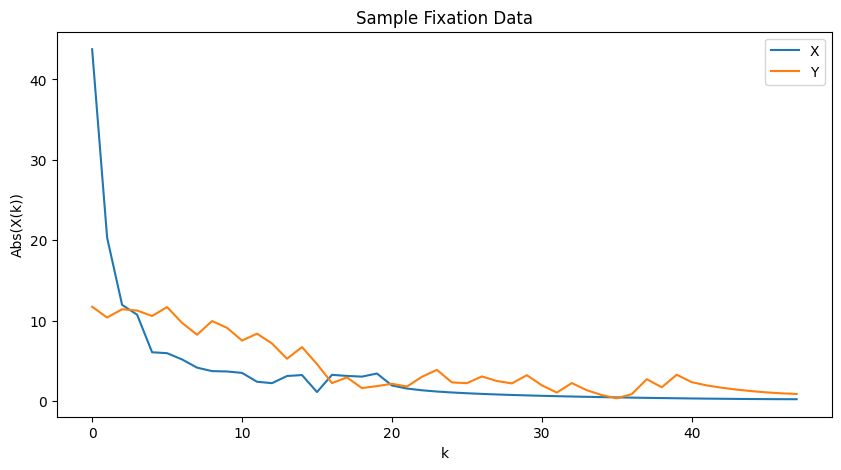

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_data[0, :, 0], label='X')
plt.plot(test_data[0, :, 1], label='Y')
plt.xlabel('k')
plt.ylabel('Abs(X(k))')
plt.title('Sample Fixation Data')
plt.legend()
plt.show()

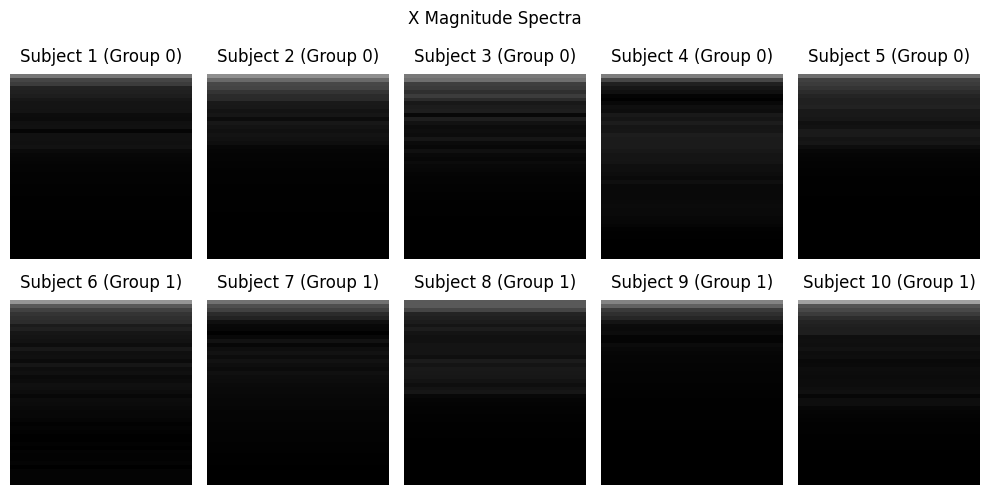

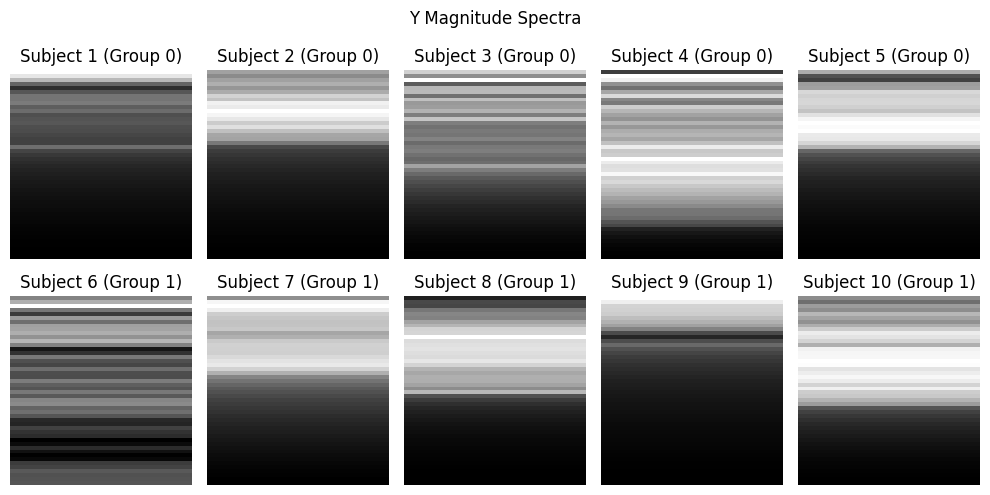

In [ ]:
def plot_group_spectra(features, labels, title, channel):
    """
    Plots magnitude spectra for 5 subjects with label 0 vs. 5 subjects with label 1
    in a vertical grayscale heatmap.
    """
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(features[labels.squeeze() == 0][i][:, channel].reshape(-1, 1), aspect='auto', cmap='gray')
        plt.title(f'Subject {i+1} (Group 0)')
        plt.axis('off')

    for i in range(5):
        plt.subplot(2, 5, i + 6)
        plt.imshow(features[labels.squeeze() == 1][i][:, channel].reshape(-1, 1), aspect='auto', cmap='gray')
        plt.title(f'Subject {i+6} (Group 1)')
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
# Plot for X and Y magnitudes
plot_group_spectra(train_data, train_labels, 'X Magnitude Spectra', channel=0)
plot_group_spectra(train_data, train_labels, 'Y Magnitude Spectra', channel=1)

In [ ]:
class CNN(nn.Module):
    def __init__(self, num_classes: int, input_channels: int = 2, input_length: int = 248,
                 hidden_fc: int = 64):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(input_channels, 8, kernel_size=3, stride=1),
            nn.BatchNorm1d(8),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(8, 16, kernel_size=3, stride=1),
            nn.BatchNorm1d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),
        )

        with torch.no_grad():
            dummy = torch.zeros(1, input_channels, input_length)
            n_flat = self.features(dummy).numel()

        self.classifier = nn.Sequential(
            nn.Linear(n_flat, hidden_fc),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_fc, num_classes)
        )

    def forward(self, x):
        if x.shape[1] != 2: 
            x = x.transpose(1, 2)
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

In [ ]:
# ---------------------
# Setup training
# ---------------------

torch.manual_seed(42)
np.random.seed(42)

accuracy = []

for i in range(5):
    # Load data
    train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
    stim=stimulus, split_size=0.1, batch_size=32, random_state=i
    )
    input_len = train_data.shape[1]
    num_epochs = 20  # Adjust as needed
    # Determine number of classes from training labels.
    # Here we assume train_labels is a tensor containing integer class labels.
    num_classes = len(torch.unique(train_labels))
    model = CNN(num_classes, input_length=input_len).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.8)
    # ---------------------
    # Training loop
    # ---------------------
    num_epochs = 20  # Adjust as needed
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for features, labels in train_loader:
            # Move data to device
            features, labels = features.to(device), labels.to(device)
            labels = labels.squeeze().long()
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * features.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        # print every 10 epochs
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # ---------------------
    # Evaluation
    # ---------------------
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in test_loader:
            # Move data to device
            features, labels = features.to(device), labels.to(device)
            labels = labels.squeeze()
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy.append(100 * correct / total)
    
print(f"Average Test Accuracy: {np.mean(accuracy):.2f}%")
print(f"Standard Deviation: {np.std(accuracy):.2f}")

Epoch 5/20, Loss: 0.6686
Epoch 10/20, Loss: 0.6554
Epoch 15/20, Loss: 0.6434
Epoch 20/20, Loss: 0.6249
Epoch 5/20, Loss: 0.6568
Epoch 10/20, Loss: 0.6414
Epoch 15/20, Loss: 0.6210
Epoch 20/20, Loss: 0.5962
Epoch 5/20, Loss: 0.6542
Epoch 10/20, Loss: 0.6222
Epoch 15/20, Loss: 0.6090
Epoch 20/20, Loss: 0.5835
Epoch 5/20, Loss: 0.6730
Epoch 10/20, Loss: 0.6413
Epoch 15/20, Loss: 0.6136
Epoch 20/20, Loss: 0.5608
Epoch 5/20, Loss: 0.6634
Epoch 10/20, Loss: 0.6420
Epoch 15/20, Loss: 0.6119
Epoch 20/20, Loss: 0.5811
Average Test Accuracy: 48.89%
Standard Deviation: 11.33


## Multiple stimuli

In [159]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct, idct
from scipy.fft import fft
import numpy as np
import torch

def get_data(stim_list, split_size, batch_size, random_state, verbose=False):
    # Filter by stimuli list and remove subjects that start with 'P'
    FixData2 = FixData[~FixData['subject'].str.startswith('P')]
    map_subj = [DyslexiaDat.subjects[sub] for sub in set_subj]
    FixData2 = FixData2[~FixData2['subject'].isin(map_subj)]
    Data = FixData2[FixData2['stimulus'].isin(stim_list)]
    subj = Data['subject'].unique()

    participant_labels = (
        Data.groupby('subject')['Group']
            .first()
            .apply(lambda v: 1 if (pd.isna(v) or v in (1.0, 2.0)) else 0)
            .loc[subj]
            .values
    )

    # Split by participants
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state, stratify=participant_labels)
    train_data = Data[Data['subject'].isin(train_participants)]
    test_data = Data[Data['subject'].isin(test_participants)]
    
    train_labels = train_data.groupby('subject')['Group'].first().values
    test_labels = test_data.groupby('subject')['Group'].first().values

    # Binary label transformation
    train_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in train_labels])
    test_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in test_labels])

    # Determine padding size
    pad = 0
    for stim in stim_list:
        max_length_train = max(len(train_data[(train_data['subject'] == subj) & (train_data['stimulus'] == stim) &
                                            ((train_data['Group'] == 1.0) | (train_data['Group'] == 2.0))]) 
                            for subj in train_participants)
        max_length_test = max(len(test_data[(test_data['subject'] == subj)  & (test_data['stimulus'] == stim) &
                                            ((test_data['Group'] == 1.0) | (test_data['Group'] == 2.0))]) 
                            for subj in test_participants)
        pad = max(pad, max_length_train, max_length_test)

    if verbose:
        print(f"Train participants: {len(train_participants)}")
        print(f"Test participants: {len(test_participants)}")
        print(f"Pad size: {pad}")
        print(f"Using stimuli: {stim_list}")

    # "Eye tracking based dyslexia detection using a holistic approach"
    # Step 1: Perform DCT Type III (and interpoalte Step 2)
    def perform_dct_interpolate(data, pad_size):
        # sqrt(2/pad_size) * cn * cos((pi * ((2*k + 1) * n)) / (2 * pad_size)) k = 0, 1, ..., pad_size - 1 n = 0, 1, ..., pad_size - 1
        dct_result = np.zeros((pad_size, data.shape[1]))
        for axis in range(data.shape[1]):
            c = dct(data[:, axis], type=3, norm='ortho')
            dct_result[:, axis] = np.pad(c, (0, pad_size-len(c)))
        return dct_result
        
    # Step 3: Perform IDCT Type III
    def perform_idct(coeffs):
        idct_result = np.zeros_like(coeffs)
        for axis in range(coeffs.shape[1]):
            idct_result[:, axis] = idct(coeffs[:, axis], type=3, norm='ortho')
        return idct_result

    # Step 4: Energy correction based on number of zeros
    def correct_energy(data, original_length):
        # Calculate the ratio of the original length to the padded length
        ratio = original_length / data.shape[0]
        return data * ratio

    # Step 5: Perform Discrete Fourier Transform (DFT)
    def perfrom_dft(data):
        return fft(data, axis=0) / data.shape[0]

    # Step 6: Magnitude calculation
    def calculate_magnitude(data):
        return np.abs(data)

    def data_output(data, pad_size):
        dct_result = perform_dct_interpolate(data, pad_size)
        idct_result = perform_idct(dct_result)
        corrected_data = correct_energy(idct_result, len(data))
        dft_result = perfrom_dft(corrected_data)
        magnitude = calculate_magnitude(dft_result)
        #for the final data we can return just N/2 as the data is symmetric
        final_data = magnitude[1:magnitude.shape[0] // 2]
        return final_data

    # Process all train/test participants
    train_features = []
    test_features = []
    len_out = pad // 2  - 1  # Adjusted to match the final output size

    for subj in train_participants:
        for stim in stim_list:
            tr = train_data[(train_data['subject'] == subj) & (train_data['stimulus'] == stim)]
            if tr.empty:
                d = np.zeros((len_out, 2))
            else:
                data = tr.iloc[:, 5:7].values
                d = data_output(data, pad)
            train_features.append(d)

    for subj in test_participants:
        for stim in stim_list:
            tr = test_data[(test_data['subject'] == subj) & (test_data['stimulus'] == stim)]
            if tr.empty:
                d = np.zeros((len_out, 2))
            else:
                data = tr.iloc[:, 5:7].values
                d = data_output(data, pad)
            test_features.append(d)

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    test_features = torch.tensor(test_features, dtype=torch.float32)
    train_labels = np.repeat(train_labels, len(stim_list))
    test_labels  = np.repeat(test_labels,  len(stim_list))

    train_labels = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
    test_labels  = torch.tensor(test_labels,  dtype=torch.float32).unsqueeze(1)

    # Shuffle the data maintaining the correspondence between features and labels
    perm_train = torch.randperm(train_features.size(0))
    train_features = train_features[perm_train]
    train_labels = train_labels[perm_train]
    perm_test = torch.randperm(test_features.size(0))
    test_features = test_features[perm_test]
    test_labels = test_labels[perm_test]

    # Create DataLoaders
    train_dataset = TensorDataset(train_features, train_labels)
    test_dataset = TensorDataset(test_features, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, test_loader, train_features, train_labels, test_features, test_labels


In [ ]:
# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load data
train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
    stim_list=list(range(1, 31)), split_size=0.1, batch_size=32, random_state=42, verbose=True
)

print(f"Train data shape: {train_data.shape}, Train labels shape: {train_labels.shape}")

In [166]:
class CNN(nn.Module):
    def __init__(self, num_classes: int, input_channels: int = 2, input_length: int = 248,
                 hidden_fc: int = 64):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(input_channels, 8, kernel_size=3, stride=1),
            nn.BatchNorm1d(8),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(8, 16, kernel_size=3, stride=1),
            nn.BatchNorm1d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),
        )

        with torch.no_grad():
            dummy = torch.zeros(1, input_channels, input_length)
            n_flat = self.features(dummy).numel()

        self.classifier = nn.Sequential(
            nn.Linear(n_flat, hidden_fc),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_fc, num_classes)
        )

    def forward(self, x):
        if x.shape[1] != 2: 
            x = x.transpose(1, 2)
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

In [167]:
# ---------------------
# Setup training
# ---------------------

torch.manual_seed(42)
np.random.seed(42)

def train_test(batch_size=64, momentum=1, lr=0.01):
    torch.manual_seed(42)
    np.random.seed(42)

    accuracy = []

    for i in range(5):
        # Load data
        train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
            stim_list=list(range(1, 31)), split_size=0.1, batch_size=batch_size, random_state=i
        )
        input_len = train_data.shape[1]
        num_classes = len(torch.unique(train_labels))
        model = CNN(num_classes, input_length=input_len).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
        # ---------------------
        # Training loop
        # ---------------------
        num_epochs = 50
        for epoch in range(num_epochs):
            model.train()
            running_loss = 0.0
            for features, labels in train_loader:
                # Move data to device
                features, labels = features.to(device), labels.to(device)
                labels = labels.squeeze().long()
                optimizer.zero_grad()
                outputs = model(features)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item() * features.size(0)
            
            epoch_loss = running_loss / len(train_loader.dataset)
            # print every 10 epochs
            if (epoch + 1) % 5 == 0:
                print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

        # ---------------------
        # Evaluation
        # ---------------------
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for features, labels in test_loader:
                # Move data to device
                features, labels = features.to(device), labels.to(device)
                labels = labels.squeeze()
                outputs = model(features)
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        accuracy.append(100 * correct / total)
        
    print(f"Average Test Accuracy: {np.mean(accuracy):.2f}%")
    print(f"Standard Deviation: {np.std(accuracy):.2f}")

In [168]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.01)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.01)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.01)

Batch size: 16
Epoch 5/50, Loss: 0.8137
Epoch 10/50, Loss: 1.1235
Epoch 15/50, Loss: 2.0736
Epoch 20/50, Loss: 1.9134
Epoch 25/50, Loss: 2.2174
Epoch 30/50, Loss: 1.7651
Epoch 35/50, Loss: 1.6805
Epoch 40/50, Loss: 1.5913
Epoch 45/50, Loss: 1.4020
Epoch 50/50, Loss: 1.5553
Epoch 5/50, Loss: 0.7198
Epoch 10/50, Loss: 0.7264
Epoch 15/50, Loss: 0.7623
Epoch 20/50, Loss: 0.7941
Epoch 25/50, Loss: 0.7623
Epoch 30/50, Loss: 0.7068
Epoch 35/50, Loss: 0.6935
Epoch 40/50, Loss: 0.7519
Epoch 45/50, Loss: 0.7509
Epoch 50/50, Loss: 0.8208
Epoch 5/50, Loss: 0.7845
Epoch 10/50, Loss: 0.7258
Epoch 15/50, Loss: 0.8165
Epoch 20/50, Loss: 0.7281
Epoch 25/50, Loss: 0.7543
Epoch 30/50, Loss: 0.9457
Epoch 35/50, Loss: 1.4509
Epoch 40/50, Loss: 1.4456
Epoch 45/50, Loss: 1.3782
Epoch 50/50, Loss: 1.4220
Epoch 5/50, Loss: 0.6927
Epoch 10/50, Loss: 0.6927
Epoch 15/50, Loss: 0.7242
Epoch 20/50, Loss: 0.7174
Epoch 25/50, Loss: 0.8945
Epoch 30/50, Loss: 0.9532
Epoch 35/50, Loss: 1.1789
Epoch 40/50, Loss: 3.1907
E

In [169]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.01, momentum=0.5)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.01, momentum=0.5)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.01, momentum=0.5)

Batch size: 16
Epoch 5/50, Loss: 0.6719
Epoch 10/50, Loss: 0.6646
Epoch 15/50, Loss: 0.6663
Epoch 20/50, Loss: 0.6542
Epoch 25/50, Loss: 0.6424
Epoch 30/50, Loss: 0.6353
Epoch 35/50, Loss: 0.6219
Epoch 40/50, Loss: 0.6174
Epoch 45/50, Loss: 0.5969
Epoch 50/50, Loss: 0.5833
Epoch 5/50, Loss: 0.6688
Epoch 10/50, Loss: 0.6554
Epoch 15/50, Loss: 0.6462
Epoch 20/50, Loss: 0.6315
Epoch 25/50, Loss: 0.6199
Epoch 30/50, Loss: 0.6009
Epoch 35/50, Loss: 0.5860
Epoch 40/50, Loss: 0.5658
Epoch 45/50, Loss: 0.5503
Epoch 50/50, Loss: 0.5209
Epoch 5/50, Loss: 0.6678
Epoch 10/50, Loss: 0.6578
Epoch 15/50, Loss: 0.6502
Epoch 20/50, Loss: 0.6419
Epoch 25/50, Loss: 0.6312
Epoch 30/50, Loss: 0.6191
Epoch 35/50, Loss: 0.6088
Epoch 40/50, Loss: 0.5939
Epoch 45/50, Loss: 0.5804
Epoch 50/50, Loss: 0.5694
Epoch 5/50, Loss: 0.6757
Epoch 10/50, Loss: 0.6682
Epoch 15/50, Loss: 0.6558
Epoch 20/50, Loss: 0.6456
Epoch 25/50, Loss: 0.6382
Epoch 30/50, Loss: 0.6300
Epoch 35/50, Loss: 0.6161
Epoch 40/50, Loss: 0.6059
E

In [170]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.1)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.1)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.1)

Batch size: 16
Epoch 5/50, Loss: 0.7250
Epoch 10/50, Loss: 3.3081
Epoch 15/50, Loss: 4.5152
Epoch 20/50, Loss: 1.7555
Epoch 25/50, Loss: 2.7835
Epoch 30/50, Loss: 2.9743
Epoch 35/50, Loss: 0.9150
Epoch 40/50, Loss: 1.0258
Epoch 45/50, Loss: 1.1951
Epoch 50/50, Loss: 0.9674
Epoch 5/50, Loss: 0.9182
Epoch 10/50, Loss: 1.3598
Epoch 15/50, Loss: 1.7237
Epoch 20/50, Loss: 1.1935
Epoch 25/50, Loss: 3.9332
Epoch 30/50, Loss: 6.6103
Epoch 35/50, Loss: 6.7961
Epoch 40/50, Loss: 6.9620
Epoch 45/50, Loss: 5.1700
Epoch 50/50, Loss: 2.9275
Epoch 5/50, Loss: 0.9833
Epoch 10/50, Loss: 1.3199
Epoch 15/50, Loss: 1.0696
Epoch 20/50, Loss: 1.7680
Epoch 25/50, Loss: 2.0133
Epoch 30/50, Loss: 3.0433
Epoch 35/50, Loss: 4.1117
Epoch 40/50, Loss: 2.7027
Epoch 45/50, Loss: 0.8639
Epoch 50/50, Loss: 0.7761
Epoch 5/50, Loss: 2.6901
Epoch 10/50, Loss: 2.3844
Epoch 15/50, Loss: 3.1472
Epoch 20/50, Loss: 5.8184
Epoch 25/50, Loss: 4.9591
Epoch 30/50, Loss: 4.4006
Epoch 35/50, Loss: 2.1127
Epoch 40/50, Loss: 1.4268
E

In [171]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.1, momentum=0.5)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.1, momentum=0.5)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.1, momentum=0.5)

Batch size: 16
Epoch 5/50, Loss: 0.6814
Epoch 10/50, Loss: 0.6732
Epoch 15/50, Loss: 0.6775
Epoch 20/50, Loss: 0.6673
Epoch 25/50, Loss: 0.6606
Epoch 30/50, Loss: 0.6426
Epoch 35/50, Loss: 0.6301
Epoch 40/50, Loss: 0.6204
Epoch 45/50, Loss: 0.6138
Epoch 50/50, Loss: 0.5680
Epoch 5/50, Loss: 0.6791
Epoch 10/50, Loss: 0.6701
Epoch 15/50, Loss: 0.6590
Epoch 20/50, Loss: 0.6443
Epoch 25/50, Loss: 0.6172
Epoch 30/50, Loss: 0.6099
Epoch 35/50, Loss: 0.5924
Epoch 40/50, Loss: 0.5769
Epoch 45/50, Loss: 0.5366
Epoch 50/50, Loss: 0.5439
Epoch 5/50, Loss: 0.6711
Epoch 10/50, Loss: 0.6607
Epoch 15/50, Loss: 0.6549
Epoch 20/50, Loss: 0.6374
Epoch 25/50, Loss: 0.6272
Epoch 30/50, Loss: 0.6085
Epoch 35/50, Loss: 0.5833
Epoch 40/50, Loss: 0.5575
Epoch 45/50, Loss: 0.5331
Epoch 50/50, Loss: 0.5112
Epoch 5/50, Loss: 0.6829
Epoch 10/50, Loss: 0.6793
Epoch 15/50, Loss: 0.6726
Epoch 20/50, Loss: 0.6658
Epoch 25/50, Loss: 0.6618
Epoch 30/50, Loss: 0.6503
Epoch 35/50, Loss: 0.6310
Epoch 40/50, Loss: 0.6155
E

In [172]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self,
                 num_classes: int,
                 input_channels: int = 2,
                 input_length:   int = 248,
                 hidden_fc:      int = 64):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(input_channels, 8,  kernel_size=3, stride=1),
            nn.BatchNorm1d(8),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(8, 16, kernel_size=3, stride=1),
            nn.BatchNorm1d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(16, 32, kernel_size=3, stride=1),
            nn.BatchNorm1d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),
        )

        with torch.no_grad():
            dummy = torch.zeros(1, input_channels, input_length)
            n_flat = self.features(dummy).numel()

        self.classifier = nn.Sequential(
            nn.Linear(n_flat, hidden_fc),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_fc, num_classes)
        )

    # --------------------------------------
    def forward(self, x):
        if x.dim() == 3 and x.size(1) != 2:
            x = x.transpose(1, 2)

        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


In [173]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.01)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.01)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.01)

Batch size: 16
Epoch 5/50, Loss: 0.7946
Epoch 10/50, Loss: 0.8966
Epoch 15/50, Loss: 0.7336
Epoch 20/50, Loss: 0.9489
Epoch 25/50, Loss: 0.8801
Epoch 30/50, Loss: 0.8962
Epoch 35/50, Loss: 0.8161
Epoch 40/50, Loss: 1.0462
Epoch 45/50, Loss: 0.9985
Epoch 50/50, Loss: 0.7694
Epoch 5/50, Loss: 0.7317
Epoch 10/50, Loss: 0.8338
Epoch 15/50, Loss: 0.9977
Epoch 20/50, Loss: 1.0052
Epoch 25/50, Loss: 1.0465
Epoch 30/50, Loss: 0.8223
Epoch 35/50, Loss: 0.8114
Epoch 40/50, Loss: 0.8311
Epoch 45/50, Loss: 0.8017
Epoch 50/50, Loss: 0.9367
Epoch 5/50, Loss: 0.6941
Epoch 10/50, Loss: 0.7392
Epoch 15/50, Loss: 0.7260
Epoch 20/50, Loss: 0.7305
Epoch 25/50, Loss: 0.7233
Epoch 30/50, Loss: 0.7370
Epoch 35/50, Loss: 0.8884
Epoch 40/50, Loss: 0.8559
Epoch 45/50, Loss: 0.7559
Epoch 50/50, Loss: 0.7409
Epoch 5/50, Loss: 0.6903
Epoch 10/50, Loss: 0.7212
Epoch 15/50, Loss: 0.9333
Epoch 20/50, Loss: 0.9930
Epoch 25/50, Loss: 1.1606
Epoch 30/50, Loss: 1.9229
Epoch 35/50, Loss: 2.1624
Epoch 40/50, Loss: 2.2117
E

In [174]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.01, momentum=0.5)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.01, momentum=0.5)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.01, momentum=0.5)

Batch size: 16
Epoch 5/50, Loss: 0.6688
Epoch 10/50, Loss: 0.6563
Epoch 15/50, Loss: 0.6502
Epoch 20/50, Loss: 0.6340
Epoch 25/50, Loss: 0.6203
Epoch 30/50, Loss: 0.6088
Epoch 35/50, Loss: 0.5964
Epoch 40/50, Loss: 0.5805
Epoch 45/50, Loss: 0.5548
Epoch 50/50, Loss: 0.5482
Epoch 5/50, Loss: 0.6631
Epoch 10/50, Loss: 0.6520
Epoch 15/50, Loss: 0.6434
Epoch 20/50, Loss: 0.6194
Epoch 25/50, Loss: 0.6086
Epoch 30/50, Loss: 0.5949
Epoch 35/50, Loss: 0.5697
Epoch 40/50, Loss: 0.5686
Epoch 45/50, Loss: 0.5332
Epoch 50/50, Loss: 0.5290
Epoch 5/50, Loss: 0.6649
Epoch 10/50, Loss: 0.6496
Epoch 15/50, Loss: 0.6388
Epoch 20/50, Loss: 0.6269
Epoch 25/50, Loss: 0.6115
Epoch 30/50, Loss: 0.5993
Epoch 35/50, Loss: 0.5779
Epoch 40/50, Loss: 0.5633
Epoch 45/50, Loss: 0.5496
Epoch 50/50, Loss: 0.5215
Epoch 5/50, Loss: 0.6711
Epoch 10/50, Loss: 0.6635
Epoch 15/50, Loss: 0.6545
Epoch 20/50, Loss: 0.6430
Epoch 25/50, Loss: 0.6330
Epoch 30/50, Loss: 0.6187
Epoch 35/50, Loss: 0.6055
Epoch 40/50, Loss: 0.5969
E

In [175]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.1)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.1)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.1)

Batch size: 16
Epoch 5/50, Loss: 1.2745
Epoch 10/50, Loss: 0.9633
Epoch 15/50, Loss: 0.9401
Epoch 20/50, Loss: 0.7280
Epoch 25/50, Loss: 0.9700
Epoch 30/50, Loss: 2.1309
Epoch 35/50, Loss: 4.6682
Epoch 40/50, Loss: 3.0760
Epoch 45/50, Loss: 4.9575
Epoch 50/50, Loss: 11.2038
Epoch 5/50, Loss: 0.7968
Epoch 10/50, Loss: 1.3541
Epoch 15/50, Loss: 0.7339
Epoch 20/50, Loss: 1.9216
Epoch 25/50, Loss: 2.3298
Epoch 30/50, Loss: 2.3368
Epoch 35/50, Loss: 1.5152
Epoch 40/50, Loss: 1.4166
Epoch 45/50, Loss: 3.2566
Epoch 50/50, Loss: 7.8749
Epoch 5/50, Loss: 1.0044
Epoch 10/50, Loss: 1.7646
Epoch 15/50, Loss: 5.6920
Epoch 20/50, Loss: 3.5837
Epoch 25/50, Loss: 2.6689
Epoch 30/50, Loss: 2.0989
Epoch 35/50, Loss: 2.3575
Epoch 40/50, Loss: 2.4226
Epoch 45/50, Loss: 3.6251
Epoch 50/50, Loss: 6.4578
Epoch 5/50, Loss: 0.7077
Epoch 10/50, Loss: 1.1589
Epoch 15/50, Loss: 1.3902
Epoch 20/50, Loss: 2.4294
Epoch 25/50, Loss: 1.5012
Epoch 30/50, Loss: 3.6278
Epoch 35/50, Loss: 4.2947
Epoch 40/50, Loss: 8.1126


In [176]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.1, momentum=0.5)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.1, momentum=0.5)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.1, momentum=0.5)

Batch size: 16
Epoch 5/50, Loss: 0.6786
Epoch 10/50, Loss: 0.6733
Epoch 15/50, Loss: 0.6675
Epoch 20/50, Loss: 0.6533
Epoch 25/50, Loss: 0.6350
Epoch 30/50, Loss: 0.6352
Epoch 35/50, Loss: 0.6141
Epoch 40/50, Loss: 0.6069
Epoch 45/50, Loss: 0.5907
Epoch 50/50, Loss: 0.5905
Epoch 5/50, Loss: 0.6773
Epoch 10/50, Loss: 0.6680
Epoch 15/50, Loss: 0.6676
Epoch 20/50, Loss: 0.6474
Epoch 25/50, Loss: 0.6326
Epoch 30/50, Loss: 0.6236
Epoch 35/50, Loss: 0.6033
Epoch 40/50, Loss: 0.5776
Epoch 45/50, Loss: 0.5648
Epoch 50/50, Loss: 0.5541
Epoch 5/50, Loss: 0.6715
Epoch 10/50, Loss: 0.6634
Epoch 15/50, Loss: 0.6520
Epoch 20/50, Loss: 0.6448
Epoch 25/50, Loss: 0.6340
Epoch 30/50, Loss: 0.6239
Epoch 35/50, Loss: 0.6152
Epoch 40/50, Loss: 0.5887
Epoch 45/50, Loss: 0.5741
Epoch 50/50, Loss: 0.5600
Epoch 5/50, Loss: 0.6838
Epoch 10/50, Loss: 0.6814
Epoch 15/50, Loss: 0.6787
Epoch 20/50, Loss: 0.6675
Epoch 25/50, Loss: 0.6589
Epoch 30/50, Loss: 0.6552
Epoch 35/50, Loss: 0.6427
Epoch 40/50, Loss: 0.6408
E

In [177]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self,
                 num_classes:   int,
                 input_channels:int = 2,
                 input_length:  int = 248,
                 hidden_fc:     int = 64):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(input_channels,  8, kernel_size=3, stride=1),
            nn.BatchNorm1d(8),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(8, 16, kernel_size=3, stride=1),
            nn.BatchNorm1d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(16, 32, kernel_size=3, stride=1),
            nn.BatchNorm1d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(32, 64, kernel_size=3, stride=1),
            nn.BatchNorm1d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=2),
        )

        with torch.no_grad():
            dummy = torch.zeros(1, input_channels, input_length)
            n_flat = self.features(dummy).numel()

        self.classifier = nn.Sequential(
            nn.Linear(n_flat, hidden_fc),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_fc, num_classes) 
        )

    def forward(self, x):
        if x.dim() == 3 and x.size(1) != 2:
            x = x.transpose(1, 2)

        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

In [178]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.01)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.01)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.01)

Batch size: 16
Epoch 5/50, Loss: 0.7280
Epoch 10/50, Loss: 0.8640
Epoch 15/50, Loss: 1.0021
Epoch 20/50, Loss: 1.2484
Epoch 25/50, Loss: 1.5919
Epoch 30/50, Loss: 1.8220
Epoch 35/50, Loss: 1.9447
Epoch 40/50, Loss: 1.9428
Epoch 45/50, Loss: 2.8010
Epoch 50/50, Loss: 2.8895
Epoch 5/50, Loss: 0.6997
Epoch 10/50, Loss: 0.7130
Epoch 15/50, Loss: 0.7350
Epoch 20/50, Loss: 0.8086
Epoch 25/50, Loss: 1.1280
Epoch 30/50, Loss: 1.1230
Epoch 35/50, Loss: 1.2402
Epoch 40/50, Loss: 1.0511
Epoch 45/50, Loss: 1.1148
Epoch 50/50, Loss: 0.9888
Epoch 5/50, Loss: 0.8158
Epoch 10/50, Loss: 0.7573
Epoch 15/50, Loss: 0.8134
Epoch 20/50, Loss: 0.9631
Epoch 25/50, Loss: 0.9636
Epoch 30/50, Loss: 1.4800
Epoch 35/50, Loss: 1.8189
Epoch 40/50, Loss: 2.1563
Epoch 45/50, Loss: 2.6508
Epoch 50/50, Loss: 2.9387
Epoch 5/50, Loss: 0.6960
Epoch 10/50, Loss: 0.8256
Epoch 15/50, Loss: 0.7993
Epoch 20/50, Loss: 0.8284
Epoch 25/50, Loss: 0.9791
Epoch 30/50, Loss: 1.4838
Epoch 35/50, Loss: 1.3958
Epoch 40/50, Loss: 1.5080
E

In [179]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.01, momentum=0.5)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.01, momentum=0.5)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.01, momentum=0.5)

Batch size: 16
Epoch 5/50, Loss: 0.6656
Epoch 10/50, Loss: 0.6526
Epoch 15/50, Loss: 0.6332
Epoch 20/50, Loss: 0.6226
Epoch 25/50, Loss: 0.6149
Epoch 30/50, Loss: 0.5836
Epoch 35/50, Loss: 0.5841
Epoch 40/50, Loss: 0.5604
Epoch 45/50, Loss: 0.5287
Epoch 50/50, Loss: 0.6039
Epoch 5/50, Loss: 0.6612
Epoch 10/50, Loss: 0.6451
Epoch 15/50, Loss: 0.6623
Epoch 20/50, Loss: 0.6137
Epoch 25/50, Loss: 0.5959
Epoch 30/50, Loss: 0.5752
Epoch 35/50, Loss: 0.5365
Epoch 40/50, Loss: 0.5108
Epoch 45/50, Loss: 0.6549
Epoch 50/50, Loss: 0.4906
Epoch 5/50, Loss: 0.6644
Epoch 10/50, Loss: 0.6479
Epoch 15/50, Loss: 0.6543
Epoch 20/50, Loss: 0.6320
Epoch 25/50, Loss: 0.6257
Epoch 30/50, Loss: 0.6021
Epoch 35/50, Loss: 0.5746
Epoch 40/50, Loss: 0.5464
Epoch 45/50, Loss: 0.5319
Epoch 50/50, Loss: 0.5101
Epoch 5/50, Loss: 0.6709
Epoch 10/50, Loss: 0.6618
Epoch 15/50, Loss: 0.6564
Epoch 20/50, Loss: 0.6472
Epoch 25/50, Loss: 0.6187
Epoch 30/50, Loss: 0.6002
Epoch 35/50, Loss: 0.5956
Epoch 40/50, Loss: 0.5641
E

In [180]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.1)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.1)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.1)

Batch size: 16
Epoch 5/50, Loss: 0.9449
Epoch 10/50, Loss: 2.1649
Epoch 15/50, Loss: 2.9640
Epoch 20/50, Loss: 2.2090
Epoch 25/50, Loss: 2.6764
Epoch 30/50, Loss: 1.5313
Epoch 35/50, Loss: 1.1699
Epoch 40/50, Loss: 1.0965
Epoch 45/50, Loss: 1.7229
Epoch 50/50, Loss: 0.8683
Epoch 5/50, Loss: 1.4443
Epoch 10/50, Loss: 1.3144
Epoch 15/50, Loss: 4.1782
Epoch 20/50, Loss: 6.6195
Epoch 25/50, Loss: 5.5277
Epoch 30/50, Loss: 10.0196
Epoch 35/50, Loss: 10.4886
Epoch 40/50, Loss: 16.4589
Epoch 45/50, Loss: 14.0533
Epoch 50/50, Loss: 16.5332
Epoch 5/50, Loss: 1.0778
Epoch 10/50, Loss: 1.2637
Epoch 15/50, Loss: 2.5910
Epoch 20/50, Loss: 9.8218
Epoch 25/50, Loss: 10.5651
Epoch 30/50, Loss: 13.5254
Epoch 35/50, Loss: 13.4035
Epoch 40/50, Loss: 12.1390
Epoch 45/50, Loss: 14.5434
Epoch 50/50, Loss: 15.9358
Epoch 5/50, Loss: 0.7613
Epoch 10/50, Loss: 1.1606
Epoch 15/50, Loss: 3.7433
Epoch 20/50, Loss: 3.4173
Epoch 25/50, Loss: 4.4518
Epoch 30/50, Loss: 3.9018
Epoch 35/50, Loss: 5.6124
Epoch 40/50, Los

In [181]:
print(f"Batch size: 16")
train_test(batch_size=16, lr=0.1, momentum=0.5)
print(f"Batch size: 64")
train_test(batch_size=64, lr=0.1, momentum=0.5)
print(f"Batch size: 128")
train_test(batch_size=128, lr=0.1, momentum=0.5)

Batch size: 16
Epoch 5/50, Loss: 0.6786
Epoch 10/50, Loss: 0.6708
Epoch 15/50, Loss: 0.6664
Epoch 20/50, Loss: 0.6578
Epoch 25/50, Loss: 0.6466
Epoch 30/50, Loss: 0.6402
Epoch 35/50, Loss: 0.6340
Epoch 40/50, Loss: 0.6255
Epoch 45/50, Loss: 0.6225
Epoch 50/50, Loss: 0.6116
Epoch 5/50, Loss: 0.6744
Epoch 10/50, Loss: 0.6675
Epoch 15/50, Loss: 0.6589
Epoch 20/50, Loss: 0.6533
Epoch 25/50, Loss: 0.6420
Epoch 30/50, Loss: 0.6248
Epoch 35/50, Loss: 0.6089
Epoch 40/50, Loss: 0.5963
Epoch 45/50, Loss: 0.5882
Epoch 50/50, Loss: 0.5589
Epoch 5/50, Loss: 0.6766
Epoch 10/50, Loss: 0.6689
Epoch 15/50, Loss: 0.6719
Epoch 20/50, Loss: 0.6653
Epoch 25/50, Loss: 0.6606
Epoch 30/50, Loss: 0.6573
Epoch 35/50, Loss: 0.6442
Epoch 40/50, Loss: 0.6378
Epoch 45/50, Loss: 0.6274
Epoch 50/50, Loss: 0.6158
Epoch 5/50, Loss: 0.6823
Epoch 10/50, Loss: 0.6762
Epoch 15/50, Loss: 0.6747
Epoch 20/50, Loss: 0.6658
Epoch 25/50, Loss: 0.6624
Epoch 30/50, Loss: 0.6507
Epoch 35/50, Loss: 0.6435
Epoch 40/50, Loss: 0.6337
E

---

## HMM

In [598]:
map_subj = [DyslexiaDat.subjects[sub] for sub in set_subj]

In [599]:
FixData2 = FixData[~FixData['subject'].str.startswith('P')]
FixData2 = FixData2[~FixData2['subject'].isin(map_subj)]

In [600]:
FixData2['Group'] = FixData2['Group'].replace(4.0, 0)
FixData2['Group'] = FixData2['Group'].replace(3.0, 0)
FixData2['Group'] = FixData2['Group'].replace(np.nan, 0)

FixData2['Group'] = FixData2['Group'].replace(1.0, 1)
FixData2['Group'] = FixData2['Group'].replace(2.0, 1)

In [601]:
from scipy import stats

def remove_outliers_zscore(df, x_col='fix_x', y_col='fix_y', stimulus_col='stimulus', threshold=3):
    """
    Remove outliers using Z-score method for each stimulus
    """
    def filter_outliers_zscore(group):
        # Calculate z-scores
        z_scores_x = np.abs(stats.zscore(group[x_col]))
        z_scores_y = np.abs(stats.zscore(group[y_col]))
        
        # Keep points where both x and y z-scores are below threshold
        mask = (z_scores_x < threshold) & (z_scores_y < threshold)
        
        return group[mask]
    
    return df.groupby(stimulus_col).apply(filter_outliers_zscore).reset_index(drop=True)

FixData2 = remove_outliers_zscore(FixData2, x_col='fix_x', y_col='fix_y', stimulus_col='stimulus', threshold=4.1)

C:\Users\nickp\AppData\Local\Temp\ipykernel_4908\419395677.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(stimulus_col).apply(filter_outliers_zscore).reset_index(drop=True)


In [602]:
DyslexiaDat2=EyeData(FixData2,sizeX,sizeY)
DyslexiaDat2.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')

dataset size:  (113494, 12)
presentation size:  x= 1920 pixels y= 1080  pixels
presentation size:  x= 1920 pixels y= 1080  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 88 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  88 observers and  36  stimuli.


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:280: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  35.83  +/-  9.37
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  3168
Mean X location:  543.8  +/-  17.2  pixels
Mean Y location:  511.0  +/-  11.1  pixels
Mean saccade  amplitude:  80.5  +/-  15.7  pixels
Mean scanpath  length:  2410.2  +/-  323.4  pixels


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_visuals.py:170: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


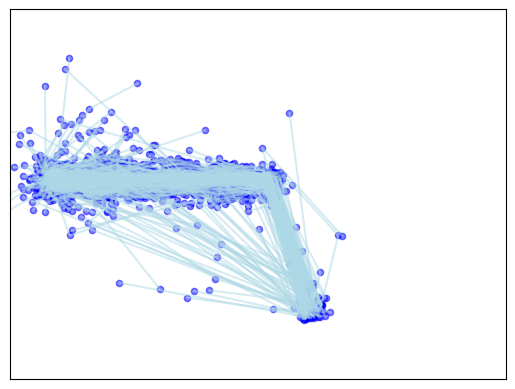

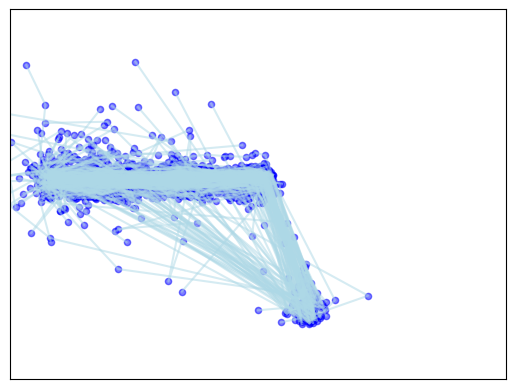

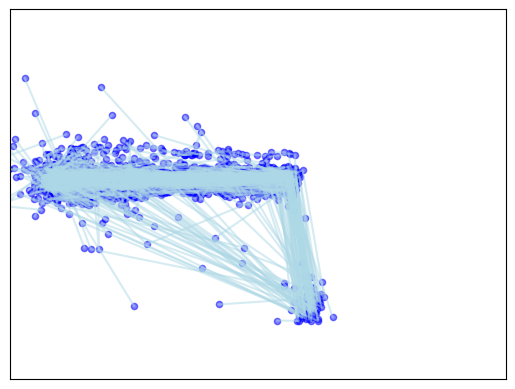

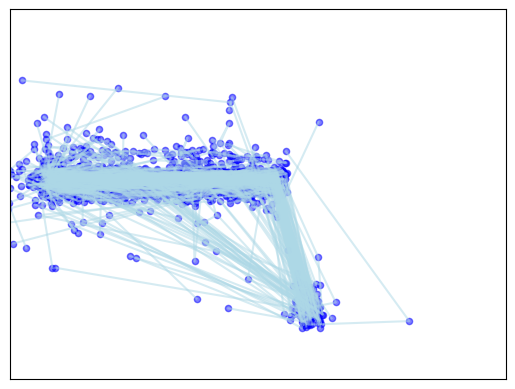

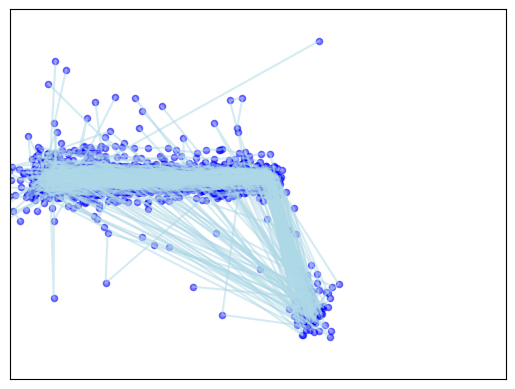

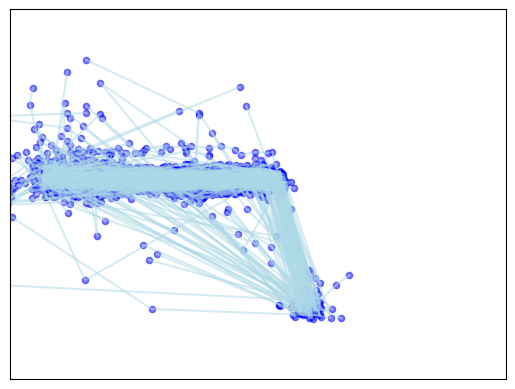

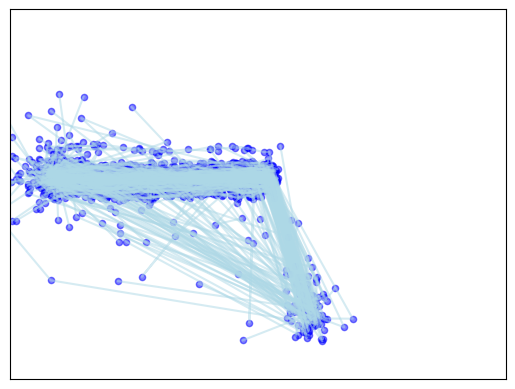

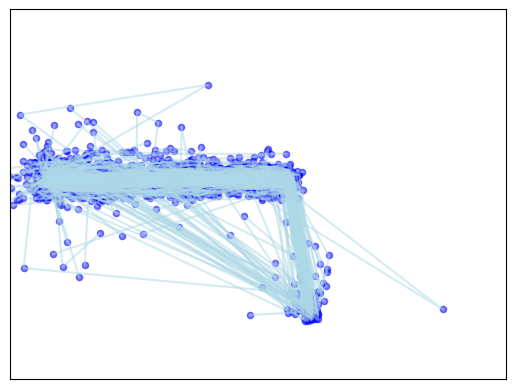

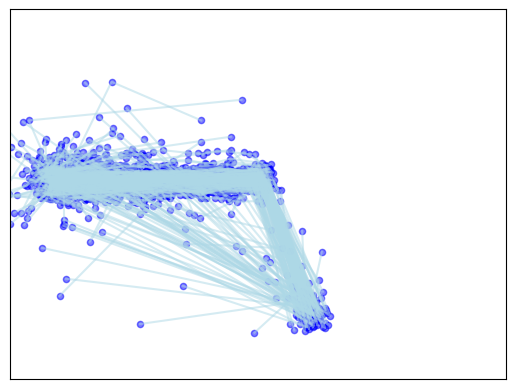

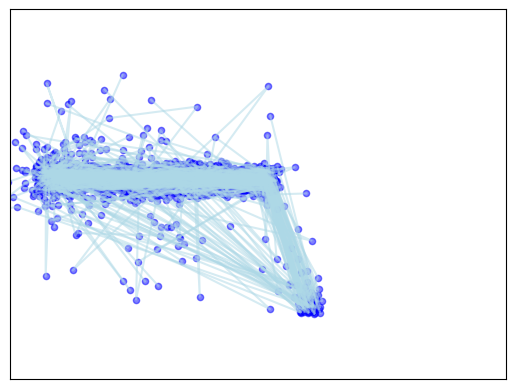

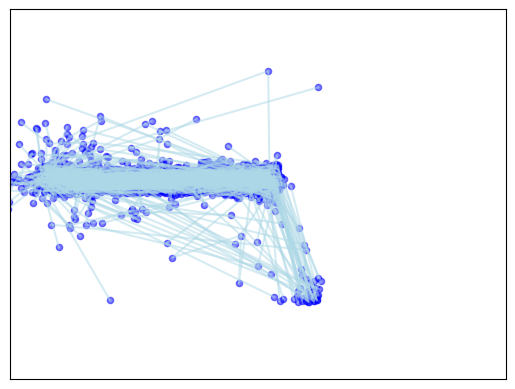

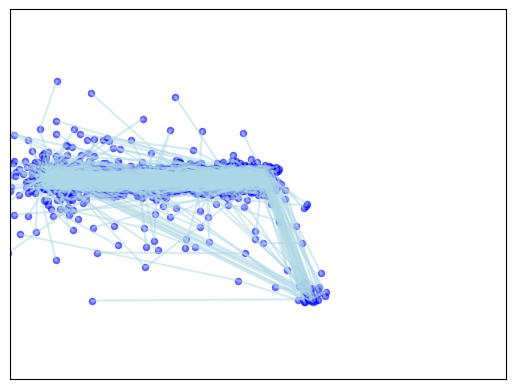

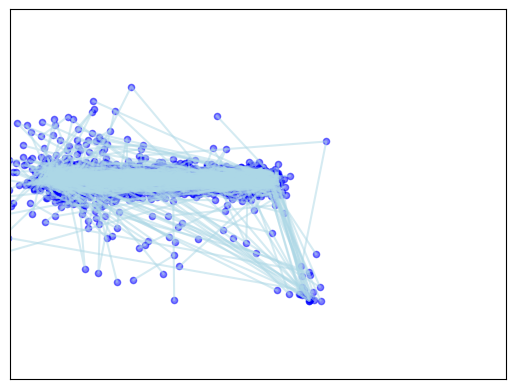

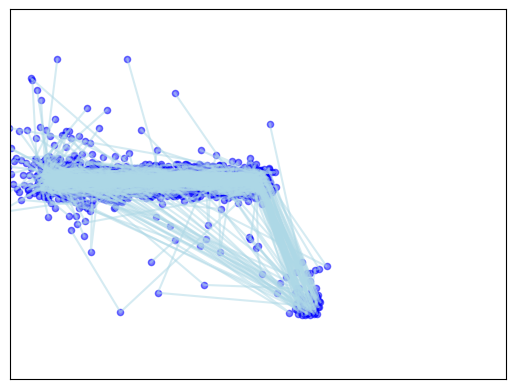

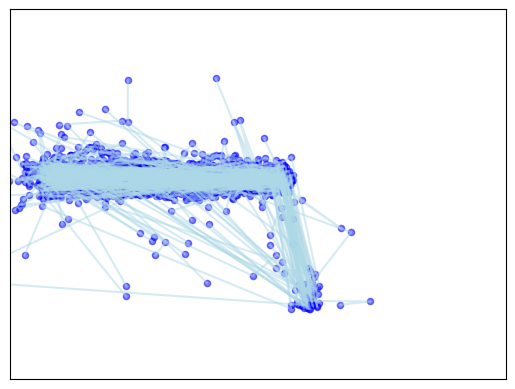

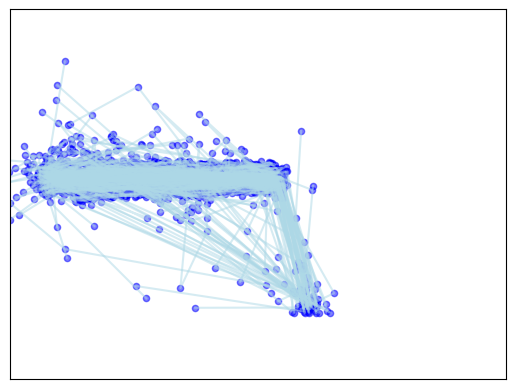

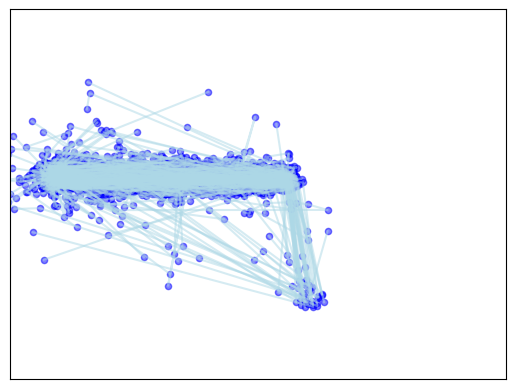

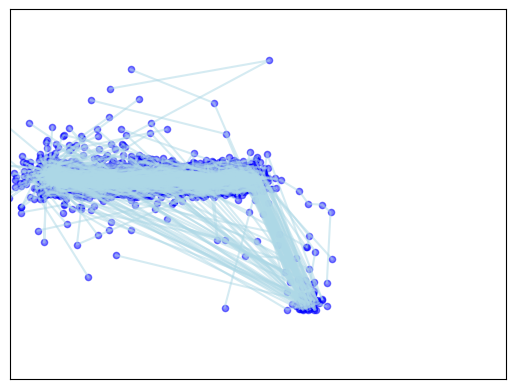

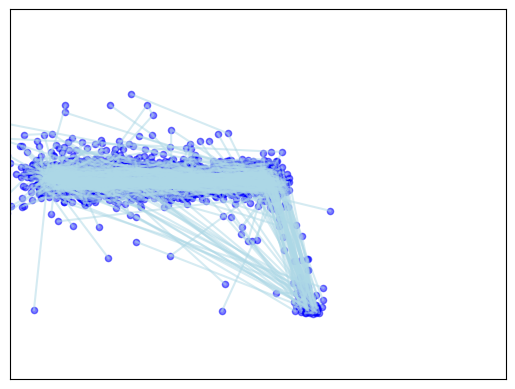

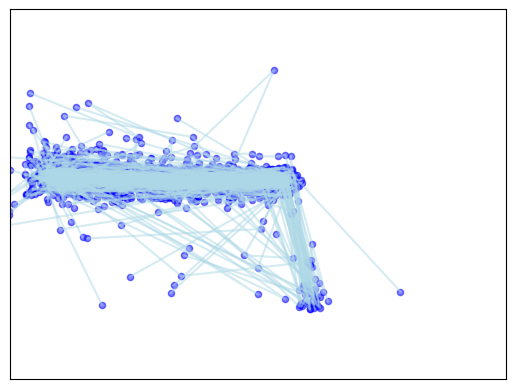

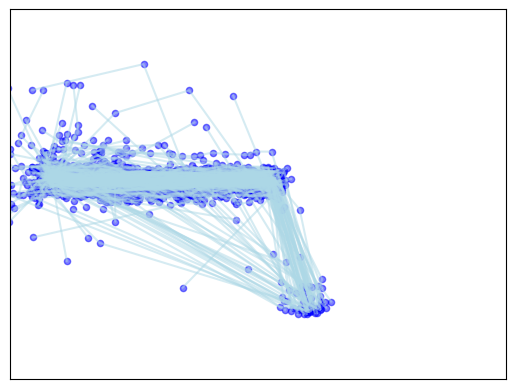

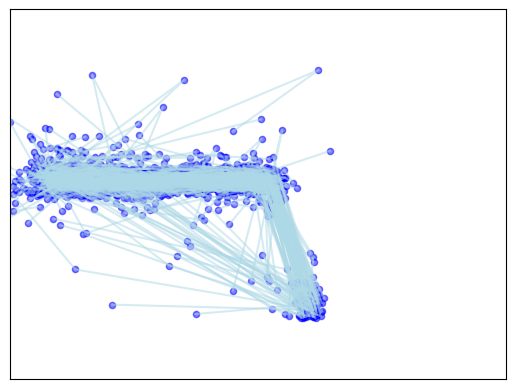

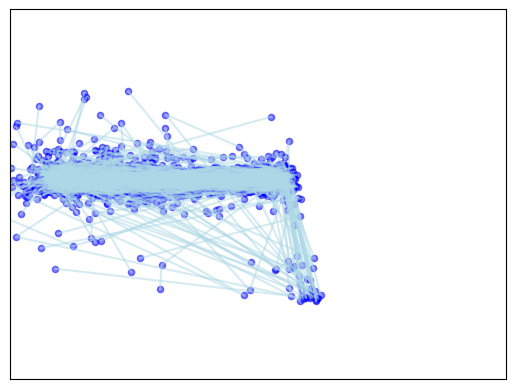

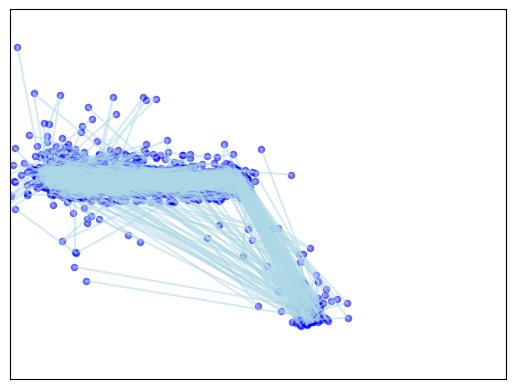

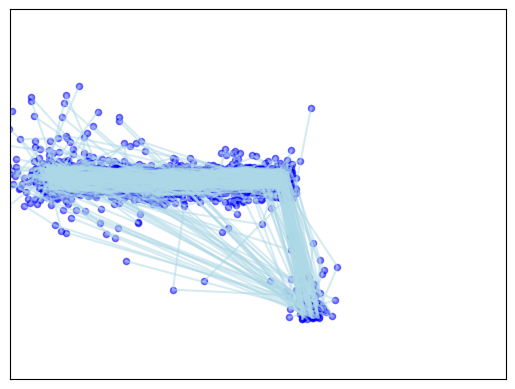

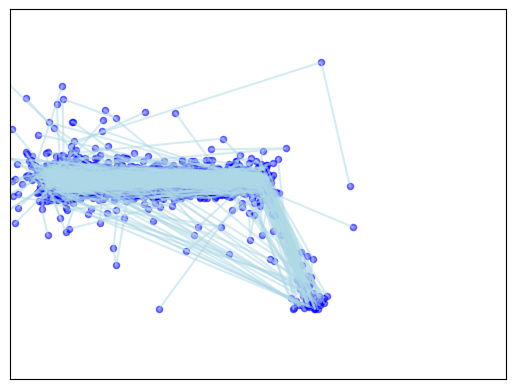

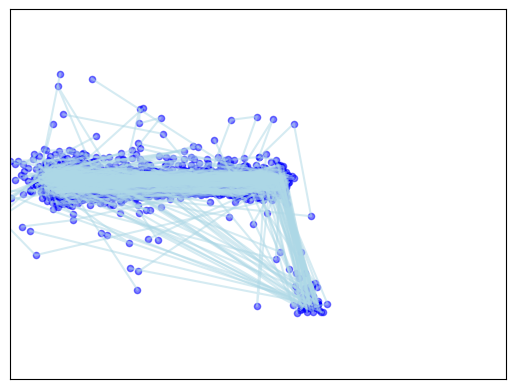

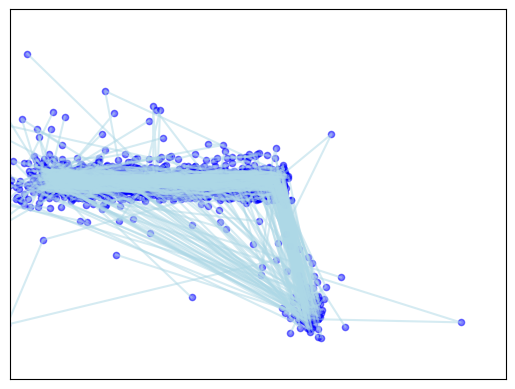

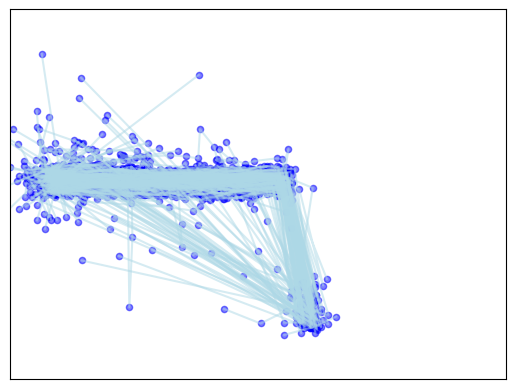

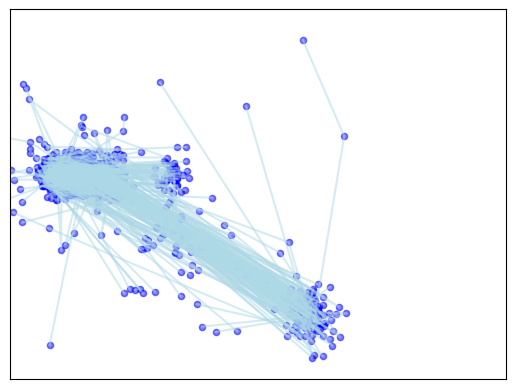

In [603]:
for i in range(1, 31):
    DyslexiaDat2.VisScanPath(i, visFix=True, scan_path_col='lightblue', allS=True)

In [612]:
WhichC, WhichCN = DyslexiaDat2.GetGroups('Group')

Conditions [0. 1.]


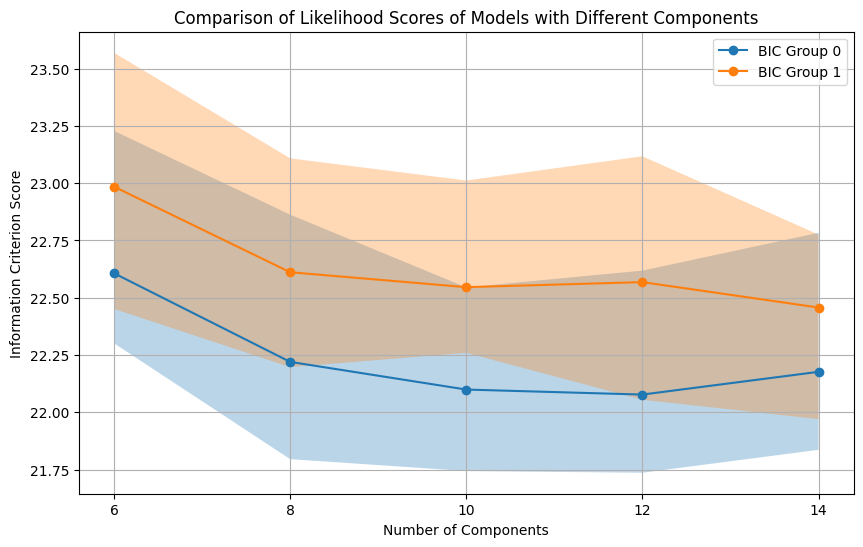

In [87]:
results = DyslexiaDat2.models_pipeline(13, [6,8,10,12,14], group=[0,1], starting_tests=20, only_starting=True, only_bic=True, covariance_type='tied')

Since the number of words (for mostly of the stimuli) is 10 we can use a HMM with 10 states + 2 one for the first fixation point (that could result not immediatly at the begininning of the text) and one for the last fixation.

Following we will test the performance for a range around 12 states.

In [613]:
tot_subj = DyslexiaDat2.subjects

In [89]:
# Ensure balanced classes in train and test sets
train_participants, test_participants = train_test_split(
    tot_subj, 
    test_size=0.1, 
    random_state=42, 
    stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
)

# Generate labels for train and test sets
train_labels = np.array([WhichCN[np.where(tot_subj == sub)[0][0]] for sub in train_participants])
test_labels = np.array([WhichCN[np.where(tot_subj == sub)[0][0]] for sub in test_participants])

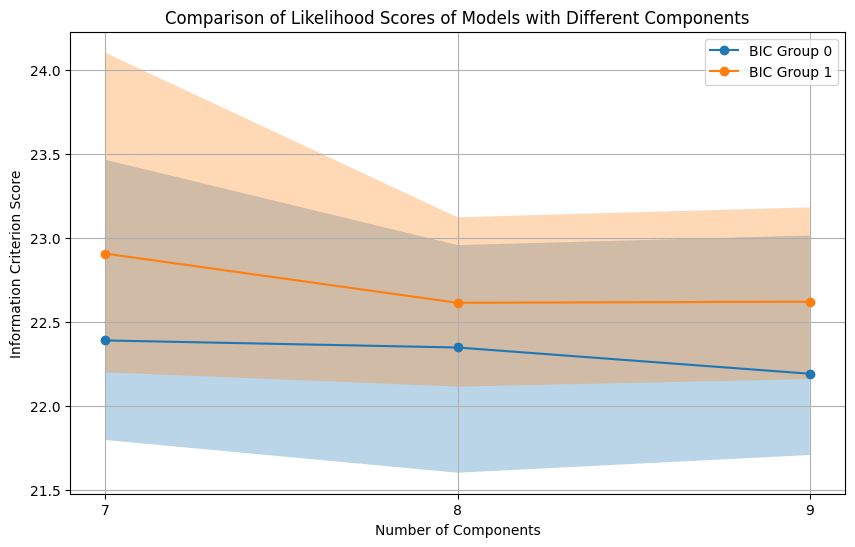

In [90]:
train_model = DyslexiaDat2.models_pipeline(13, [7,8,9], group=[0,1], starting_tests=50, only_starting=True, only_bic=True, covariance_type='tied', remove_subj=test_participants)

In [91]:
train_model

[[[GaussianHMM(covariance_type='tied', n_components=7),
   GaussianHMM(covariance_type='tied', n_components=8),
   GaussianHMM(covariance_type='tied', n_components=9)],
  None],
 [[GaussianHMM(covariance_type='tied', n_components=7),
   GaussianHMM(covariance_type='tied', n_components=8),
   GaussianHMM(covariance_type='tied', n_components=9)],
  None]]

In [15]:
from copy import deepcopy

In [ ]:
model_g0 = deepcopy(train_model[0][0][1])
model_g1 = deepcopy(train_model[1][0][1])

In [93]:
accuracy = []
conf_matrix = np.zeros((2, 2))
for idx,subj in enumerate(test_participants):
    # get the group of the subject
    g = test_labels[idx]
    s = np.where(tot_subj == subj)[0][0]

    X0, Y0, l0 = DyslexiaDat2.get_data(13, subject=int(s))
    res_0 = model_g0.bic(np.column_stack((X0, Y0)),l0)/l0
    res_1 = model_g1.bic(np.column_stack((X0, Y0)),l0)/l0
    if res_0 < res_1 and g == 0:
        accuracy.append(1)
        conf_matrix[0][0] += 1
    elif res_0 < res_1 and g == 1:
        accuracy.append(0)
        conf_matrix[0][1] += 1
    elif res_0 > res_1 and g == 0:
        accuracy.append(0)
        conf_matrix[1][0] += 1
    elif res_0 > res_1 and g == 1:
        accuracy.append(1)
        conf_matrix[1][1] += 1

print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')


Average accuracy: 0.5555555555555556
Total confusion matrix:
[[5. 4.]
 [0. 0.]]


In [185]:
from IPython.utils import io

def train_HMM(self, test_participants, group, stimuli, n_components, starting_tests, covariance_type):
    with io.capture_output() as _:
        train_model = self.models_pipeline(stimuli, n_components, group=group, starting_tests=starting_tests, only_starting=True, only_bic=True, covariance_type=covariance_type, remove_subj=test_participants)
    model_g0 = deepcopy(train_model[0][0][0])
    model_g1 = deepcopy(train_model[1][0][0])
    return model_g0, model_g1

In [186]:
def evaluation(self, model_g0, model_g1, test_participants, test_labels, conf_matrix):
    accuracy = []
    for idx,subj in enumerate(test_participants):
        # get the group of the subject
        g = test_labels[idx]
        s = np.where(self.subjects == subj)[0][0]

        X0, Y0, l0 = self.get_data(13, subject=int(s))
        res_0 = model_g0.bic(np.column_stack((X0, Y0)),l0)/l0
        res_1 = model_g1.bic(np.column_stack((X0, Y0)),l0)/l0
        if res_0 < res_1 and g == 0:
            accuracy.append(1)
            conf_matrix[0][0] += 1
        elif res_0 < res_1 and g == 1:
            accuracy.append(0)
            conf_matrix[0][1] += 1
        elif res_0 > res_1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif res_0 > res_1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
    return accuracy, conf_matrix

In [ ]:
accuracy = []
conf_matrix = np.zeros((2, 2))
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    model_g0, model_g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], 13, [8], 50, 'tied')
    acc, conf = evaluation(DyslexiaDat2, model_g0, model_g1, test_participants, test_labels, conf_matrix)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.4444444444444444
Fold 2 accuracy: 0.6666666666666666
Fold 3 accuracy: 0.7777777777777778
Fold 4 accuracy: 0.6666666666666666
Fold 5 accuracy: 0.5555555555555556
Average accuracy: 0.6222222222222221
Standard deviation: 0.11331154474650633
Total confusion matrix:
[[222. 192.]
 [ 52.  92.]]


## HMM multiple stimuli

In [605]:
def train_HMM(self, test_participants, group, stimuli, n_components, starting_tests, covariance_type):
    models_g0 = []
    models_g1 = []
    for stim in stimuli:
        with io.capture_output() as _:
            train_model = self.models_pipeline(stim, n_components, group=group, starting_tests=starting_tests, only_starting=True, only_bic=True, covariance_type=covariance_type, remove_subj=test_participants)
        models_g0.append(deepcopy(train_model[0][0][0]))
        models_g1.append(deepcopy(train_model[1][0][0]))
        
    return models_g0, models_g1

In [606]:
def evaluation(self, stimuli, models_g0, models_g1, test_participants, test_labels):
    accuracy = []
    conf_matrix = np.zeros((2, 2))
    for idx,subj in enumerate(test_participants):
        # get the group of the subject
        g = test_labels[idx]
        s = np.where(self.subjects == subj)[0][0]
        vote_g0 = 0
        vote_g1 = 0
        for s_idx,stim in enumerate(stimuli):
            X0, Y0, l0 = self.get_data(stim, subject=int(s))
            res_0 = models_g0[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0
            res_1 = models_g1[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0

            if res_0 < res_1:
                vote_g0 += 1
            else:
                vote_g1 += 1

        if vote_g0 > vote_g1 and g == 0:
            accuracy.append(1)
            conf_matrix[0][0] += 1
        elif vote_g0 > vote_g1 and g == 1:
            accuracy.append(0)
            conf_matrix[0][1] += 1
        elif vote_g0 < vote_g1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif vote_g0 < vote_g1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
        
    return accuracy, conf_matrix

In [ ]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [3, 13, 25]
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [8], 50, 'tied')
    acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.7777777777777778
Fold 2 accuracy: 0.7777777777777778
Fold 3 accuracy: 0.6666666666666666
Fold 4 accuracy: 0.8888888888888888
Fold 5 accuracy: 0.6666666666666666
Average accuracy: 0.7555555555555555
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[240.  96.]
 [ 34. 188.]]


In [198]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [3, 6, 13, 18, 25]
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [8], 20, 'tied')
    acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.7777777777777778
Fold 2 accuracy: 0.8888888888888888
Fold 3 accuracy: 0.7777777777777778
Fold 4 accuracy: 1.0
Fold 5 accuracy: 0.8888888888888888
Average accuracy: 0.8666666666666666
Standard deviation: 0.0831479419283098
Total confusion matrix:
[[24.  5.]
 [ 1. 15.]]


In [199]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [3, 6, 13, 18, 25]
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [8], 20, 'tied')
    acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.8888888888888888
Fold 2 accuracy: 0.7777777777777778
Fold 3 accuracy: 0.8888888888888888
Fold 4 accuracy: 0.6666666666666666
Fold 5 accuracy: 0.7777777777777778
Average accuracy: 0.7999999999999999
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[22.  6.]
 [ 3. 14.]]


In [200]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [3, 6, 13, 18, 25]
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [8], 50, 'tied')
    acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.7777777777777778
Fold 2 accuracy: 0.8888888888888888
Fold 3 accuracy: 0.7777777777777778
Fold 4 accuracy: 0.8888888888888888
Fold 5 accuracy: 0.7777777777777778
Average accuracy: 0.8222222222222222
Standard deviation: 0.05443310539518171
Total confusion matrix:
[[24.  7.]
 [ 1. 13.]]


---

In [607]:
def train_HMM(self, test_participants, group, stimuli, n_components, starting_tests, covariance_type):
    models = []
    for stim in stimuli:
        with io.capture_output() as _:
            train_model = self.models_pipeline(stim, n_components, group=group, starting_tests=starting_tests, only_starting=True, only_bic=True, covariance_type=covariance_type, remove_subj=test_participants)
        models.append(deepcopy(train_model[0][0][0]))

    return models

In [608]:
def evaluation(self, stimuli, models, train_participants, train_labels, test_participants, test_labels, verbose=False):
    accuracy = []
    conf_matrix = np.zeros((2, 2))
    bic_scores = [[] for _ in range(len(stimuli))]
    for idx,subj in enumerate(train_participants):
        g = train_labels[idx]
        for s_idx,stim in enumerate(stimuli):
            if g == 0:
                s = np.where(self.subjects == subj)[0][0]
                X0, Y0, l0 = self.get_data(stim, subject=int(s))
                res = models[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0
                bic_scores[s_idx].append(res)

    if verbose:
        print(bic_scores)
    worst_bic0 = np.zeros(len(stimuli))
    for s_idx,stim in enumerate(stimuli):
        worst_bic0[s_idx] = np.mean(bic_scores[s_idx]) + np.std(bic_scores[s_idx])
    if verbose:
        print(worst_bic0)

    for idx,subj in enumerate(test_participants):
        # get the group of the subject
        g = test_labels[idx]
        s = np.where(self.subjects == subj)[0][0]
        vote_g0 = 0
        vote_g1 = 0
        for s_idx,stim in enumerate(stimuli):
            X0, Y0, l0 = self.get_data(stim, subject=int(s))
            res = models[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0

            if verbose:
                print(f'subj: {subj}, group: {g}, stim: {stim}, res: {res}, worst_bic0: {worst_bic0[s_idx]}')

            if res <= worst_bic0[s_idx]:
                vote_g0 += 1
            else:
                vote_g1 += 1

        if vote_g0 > vote_g1 and g == 0:
            accuracy.append(1)
            conf_matrix[0][0] += 1
        elif vote_g0 > vote_g1 and g == 1:
            accuracy.append(0)
            conf_matrix[0][1] += 1
        elif vote_g0 < vote_g1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif vote_g0 < vote_g1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
        
    return accuracy, conf_matrix

In [188]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [3, 6, 13, 18, 25]
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    models = train_HMM(DyslexiaDat2, test_participants, [0], stimuli, [8], 20, 'tied')
    acc, conf = evaluation(DyslexiaDat2, stimuli, models, train_participants, train_labels, test_participants, test_labels, verbose=False)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.5555555555555556
Fold 2 accuracy: 0.5555555555555556
Fold 3 accuracy: 0.6666666666666666
Fold 4 accuracy: 0.5555555555555556
Fold 5 accuracy: 0.5555555555555556
Average accuracy: 0.5777777777777777
Standard deviation: 0.04444444444444442
Total confusion matrix:
[[25. 19.]
 [ 0.  1.]]


----

In [609]:
def train_HMM(self, test_participants, group, stimuli, n_components, starting_tests, covariance_type):
    models_g0 = []
    models_g1 = []
    for stim in stimuli:
        with io.capture_output() as _:
            train_model = self.models_pipeline(stim, n_components, group=group, starting_tests=starting_tests, only_starting=True, only_bic=True, covariance_type=covariance_type, remove_subj=test_participants)
        models_g0.append(deepcopy(train_model[0][0][0]))
        models_g1.append(deepcopy(train_model[1][0][0]))
        
    return models_g0, models_g1

In [610]:
def evaluation(self, stimuli, models_g0, models_g1, train_participants, train_labels, test_participants, test_labels, conf_matrix, verbose=False):
    accuracy = []

    bic_scores = [[] for _ in range(len(stimuli))]
    for idx,subj in enumerate(train_participants):
        g = train_labels[idx]
        for s_idx,stim in enumerate(stimuli):
            if g == 0:
                s = np.where(self.subjects == subj)[0][0]
                X0, Y0, l0 = self.get_data(stim, subject=int(s))
                res = models_g0[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0
                bic_scores[s_idx].append(res)

    if verbose:
        print(bic_scores)
    worst_bic0 = np.zeros(len(stimuli))
    for s_idx,stim in enumerate(stimuli):
        worst_bic0[s_idx] = np.mean(bic_scores[s_idx])
    if verbose:
        print(worst_bic0)

    for idx,subj in enumerate(test_participants):
        # get the group of the subject
        g = test_labels[idx]
        s = np.where(self.subjects == subj)[0][0]
        vote_g0 = 0
        vote_g1 = 0
        for s_idx,stim in enumerate(stimuli):
            X0, Y0, l0 = self.get_data(stim, subject=int(s))
            res_0 = models_g0[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0
            res_1 = models_g1[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0

            if res_0 <= worst_bic0[s_idx]: 
                vote_g0 += 1
            else:
                if res_0 < res_1:
                    vote_g0 += 1
                else:
                    vote_g1 += 1

        if vote_g0 > vote_g1 and g == 0:
            accuracy.append(1)
            conf_matrix[0][0] += 1
        elif vote_g0 > vote_g1 and g == 1:
            accuracy.append(0)
            conf_matrix[0][1] += 1
        elif vote_g0 < vote_g1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif vote_g0 < vote_g1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
        
    return accuracy, conf_matrix

In [ ]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [3, 6, 13, 18, 25]
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [8], 50, 'tied')
    acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, train_participants, train_labels, test_participants, test_labels, conf_matrix)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

In [ ]:
def evaluation(self, stimuli, models_g0, models_g1, train_participants, train_labels, test_participants, test_labels, verbose=False):
    accuracy = []
    conf_matrix = np.zeros((2, 2))
    bic_scores = [[] for _ in range(len(stimuli))]
    bic_scores2 = [[] for _ in range(len(stimuli))]
    for idx,subj in enumerate(train_participants):
        g = train_labels[idx]
        for s_idx,stim in enumerate(stimuli):
            s = np.where(self.subjects == subj)[0][0]
            X0, Y0, l0 = self.get_data(stim, subject=int(s))
            res = models_g0[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0
            if g == 0:
                bic_scores[s_idx].append(res)
            if g == 1:
                bic_scores2[s_idx].append(res)

    if verbose:
        print(list(bic_scores))
        print(list(bic_scores2))
    worst_bic0 = np.zeros(len(stimuli))
    worst_bic1 = np.zeros(len(stimuli))
    for s_idx,stim in enumerate(stimuli):
        worst_bic0[s_idx] = np.mean(bic_scores[s_idx]) - np.std(bic_scores[s_idx])
        worst_bic1[s_idx] = np.mean(bic_scores2[s_idx]) + np.std(bic_scores2[s_idx])
    if verbose:
        print(worst_bic0)
        print(worst_bic1)

    for idx,subj in enumerate(test_participants):
        # get the group of the subject
        g = test_labels[idx]
        s = np.where(self.subjects == subj)[0][0]
        vote_g0 = 0
        vote_g1 = 0
        for s_idx,stim in enumerate(stimuli):
            X0, Y0, l0 = self.get_data(stim, subject=int(s))
            res_0 = models_g0[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0
            res_1 = models_g1[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0

            if res_0 <= worst_bic0[s_idx]: 
                vote_g0 += 1
            elif res_1 >= worst_bic1[s_idx]:
                vote_g1 += 1
            else:
                if res_0 < res_1:
                    vote_g0 += 1
                else:
                    vote_g1 += 1

        if vote_g0 > vote_g1 and g == 0:
            accuracy.append(1)
            conf_matrix[0][0] += 1
        elif vote_g0 > vote_g1 and g == 1:
            accuracy.append(0)
            conf_matrix[0][1] += 1
        elif vote_g0 < vote_g1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif vote_g0 < vote_g1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
        
    return accuracy, conf_matrix

In [179]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [3, 6, 13, 18, 25]
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [8], 20, 'tied')
    acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, train_participants, train_labels, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.5555555555555556
Fold 2 accuracy: 0.6666666666666666
Fold 3 accuracy: 0.6666666666666666
Fold 4 accuracy: 0.6666666666666666
Fold 5 accuracy: 0.5555555555555556
Average accuracy: 0.6222222222222221
Standard deviation: 0.05443310539518171
Total confusion matrix:
[[22. 14.]
 [ 3.  6.]]


---

In [ ]:
def evaluation(self, stimuli, models_g0, models_g1, train_participants, train_labels, test_participants, test_labels, verbose=False):
    accuracy = []
    conf_matrix = np.zeros((2, 2))
    bic_scores = [[] for _ in range(len(stimuli))]
    bic_scores2 = [[] for _ in range(len(stimuli))]
    for idx,subj in enumerate(train_participants):
        g = train_labels[idx]
        for s_idx,stim in enumerate(stimuli):
            s = np.where(self.subjects == subj)[0][0]
            X0, Y0, l0 = self.get_data(stim, subject=int(s))
            res = models_g0[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0
            if g == 0:
                bic_scores[s_idx].append(res)
            if g == 1:
                bic_scores2[s_idx].append(res)

    if verbose:
        print(list(bic_scores))
        print(list(bic_scores2))
    worst_bic0 = np.zeros(len(stimuli))
    worst_bic1 = np.zeros(len(stimuli))
    for s_idx,stim in enumerate(stimuli):
        worst_bic0[s_idx] = np.mean(bic_scores[s_idx]) - np.std(bic_scores[s_idx])
        worst_bic1[s_idx] = np.mean(bic_scores2[s_idx]) + np.std(bic_scores2[s_idx])
    if verbose:
        print(worst_bic0)
        print(worst_bic1)

    for idx,subj in enumerate(test_participants):
        # get the group of the subject
        g = test_labels[idx]
        s = np.where(self.subjects == subj)[0][0]
        vote_g0 = 0
        vote_g1 = 0
        for s_idx,stim in enumerate(stimuli):
            X0, Y0, l0 = self.get_data(stim, subject=int(s))
            res_0 = models_g0[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0
            res_1 = models_g1[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0

            if res_0 <= worst_bic0[s_idx] and res_1 > worst_bic0[s_idx]:
                vote_g0 += 1
            elif res_1 >= worst_bic1[s_idx]:
                vote_g1 += 1
            else:
                if res_0 < res_1:
                    vote_g0 += 1
                else:
                    vote_g1 += 1


        if vote_g0 > vote_g1 and g == 0:
            accuracy.append(1)
            conf_matrix[0][0] += 1
        elif vote_g0 > vote_g1 and g == 1:
            accuracy.append(0)
            conf_matrix[0][1] += 1
        elif vote_g0 < vote_g1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif vote_g0 < vote_g1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
        
    return accuracy, conf_matrix

In [191]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [3, 6, 13, 18, 25]
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [8], 20, 'tied')
    acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, train_participants, train_labels, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.6666666666666666
Fold 2 accuracy: 0.5555555555555556
Fold 3 accuracy: 1.0
Fold 4 accuracy: 0.8888888888888888
Fold 5 accuracy: 0.7777777777777778
Average accuracy: 0.7777777777777778
Standard deviation: 0.15713484026367722
Total confusion matrix:
[[24.  9.]
 [ 1. 11.]]


---

## HMM stimuli selection

In this section we separate the stimuli in 5 groups:
- Only Real Words
- Only Pseudowords (1 subset from 1 to 10)
- Only Nonwords
- Only Pseudowords (2 subset from 21 to 30)
- Mixed (Psedowords and Nonwords together)

In [614]:
def train_HMM(self, test_participants, group, stimuli, n_components, starting_tests, covariance_type):
    models_g0 = []
    models_g1 = []
    for stim in stimuli:
        with io.capture_output() as _:
            train_model = self.models_pipeline(stim, n_components, group=group, starting_tests=starting_tests, only_starting=True, only_bic=True, covariance_type=covariance_type, remove_subj=test_participants)
        models_g0.append(deepcopy(train_model[0][0][0]))
        models_g1.append(deepcopy(train_model[1][0][0]))
        
    return models_g0, models_g1

In [615]:
def evaluation(self, stimuli, models_g0, models_g1, test_participants, test_labels):
    accuracy = []
    conf_matrix = np.zeros((2, 2))
    for idx,subj in enumerate(test_participants):
        # get the group of the subject
        g = test_labels[idx]
        s = np.where(self.subjects == subj)[0][0]
        vote_g0 = 0
        vote_g1 = 0
        for s_idx,stim in enumerate(stimuli):
            X0, Y0, l0 = self.get_data(stim, subject=int(s))
            res_0 = models_g0[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0
            res_1 = models_g1[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0

            if res_0 < res_1:
                vote_g0 += 1
            else:
                vote_g1 += 1

        if vote_g0 == vote_g1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif vote_g0 == vote_g1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
        elif vote_g0 > vote_g1 and g == 0:
            accuracy.append(1)
            conf_matrix[0][0] += 1
        elif vote_g0 > vote_g1 and g == 1:
            accuracy.append(0)
            conf_matrix[0][1] += 1
        elif vote_g0 < vote_g1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif vote_g0 < vote_g1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
        
    return accuracy, conf_matrix

In [191]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [8881, 8882, 8883, 8884, 8885, 8886]
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [8], 50, 'tied')
    acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.8888888888888888
Fold 2 accuracy: 0.7777777777777778
Fold 3 accuracy: 0.5555555555555556
Fold 4 accuracy: 0.8888888888888888
Fold 5 accuracy: 0.8888888888888888
Average accuracy: 0.8
Standard deviation: 0.12957670877434
Total confusion matrix:
[[20.  4.]
 [ 5. 16.]]


In [192]:
import json

def convert_to_serializable(obj):
    """
    Convert numpy arrays and other non-serializable objects to lists or basic types
    that can be saved in JSON format.
    """
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, float):
        return float(obj)  # Convert potential numpy float to standard Python float
    elif hasattr(obj, 'tolist'):
        return obj.tolist()
    return str(obj)

def save_ghmm_details(models, stimuli, description, output_file='ghmm_models_details.json'):
    """
    Save Gaussian HMM model details to a JSON file.
    
    Parameters:
    - models: List of fitted Gaussian HMM models
    - stimuli: Corresponding list of stimulus names
    - output_file: Path to the output JSON file
    """
    # Create a list to store model details
    models_details = []

    # Add description
    models_details.append({'description': description})
    models_details.append({'num_stimuli': len(stimuli)})
    
    # Iterate through models and stimuli
    for model, stim in zip(models, stimuli):
        model_info = {
            'stimulus': stim,
            'start_probabilities': convert_to_serializable(model.startprob_),
            'transition_matrix': convert_to_serializable(model.transmat_),
            'means': convert_to_serializable(model.means_),
            'covariances': convert_to_serializable(model.covars_),
            'covariance_type': model.covariance_type,
            'init_params': model.init_params,
            'num_components': model.n_components
        }
        models_details.append(model_info)
    
    # Save to JSON file
    output_file = './hmm_models/' + output_file
    # Ensure the directory exists
    with open(output_file, 'w') as f:
        json.dump(models_details, f, indent=4, default=convert_to_serializable)
    
    print(f"Model details saved to {output_file}")

In [193]:
save_ghmm_details(models_g0, [8881, 8882, 8883, 8884, 8885, 8886],  description='Models trained with practice data of Typical Reader and Isolated Spelling Deficit (5th Fold)', output_file='ghmm_models_g0_practice.json')

Model details saved to ./hmm_models/ghmm_models_g0_practice.json


In [194]:
save_ghmm_details(models_g1, [8881, 8882, 8883, 8884, 8885, 8886],  description='Models trained with practice data of Combined Reading and Spelling Deficit and Isolated Reading Deficit (5th Fold)', output_file='ghmm_models_g1_practice.json')

Model details saved to ./hmm_models/ghmm_models_g1_practice.json


## Calculating and saving the HMM

In [616]:
stimuli = list(range(1,31)) # from 1 to 30
models_g0 = []
models_g1 = []
#Around 80 minutes per fold
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    g0, g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [8], 50, 'tied') # better 100 insted of 50 starting tests, improves stability
    models_g0.append(g0)
    models_g1.append(g1)

In [659]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [1,2,3,4,5,6,7,8,9,10] # Only Pseudohomophones
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.7777777777777778
Fold 2 accuracy: 0.8888888888888888
Fold 3 accuracy: 1.0
Fold 4 accuracy: 0.7777777777777778
Fold 5 accuracy: 0.8888888888888888
Average accuracy: 0.8666666666666666
Standard deviation: 0.0831479419283098
Total confusion matrix:
[[19.  0.]
 [ 6. 20.]]


In [660]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [11,12,13,14,15,16,17,18,19,20] # Only Nonwords
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.5555555555555556
Fold 2 accuracy: 0.8888888888888888
Fold 3 accuracy: 0.7777777777777778
Fold 4 accuracy: 0.8888888888888888
Fold 5 accuracy: 0.8888888888888888
Average accuracy: 0.8
Standard deviation: 0.12957670877434
Total confusion matrix:
[[20.  4.]
 [ 5. 16.]]


In [661]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [21,22,23,24,25,26,27,28,29,30] # Only Pseudohomophones 2
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 1.0
Fold 2 accuracy: 0.7777777777777778
Fold 3 accuracy: 0.7777777777777778
Fold 4 accuracy: 0.8888888888888888
Fold 5 accuracy: 0.7777777777777778
Average accuracy: 0.8444444444444444
Standard deviation: 0.08888888888888888
Total confusion matrix:
[[19.  1.]
 [ 6. 19.]]


In [662]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30] # Mixed
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.8888888888888888
Fold 2 accuracy: 1.0
Fold 3 accuracy: 1.0
Fold 4 accuracy: 0.8888888888888888
Fold 5 accuracy: 0.8888888888888888
Average accuracy: 0.9333333333333332
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[22.  0.]
 [ 3. 20.]]


In [663]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [1,2,3,4,5,6,7,8,9,10,21,22,23,24,25,26,27,28,29,30] # Pseudohomophones + Pseudohomophones 2
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 1.0
Fold 2 accuracy: 1.0
Fold 3 accuracy: 0.8888888888888888
Fold 4 accuracy: 0.7777777777777778
Fold 5 accuracy: 1.0
Average accuracy: 0.9333333333333332
Standard deviation: 0.0888888888888889
Total confusion matrix:
[[22.  0.]
 [ 3. 20.]]


In [617]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = list(range(1,31)) # All stimuli
for i in range(5):
    train_participants, test_participants = train_test_split(
        tot_subj, 
        test_size=0.1, 
        random_state=i, 
        stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
    )
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    m_0 = [models_g0[i][subj-1] for subj in stimuli]
    m_1 = [models_g1[i][subj-1] for subj in stimuli]
    acc, conf = evaluation(DyslexiaDat2, stimuli, m_0, m_1, test_participants, test_labels)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    accuracy.append(np.mean(acc))
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.8888888888888888
Fold 2 accuracy: 1.0
Fold 3 accuracy: 1.0
Fold 4 accuracy: 0.8888888888888888
Fold 5 accuracy: 1.0
Average accuracy: 0.9555555555555555
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[23.  0.]
 [ 2. 20.]]


In [618]:
save_ghmm_details(models_g0[2], list(range(1,31)),  description='Models trained with data of Typical Reader and Isolated Spelling Deficit (2rd Fold)', output_file='ghmm_models_g0.json')

Model details saved to ./hmm_models/ghmm_models_g0.json


In [619]:
save_ghmm_details(models_g1[2], list(range(1,31)),  description='Models trained with data of Combined Reading and Spelling Deficit and Isolated Reading Deficit (2rd Fold)', output_file='ghmm_models_g1.json')

Model details saved to ./hmm_models/ghmm_models_g1.json


In [620]:
import pickle
def save_ghmm_models(models, stimuli, folds, output_file):
    """
    Save Gaussian HMM model using pickle.

    Parameters:
    - models: List of fitted Gaussian HMM models
    - output_file: Path to the output pickle file
    """
    for f in range(folds):
        for stim in stimuli:
            with open(f'./hmm_models/{output_file}/{output_file}_fold_{f+1}_stim_{stim}.pkl', 'wb') as file:
                pickle.dump(models[f][stim-1], file)
    print(f"Model details saved to {output_file}")

In [621]:
save_ghmm_models(models_g0, list(range(1,31)), 5, output_file='models_g0')
save_ghmm_models(models_g1, list(range(1,31)), 5, output_file='models_g1')

Model details saved to models_g0
Model details saved to models_g1


In [622]:
# try to load the models
path = './hmm_models/models_g0/models_g0_fold_1_stim_1.pkl' 
with open(path, 'rb') as file:
    model = pickle.load(file)
    print(model)
    print(model.startprob_)
    print(model.transmat_)
    print(model.means_)
    print(model.covars_)
    print(model.covariance_type)
    print(model.init_params)
    print(model.n_components)

GaussianHMM(covariance_type='tied', n_components=8)
[6.81946172e-06 1.14902158e-93 8.41752771e-98 5.91118305e-49
 2.04081633e-02 1.43912924e-01 8.16992020e-01 1.86800737e-02]
[[8.23464743e-001 1.49364097e-058 2.44891169e-029 1.70231459e-001
  3.47393404e-003 2.70132467e-003 1.28539191e-004 2.00420961e-027]
 [6.07619474e-003 7.20037517e-001 4.70199326e-004 2.39233514e-015
  2.67340367e-001 6.07568337e-003 3.84149125e-008 1.02292215e-010]
 [2.09291786e-012 1.54258445e-001 8.45741554e-001 1.02773985e-011
  1.26489865e-012 5.77714219e-010 2.28437465e-019 1.32016774e-020]
 [5.71541420e-008 7.74659921e-038 1.39101909e-001 8.60898034e-001
  2.69931425e-029 5.15465737e-040 2.82036829e-013 3.72970332e-047]
 [1.10371472e-001 2.15927584e-002 2.57977441e-002 2.48172764e-002
  4.31650580e-001 1.18061311e-001 1.01968935e-001 1.65739923e-001]
 [3.53945362e-013 1.71409148e-090 4.06349960e-046 1.42271856e-026
  2.63148328e-090 6.34304569e-026 1.00000000e+000 9.89513996e-040]
 [1.57161036e-001 7.9521429

---

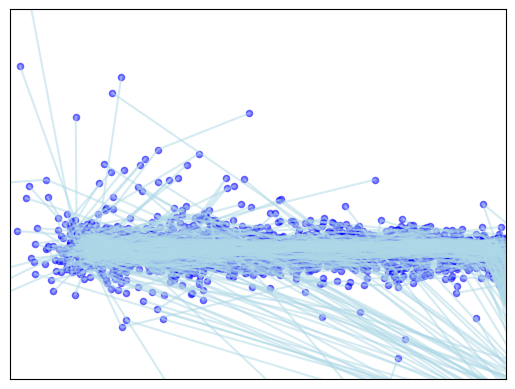

In [ ]:
# Screen resolution of Munich
#DyslexiaDat2.VisScanPath(1,visFix=True,scan_path_col='lightblue', allS=True)

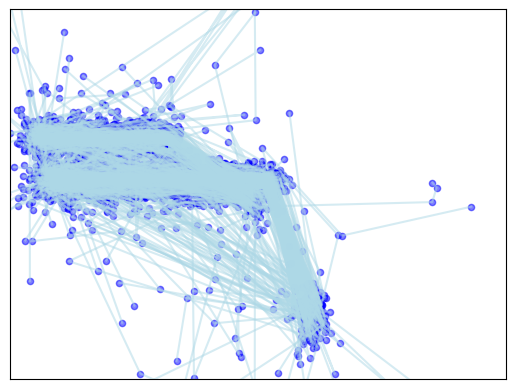

In [259]:
DyslexiaDat.VisScanPath(1,visFix=True,scan_path_col='lightblue', allS=True)

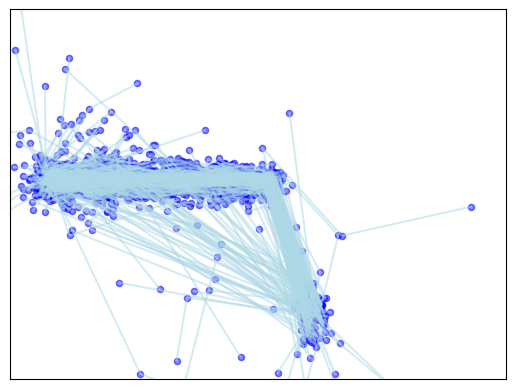

In [578]:
DyslexiaDat2.VisScanPath(1,visFix=True,scan_path_col='lightblue', allS=True)

In [628]:
from PyEyeSim.visualhelper import draw_ellipse

def VisHMM(self,dat,hmmfitted,ax=0,showim=0,stim=1,lengths=0,incol=False):
    '''
     visualize fixations and fitted hidden markov model
    hmmfitted: fitted hidden markov model
    ax: if not provided, new figure opens 

    
     Positional arguments
     ----------
    dat : sequence of fixations
    hmmfitted : fitted hmmlearn hidden markov model object

    
     Optional arguments
     ----------
    ax:  provide axis handle for the plot, if not new figure is opened The default is 0.
    showim : show stimulus if True The default is 1.
    stim : stimulus name
    lengths : length of time series sequences (needed for multiple sequences)
    incol : If True, use sequence of colorsm differing for each component. The default is False.

    Returns
    -------
    None.

    '''
    
    colors=['k','gray','salmon','olive','m','c','g','y','navy','orange','darkred','r','darkgreen','k','gray','salmon','olive','y','m','g','c']
    if type(ax)==int:
       fig,ax= plt.subplots()
    if showim:
        ax.imshow(self.images[stim])
        alph=.8
    else:
        alph=.8
    if np.shape(dat)[0]>200:
        alph=.6

    preds=hmmfitted.predict(dat,lengths)

    ax.scatter(hmmfitted.means_[:,0],hmmfitted.means_[:,1],color='darkred',s=50)
    
    for c1 in range(hmmfitted.n_components):
        if incol:
            color1=colors[c1]  # color for scatter 
            color2=colors[c1] # color for patch

        else:
            color1='k'
            color2='olive'

        ax.scatter(dat[preds==c1,0],dat[preds==c1,1],color=color1,alpha=alph)
        #print(np.shape(hmmfitted.covars_[c1]))
       # draw_ellipse((hmmfitted.means_[c1,0],hmmfitted.means_[c1,1]),hmmfitted.covars_[c1],ax=ax,facecolor='none',edgecolor=color2,linewidth=2)
        draw_ellipse(hmmfitted.means_[c1,0],hmmfitted.means_[c1,1],hmmfitted.covars_[c1],ax=ax,facecolor='none',edgecolor=color2,linewidth=2)

        for c2 in range(hmmfitted.n_components):
            if c1!=c2:
                ax.plot([hmmfitted.means_[c1,0],hmmfitted.means_[c2,0]],[hmmfitted.means_[c1,1],hmmfitted.means_[c2,1]],linewidth=hmmfitted.transmat_[c1,c2]*5,color='r')
    ax.set_ylim([self.y_size,0])
    ax.set_xlim([0,self.x_size])
    ax.set_yticks([])
    ax.set_xticks([])

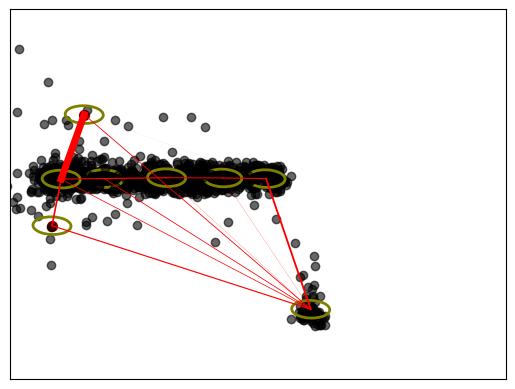

In [658]:
stim = 1
file = f'./hmm_models/models_g0/models_g0_fold_1_stim_{stim}.pkl'
with open(file, 'rb') as f:
    model = pickle.load(f)
xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(stim,group=0,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,model,ax=0,showim=0,stim=stim,lengths=lengths)

---

In [ ]:
# Ensure balanced classes in train and test sets
train_participants, test_participants = train_test_split(
    tot_subj, 
    test_size=0.1, 
    random_state=42, 
    stratify=[WhichCN[np.where(tot_subj == sub)[0][0]] for sub in tot_subj]
)

# Generate labels for train and test setsa
train_labels = np.array([WhichCN[np.where(tot_subj == sub)[0][0]] for sub in train_participants])
test_labels = np.array([WhichCN[np.where(tot_subj == sub)[0][0]] for sub in test_participants])

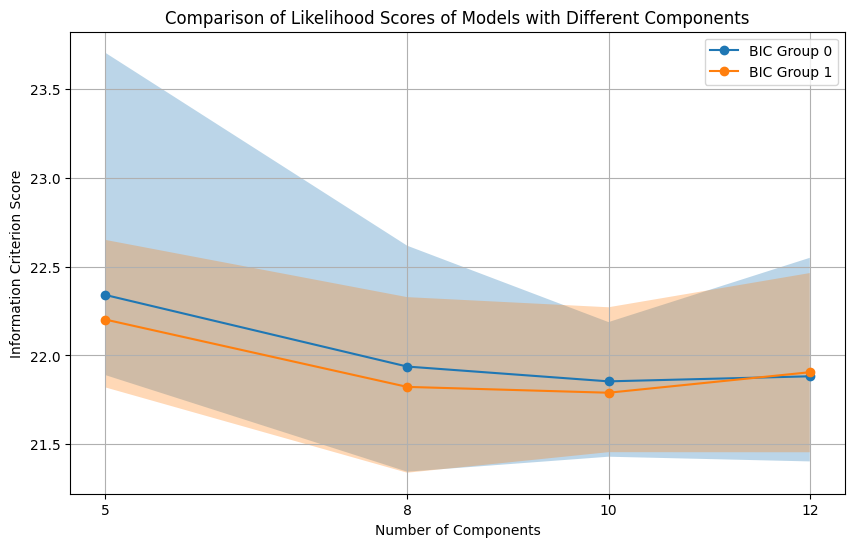

In [685]:
train_model = DyslexiaDat2.models_pipeline(1, [5,8,10,12], group=[0,1], starting_tests=20, only_starting=True, only_bic=True, covariance_type='full', remove_subj=test_participants)

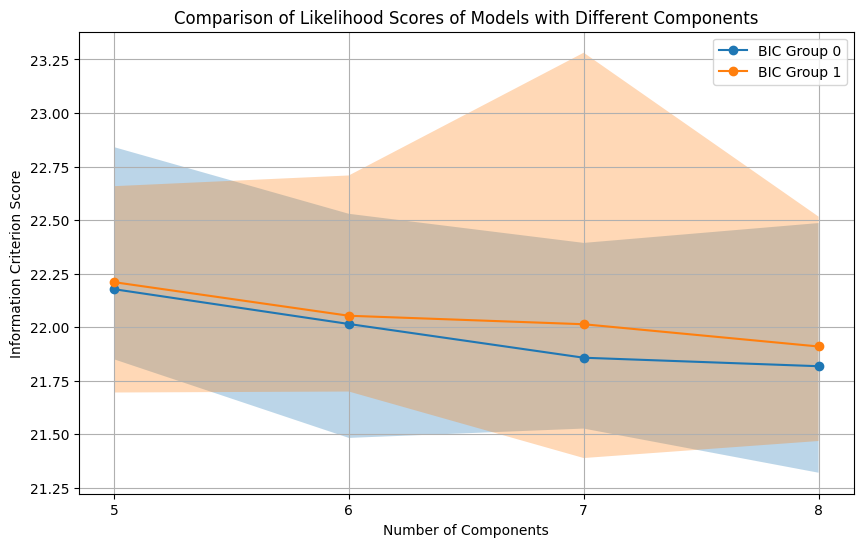

In [690]:
train_model = DyslexiaDat2.models_pipeline(1, [5,6,7,8], group=[0,1], starting_tests=20, only_starting=True, only_bic=True, covariance_type='full', remove_subj=test_participants)

In [692]:
model0 = deepcopy(train_model[0][0][3])
model1 = deepcopy(train_model[1][0][3])

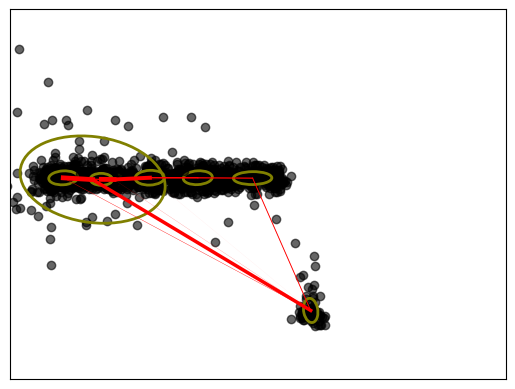

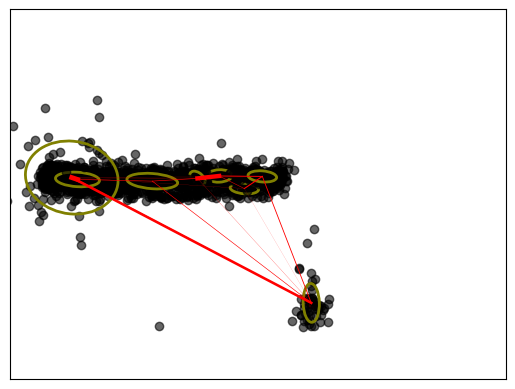

In [700]:
xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(1,group=0,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,model0,ax=0,showim=0,stim=1,lengths=lengths)

xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(1,group=1,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,model1,ax=0,showim=0,stim=1,lengths=lengths)

---

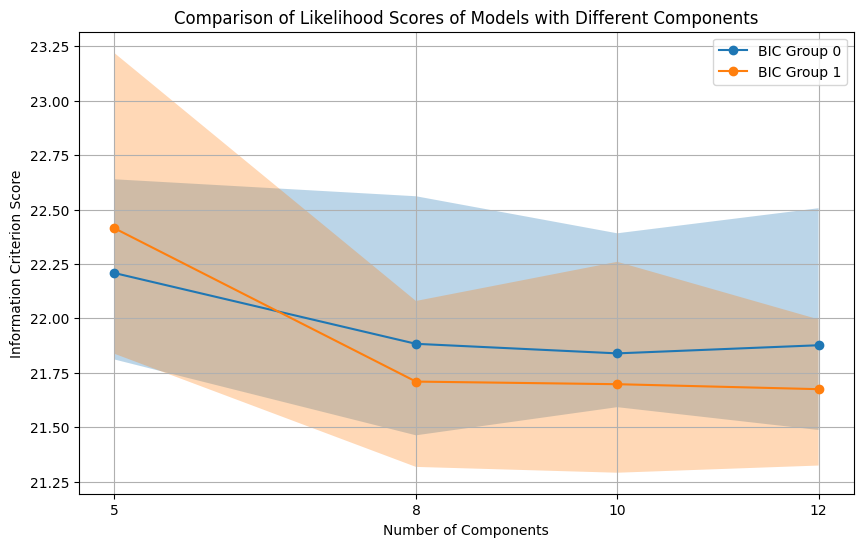

In [698]:
train_model = DyslexiaDat2.models_pipeline(1, [5,8,10,12], group=[0,1], starting_tests=20, only_starting=True, only_bic=True, covariance_type='diag', remove_subj=test_participants)

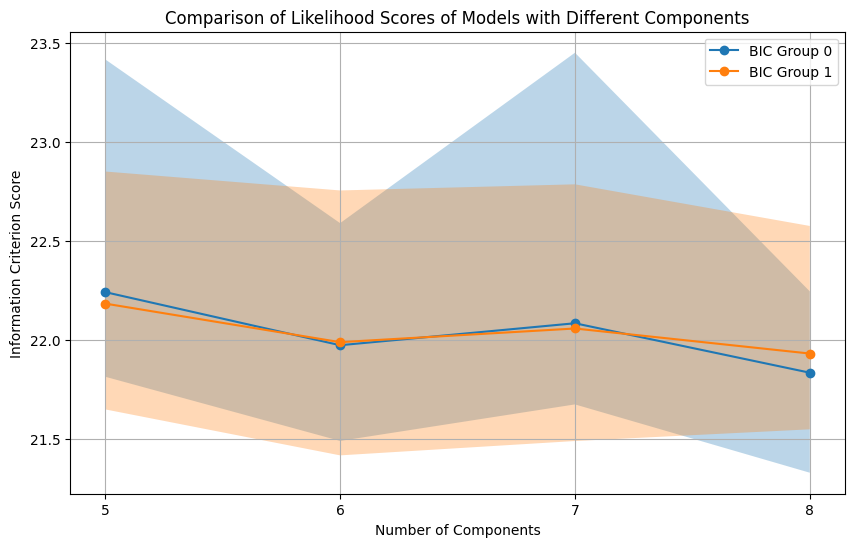

In [699]:
train_model = DyslexiaDat2.models_pipeline(1, [5,6,7,8], group=[0,1], starting_tests=20, only_starting=True, only_bic=True, covariance_type='diag', remove_subj=test_participants)

In [701]:
model0 = deepcopy(train_model[0][0][3])
model1 = deepcopy(train_model[1][0][3])

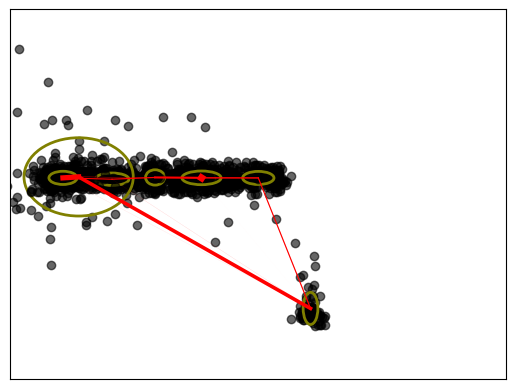

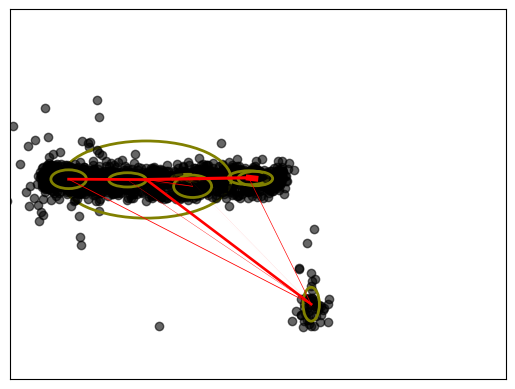

In [702]:
xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(1,group=0,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,model0,ax=0,showim=0,stim=1,lengths=lengths)

xx,yy,lengths,_=DyslexiaDat2.DataArrayHmm(1,group=1,tolerance=20,verb=False)
Dat=np.column_stack((xx,yy))
VisHMM(DyslexiaDat2,Dat,model1,ax=0,showim=0,stim=1,lengths=lengths)